In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pyhmc as phmc
import scipy.linalg as la

from scipy.optimize import curve_fit

from iminuit import Minuit

Nt=16
w, h = 3, Nt
n_smear = 5
n_op = 4
n_meas =30000

def E_mass(L,mass):
    return np.arccosh(np.cosh(mass) + 1 -np.cos( 2*np.pi/L) )

def corr_th(x, a,b,c,d):
    E= np.arccosh(2 - np.cos(2*np.pi/Nt))
    return a * np.cosh((x-Nt/2)*b) + c*np.cosh((x-Nt/2)*d)

def variational_analysis(kappa,eigen, eigen_err):
    avg = [0 for i in range(n_smear*n_op)]
    err = [0 for i in range(n_smear*n_op)]
    c_mat = [[0 for i in range(n_smear*n_op) ]for j in range(n_smear*n_op) ]
    c_mat0 = [[0 for i in range(n_smear*n_op) ]for j in range(n_smear*n_op) ]
    c_plus = [[0 for i in range(n_smear*n_op) ]for j in range(n_smear*n_op) ]
    c_minus = [[0 for i in range(n_smear*n_op) ]for j in range(n_smear*n_op) ]
    avg_np= np.loadtxt('cross/matrix_new_np_L%d_k%f.txt' %(Nt,kappa))
    avg_np=avg_np.reshape(Nt,n_smear*n_op,n_smear*n_op)
    err_np= np.loadtxt('cross/matrix_new_np_L%d_k%f_err.txt' %(Nt,kappa))
    err_np=err_np.reshape(Nt,n_smear*n_op,n_smear*n_op)
    
    for t in range(Nt):
        eigen.append([])
        eigen_err.append([])
        for i in range(n_smear*n_op):
            for j in range(n_smear*n_op):
                if t == 0:
                    c_mat0[i][j] = avg_np[t][i][j]
                c_mat[i][j] = avg_np[t][i][j]
                c_plus[i][j] = avg_np[t][i][j] + err_np[t][i][j]
                c_minus[i][j] = avg_np[t][i][j] - err_np[t][i][j]
        
        v,w = la.eig(c_mat,b=c_mat0)
        p,l = la.eig(c_plus,b=c_mat0)
        m,r = la.eig(c_minus,b=c_mat0)
        if t>0:
            v[::-1].sort()
            p[::-1].sort()
            m[::-1].sort()
        for i in range(n_op*n_smear):
            if p[i].real > v[i].real and p[i].real > m[i].real:
                if v[i].real > m[i].real:
                    avg[i] = v[i].real
                    err[i] = (p[i].real - m[i].real)/2
                if m[i].real > v[i].real:
                    avg[i] = m[i].real
                    err[i] = (p[i].real -v[i].real)/2
            if v[i].real > p[i].real and v[i].real > m[i].real:
                if p[i].real > m[i].real:
                    avg[i] = p[i].real
                    err[i] = (v[i].real - m[i].real)/2
                if m[i].real > p[i].real:
                    avg[i] = m[i].real
                    err[i] = (v[i].real -p[i].real)/2
            if m[i].real > v[i].real and m[i].real > p[i].real:
                if v[i].real > p[i].real:
                    avg[i] = v[i].real
                    err[i] = (m[i].real - p[i].real)/2
                if p[i].real > v[i].real:
                    avg[i] = p[i].real
                    err[i] = (m[i].real - v[i].real)/2
            eigen[t].append(avg[i])
            eigen_err[t].append(err[i])


def variational_analysis4(kappa,eigen, eigen_err,n_s):
    avg = [0 for i in range(4)]
    err = [0 for i in range(4)]
    index =[n_s,n_s+n_smear,n_s+n_smear*2,n_s+n_smear*3]
    c_mat = [[0 for i in range(4) ]for j in range(4) ]
    c_mat0 = [[0 for i in range(4) ]for j in range(4) ]
    c_plus = [[0 for i in range(4) ]for j in range(4) ]
    c_minus = [[0 for i in range(4) ]for j in range(4) ]
    avg_np= np.loadtxt('cross/matrix_new_np_L%d_k%f.txt' %(Nt,kappa))
    avg_np=avg_np.reshape(Nt,n_smear*n_op,n_smear*n_op)
    err_np= np.loadtxt('cross/matrix_new_np_L%d_k%f_err.txt' %(Nt,kappa))
    err_np=err_np.reshape(Nt,n_smear*n_op,n_smear*n_op)
    
    for t in range(Nt):
        eigen.append([])
        eigen_err.append([])
        for i in range(4):
            for j in range(4):
                if t == 0:
                    c_mat0[i][j] = avg_np[t][index[i]][index[j]]
                c_mat[i][j] = avg_np[t][index[i]][index[j]]
                c_plus[i][j] = avg_np[t][index[i]][index[j]] + err_np[t][index[i]][index[j]]
                c_minus[i][j] = avg_np[t][index[i]][index[j]] - err_np[t][index[i]][index[j]]
                
        v,w = la.eig(c_mat,b=c_mat0)
        p,l = la.eig(c_plus,b=c_mat0)
        m,r = la.eig(c_minus,b=c_mat0)
        if t>0:
            v[::-1].sort()
            p[::-1].sort()
            m[::-1].sort()
        for i in range(4):
            if p[i].real > v[i].real and p[i].real > m[i].real:
                if v[i].real > m[i].real:
                    avg[i] = v[i].real
                    err[i] = (p[i].real - m[i].real)/2
                if m[i].real > v[i].real:
                    avg[i] = m[i].real
                    err[i] = (p[i].real -v[i].real)/2
            if v[i].real > p[i].real and v[i].real > m[i].real:
                if p[i].real > m[i].real:
                    avg[i] = p[i].real
                    err[i] = (v[i].real - m[i].real)/2
                if m[i].real > p[i].real:
                    avg[i] = m[i].real
                    err[i] = (v[i].real -p[i].real)/2
            if m[i].real > v[i].real and m[i].real > p[i].real:
                if v[i].real > p[i].real:
                    avg[i] = v[i].real
                    err[i] = (m[i].real - p[i].real)/2
                if p[i].real > v[i].real:
                    avg[i] = p[i].real
                    err[i] = (m[i].real - v[i].real)/2
            eigen[t].append(avg[i])
            eigen_err[t].append(err[i])
            
def variational_analysis3(kappa,eigen, eigen_err,c_res,n_s,n2):
    avg = [0 for i in range(4)]
    err = [0 for i in range(4)]
    index =[n_s,n_s+5,n_s+10,n_s+15]
    c_mat0 = [[0 for i in range(4) ]for j in range(4) ]
    #eigen_err = [0 for t in range(Nt)]
    #c_plus0 = [[0 for i in range(n_smear*n_op) ]for j in range(n_smear*n_op) ]
    #c_minus0 = [[0 for i in range(n_smear*n_op) ]for j in range(n_smear*n_op) ]
    avg_np= np.loadtxt('cross/matrix_run50_np_L%d_k%f.txt' %(Nt,kappa))
    avg_np=avg_np.reshape(Nt,n_smear*n_op,n_smear*n_op)
    #print(avg)
    err_np= np.loadtxt('cross/matrix_run50_np_L%d_k%f_err.txt' %(Nt,kappa))
    err_np=err_np.reshape(Nt,n_smear*n_op,n_smear*n_op)
    
    for t in range(Nt):
        c_mat = [[0 for i in range(4) ]for j in range(4) ]
        c_plus = [[0 for i in range(4) ]for j in range(4) ]
        c_minus = [[0 for i in range(4) ]for j in range(4) ]
        eigen.append([])
        eigen_err.append([])
        for i in range(4):
            for j in range(4):
                if t == 0:
                    #c_mat0[i][j] = c_mat[0][i][j][t]
                    c_mat0[i][j] = avg_np[t][index[i]][index[j]]
                    #c_plus0[i][j] = c_res[0][i][j][t] + c_res[1][i][j][t]
                    #c_minus0[i][j] = c_res[0][i][j][t] - c_res[1][i][j][t]
                c_mat[i][j] = avg_np[t][index[i]][index[j]]
                #c_mat_err[i][j] = c_res[1][i][j][t]
                c_plus[i][j] = avg_np[t][index[i]][index[j]] + err_np[t][index[i]][index[j]]
                c_minus[i][j] = avg_np[t][index[i]][index[j]] - err_np[t][index[i]][index[j]]
    
        #print('t= '+str(t)+str(check_symmetric(c_mat)))
        #print(c_mat)
        [j.pop(n2) for j in c_mat]
        c_mat.pop(n2)
        if t == 0:
            [j.pop(n2) for j in c_mat0]
            c_mat0.pop(n2)
        [j.pop(n2) for j in c_plus]
        c_plus.pop(n2)
        [j.pop(n2) for j in c_minus]
        c_minus.pop(n2)
        v,w = la.eig(c_mat,b=c_mat0)
        p,l = la.eig(c_plus,b=c_mat0)
        m,r = la.eig(c_minus,b=c_mat0)
        if t >0:
            v[::-1].sort()
            p[::-1].sort()
            m[::-1].sort()
        print('v = ',v)
        print('p = ',p)
        print('m = ',m)
        for i in range(3):
            if p[i].real > v[i].real and p[i].real > m[i].real:
                if v[i].real > m[i].real:
                    avg[i] = v[i].real
                    err[i] = (p[i].real - m[i].real)/2
                if m[i].real > v[i].real:
                    avg[i] = m[i].real
                    err[i] = (p[i].real -v[i].real)/2
            if v[i].real > p[i].real and v[i].real > m[i].real:
                if p[i].real > m[i].real:
                    avg[i] = p[i].real
                    err[i] = (v[i].real - m[i].real)/2
                if m[i].real > p[i].real:
                    avg[i] = m[i].real
                    err[i] = (v[i].real -p[i].real)/2
            if m[i].real > v[i].real and m[i].real > p[i].real:
                if v[i].real > p[i].real:
                    avg[i] = v[i].real
                    err[i] = (m[i].real - p[i].real)/2
                if p[i].real > v[i].real:
                    avg[i] = p[i].real
                    err[i] = (m[i].real - v[i].real)/2
            eigen[t].append(avg[i])
            eigen_err[t].append(err[i])
        print('Eigenvalue problem solved without the operator',n2)
        print(t,'Eigenvalues: ',eigen[t], 'Errors: ',eigen_err[t])
    #print(eigen)

def plot_energy_var(kappa,Eigen,Eigen_err,n_eigen,n_s,n1,n2):
    Tm = list(range(Nt-1))
    T= list(range(Nt))
    C = list(range(Nt))
    C_err = list(range(Nt))

    E_p= list(range(Nt-1))
    E_p2= list(range(Nt-1))
    E_m=list(range(Nt-1))
    E_c = 2*np.pi/Nt
    E_l= np.arccosh(2-np.cos(E_c))
    E_l2= np.arccosh(2-np.cos(2*E_c))
    x = np.arange(Nt-1)
    xdata = np.linspace(0,Nt-1,50)

    for t in range(Nt-1):
        E_p[t]=np.log(np.cosh(E_l*(t-Nt/2))/np.cosh(E_l*(t+1-Nt/2)))
        E_p2[t]=np.log(np.cosh(E_l2*(t-Nt/2))/np.cosh(E_l2*(t+1-Nt/2)))
        if kappa == 0.55:
            E_m[t] =np.log(np.cosh(E_mass(Nt,0.5)*(t-Nt/2))/np.cosh(E_mass(Nt,0.5)*(t+1-Nt/2)))
        if kappa == 0.65:
            E_m[t] =np.log(np.cosh(E_mass(Nt,1)*(t-Nt/2))/np.cosh(E_mass(Nt,1)*(t+1-Nt/2)))
        
        
    for ns in range(n_eigen):
        E = list(range(Nt-1))
        E_unc = list(range(Nt-1))
        for t in range(Nt):
            C[t] = float(Eigen[t][ns])
            C_err[t] = float(Eigen_err[t][ns])
        for t in range(Nt-1):
            Tm[t] = t +0.5
            E[t] = np.log(C[t]/C[t+1])
            E_unc[t] = np.sqrt( (C_err[t]/C[t])**2 + (C_err[t+1]/C[t+1])**2 )
            #if E_unc[t] > np.abs(E[t]):
            #    E[t] = np.log(-1)
                
        #C_fit=np.array(C)
        #print('E(before)=',E)
        
        #C_fit_err=np.array(C_err)
        #print(E_unc)
        t=np.linspace(0,Nt-2,Nt-1)
        #print('t(before)=',t)
        for i in range(Nt-2,-1,-1):
            if E_unc[i] > np.abs(E[i]):
                E=np.delete(E,i)
                E_unc=np.delete(E_unc,i)
                t=np.delete(t,i)
        E=np.delete(E,0)
        E_unc=np.delete(E_unc,0)
        t=np.delete(t,0)
        t=t+0.5
        #print('t(after)=',t)
        #print('E(after)=',E)

        def least_squares(a, b,c,d):
            return sum((E - np.log(corr_th(t, a, b,c,d)/corr_th(t+1, a, b,c,d) )) ** 2 / (E_unc*E_unc))

        #C_fit.pop(0)
        #C_fit_err.pop(0)
        #with open('O1minus/Energy/var%d/effective_energy_L%d_k%f_sm%d_n1_%d_n2_%d_lv%d.dat'% (n_eigen,Nt,kappa,n_s,n1,n2,ns),'w') as f:
        #    for t in list(range(Nt-1)):
        #        f.write(str(Tm[t])+" ")
        #        f.write(str(E[t])+" ")
        #        f.write(str(float(E_unc[t]))+"\n")
        
        
        plt.figure(num=None, figsize=(8, 6), dpi=160, facecolor='w', edgecolor='k')
        try:
            #popt, pcov = curve_fit(corr_th, T, C,sigma = C_err, absolute_sigma = True,bounds =([0.0001,0,0,0],[4.0,2,1,6]))
            #plt.plot(xdata +0.5, np.log(corr_th(xdata, *popt)/corr_th(xdata +1, *popt)),label=r'fit, $E_1 = %f\pm %f, E_2= %f \pm %f$' %(popt[1],np.sqrt(pcov[1][1]),popt[3],np.sqrt(pcov[3][3])))
            
            m = Minuit(least_squares,a=1,b=0.5,c=0.1,d=1,error_a=0.1,error_b=0.05,error_c=0.01,error_d=0.1,limit_a=(0,10),limit_b=(0,2),limit_c=(0,10),limit_d=(0,5),errordef=1)
            m.migrad()
            plt.plot(xdata +0.5, np.log(corr_th(xdata, *m.args)/corr_th(xdata +1, *m.args)),label=r'fit, $E=%f \pm %f,E_{ex}= %f \pm %f$'%(m.args[1],m.errors[1],m.args[3],m.errors[3]))

        except RuntimeError:
            print("Error - curve_fit failed")

        plt.errorbar(t, E,E_unc,fmt='o',label='data')
        plt.plot(x+0.5,E_p,label='$E_{th}$')
        plt.plot(x+0.5,E_p2,label='$E2_{th}$')
        if kappa == 0.55 or kappa == 0.65:
            plt.plot(x+0.5,E_m,label='$E_{m}$')
        plt.xlabel("t/a")
        plt.ylabel("a E(t)")
        #plt.yscale("log")
        plt.legend()
        plt.xlim([0.5,Nt/2+1])
        #plt.ylim([-0.5,1.0])
        #print(n_eigen)
        if n_eigen == 20:
            plt.title(r"Effective energy eigenvalue %d, L=%d ($\beta=4, \kappa=%f, \lambda=1 $)" % (ns,Nt,kappa))
            plt.savefig('O1minus/Energy/var%d/effective_energy_L%d_k%f_lv%d.jpg'% (n_eigen,Nt,kappa,ns))
        if n_eigen == 4:
            plt.title(r"Effective energy eigenvalue %d smear %d, L=%d ($\beta=4, \kappa=%f, \lambda=1 $)" % (ns,n_s,Nt,kappa))
            plt.savefig('O1minus/Energy/var%d/effective_energy_L%d_k%f_sm%d_lv%d.jpg'% (n_eigen,Nt,kappa,n_s,ns))        
        if n_eigen == 3:
            plt.title(r"Effective energy eigenvalue %d smear %d without %d, L=%d ($\beta=4, \kappa=%f, \lambda=1 $)" % (ns,n_s,n1,Nt,kappa))
            plt.savefig('O1minus/Energy/var%d/effective_energy_L%d_k%f_sm%d_n1_%d_lv%d.jpg'% (n_eigen,Nt,kappa,n_s,n1,ns))
        if n_eigen == 2:
            plt.title(r"Effective energy eigenvalue %d smear %d without %d,%d, L=%d ($\beta=4, \kappa=%f, \lambda=1 $)" % (ns,n_s,n1,n2,Nt,kappa))
            plt.savefig('O1minus/Energy/var%d/effective_energy_L%d_k%f_sm%d_n1_%d_n2_%d_lv%d.jpg'% (n_eigen,Nt,kappa,n_s,n1,n2,ns))

def var_analysis_plot(kappa):
    Eigen =[]
    Eigen_err=[]
    variational_analysis(kappa,Eigen,Eigen_err)
    plot_energy_var(kappa,Eigen,Eigen_err,n_smear*n_op,0,0,0)

def var_analysis_plot4(kappa,n_s):
    Eigen =[]
    Eigen_err=[]
    variational_analysis4(kappa,Eigen,Eigen_err,n_s)
    plot_energy_var(kappa,Eigen,Eigen_err,4,n_s,0,0)

/hosts/nashome/vaf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:167: RuntimeWarning: invalid value encountered in log
/hosts/nashome/vaf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


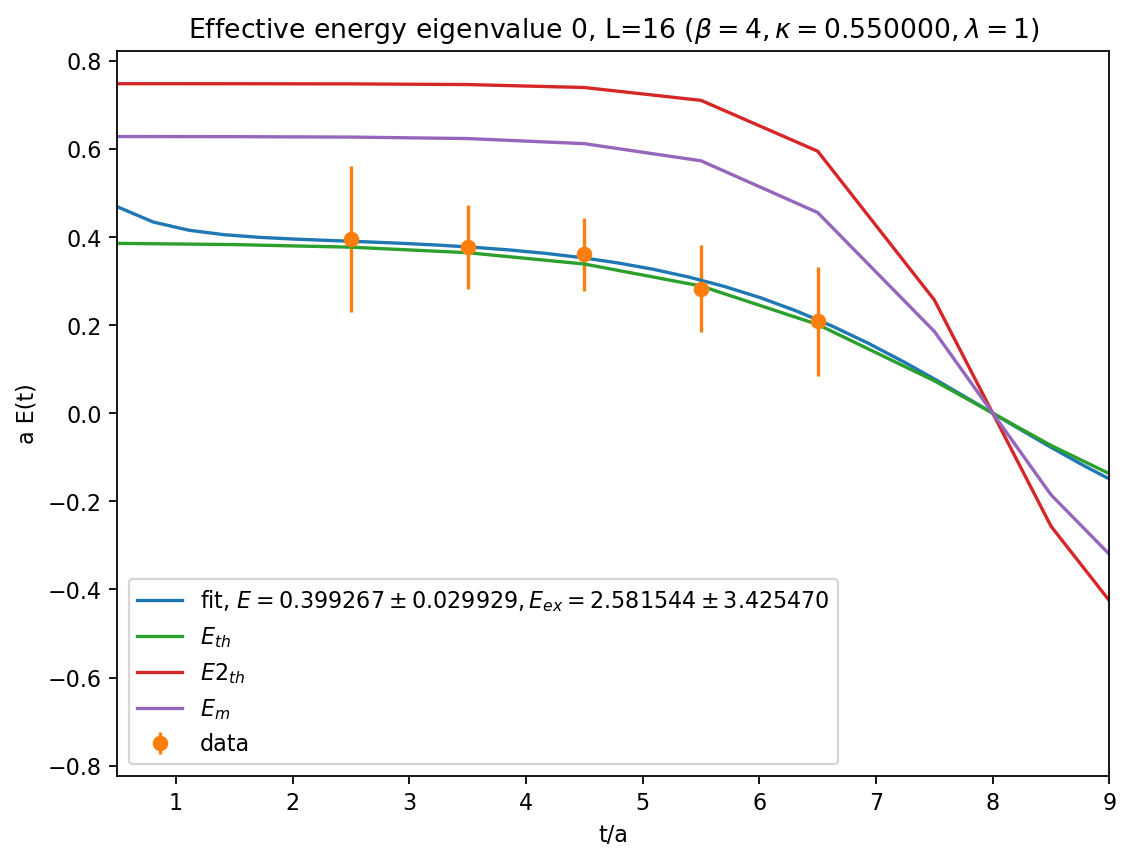

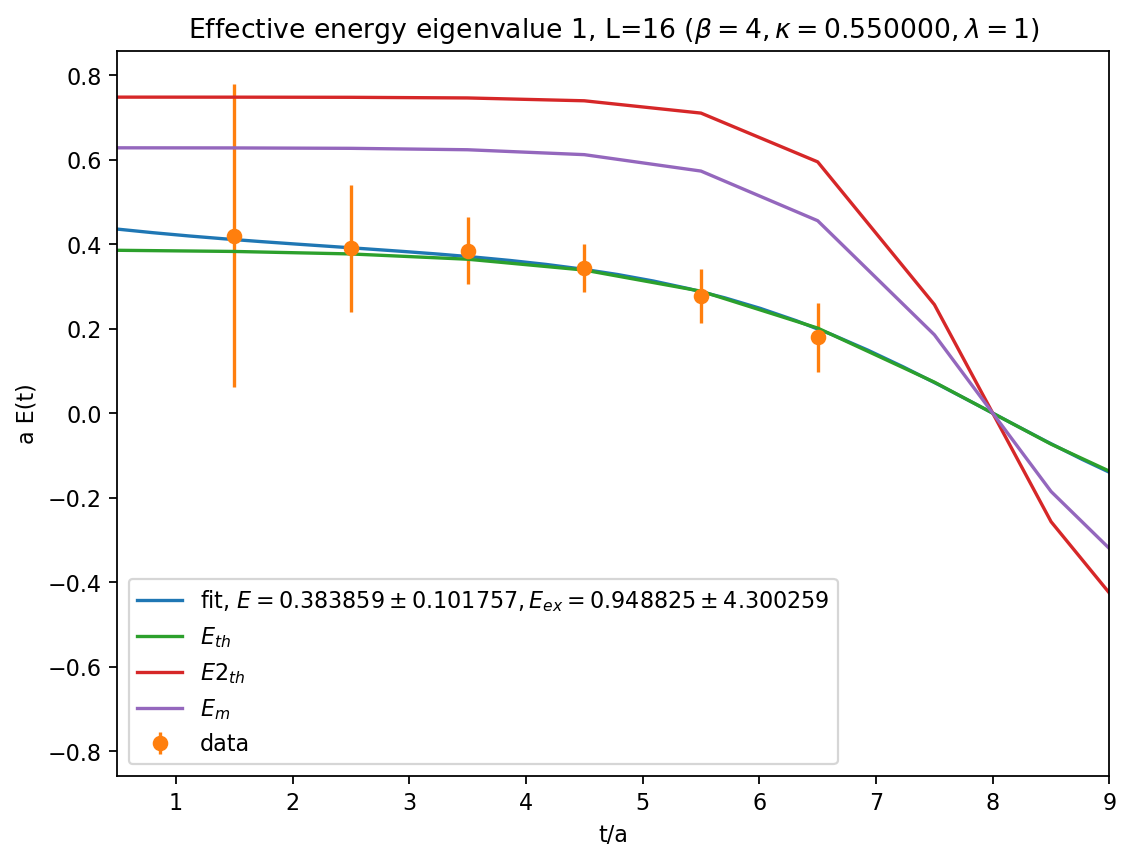

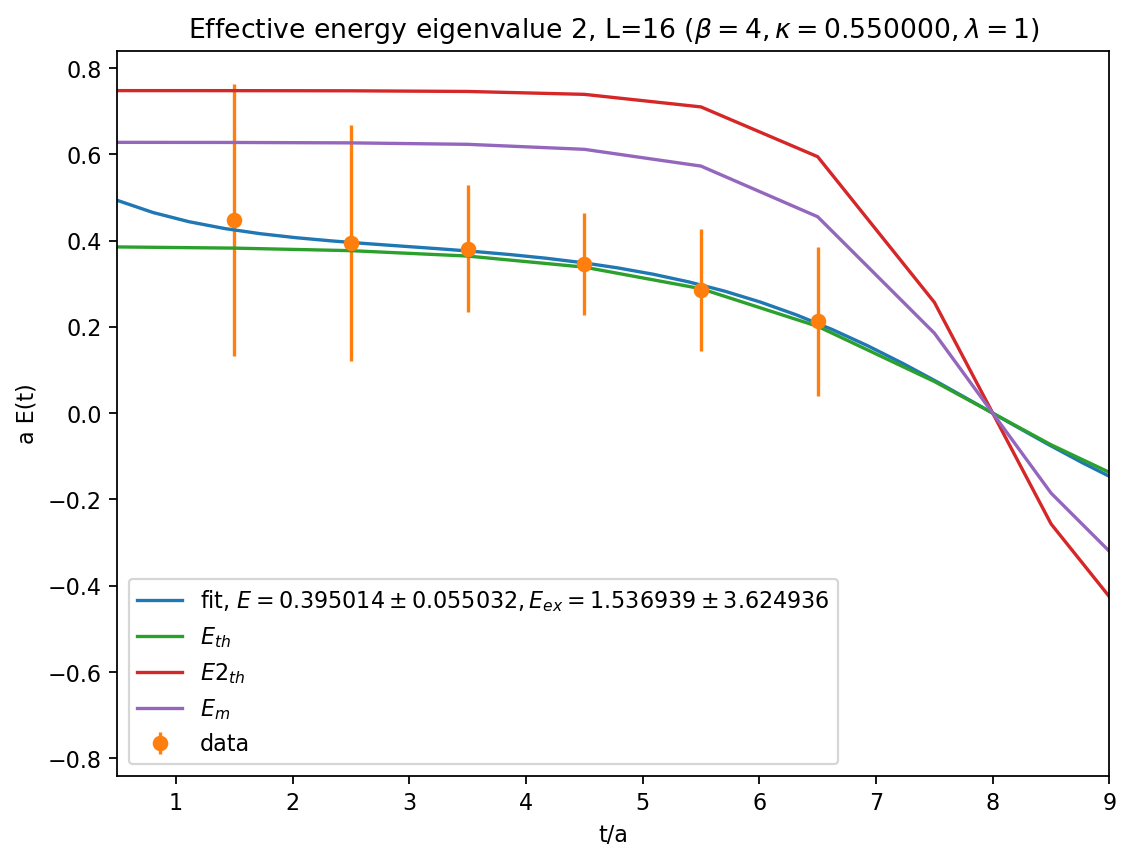

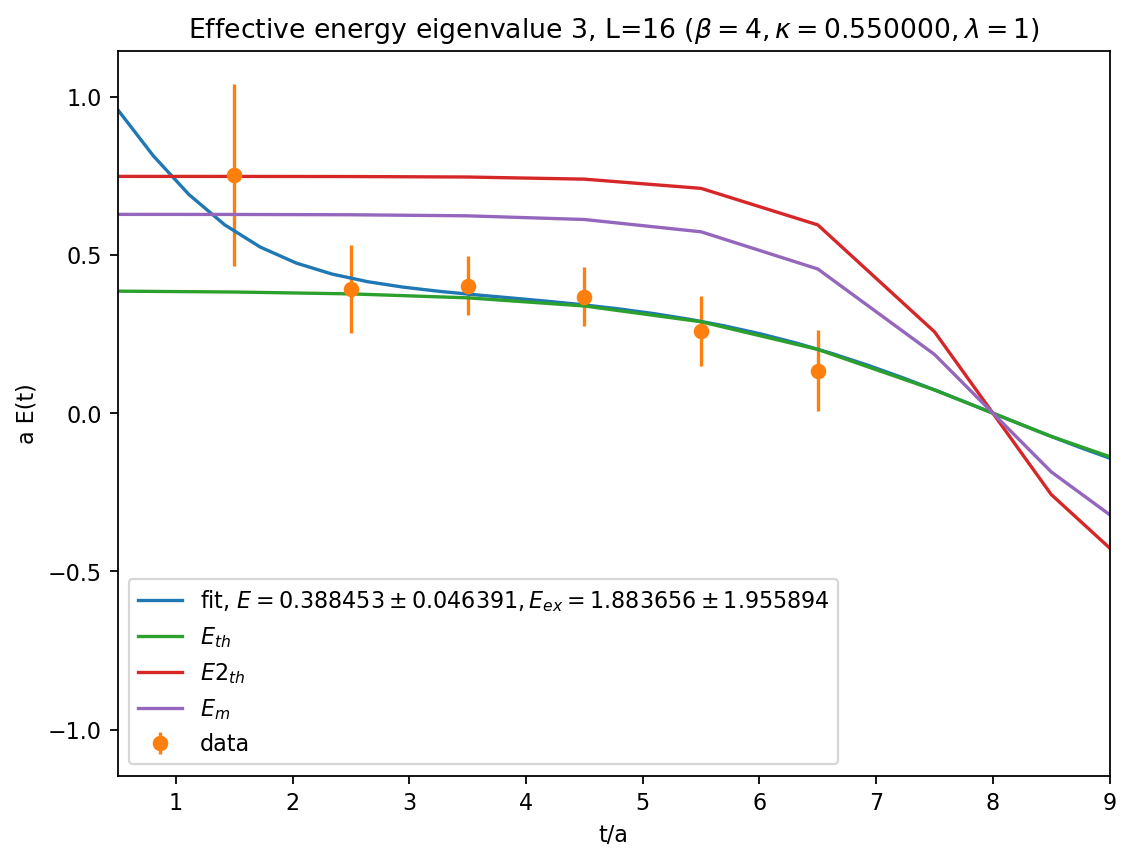

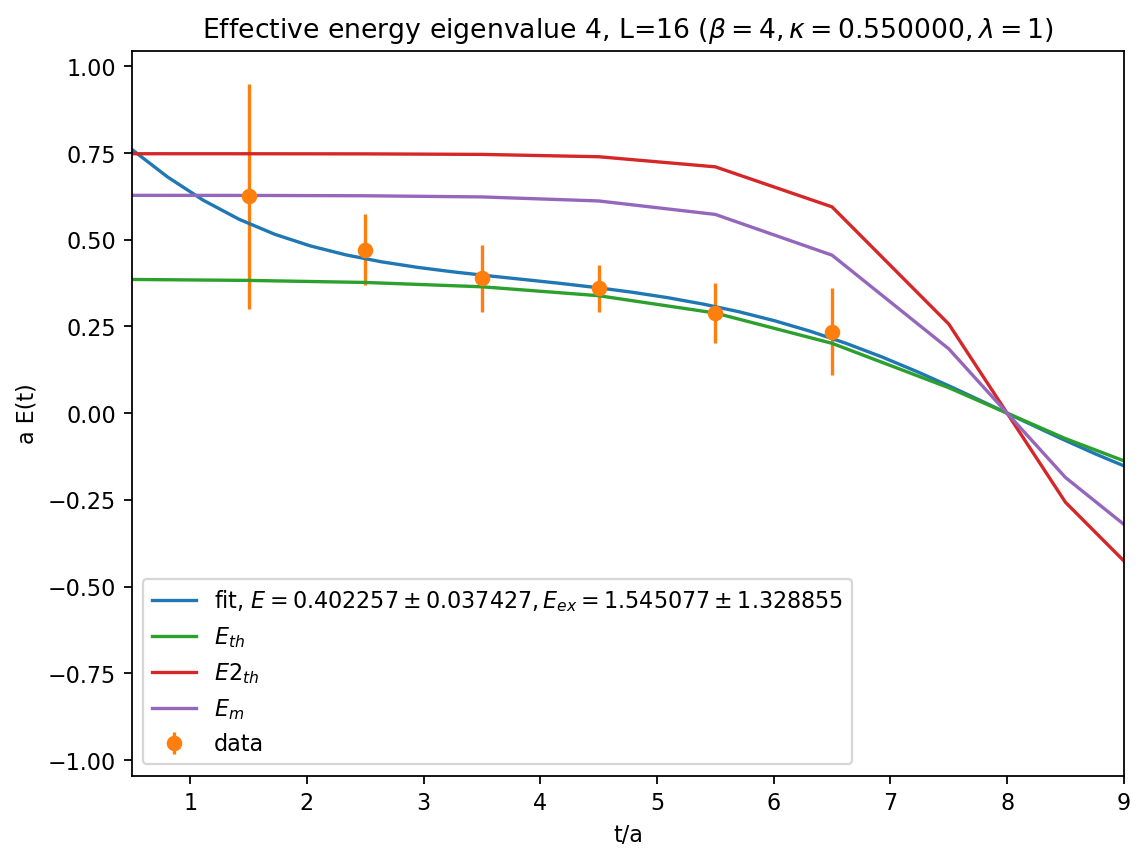

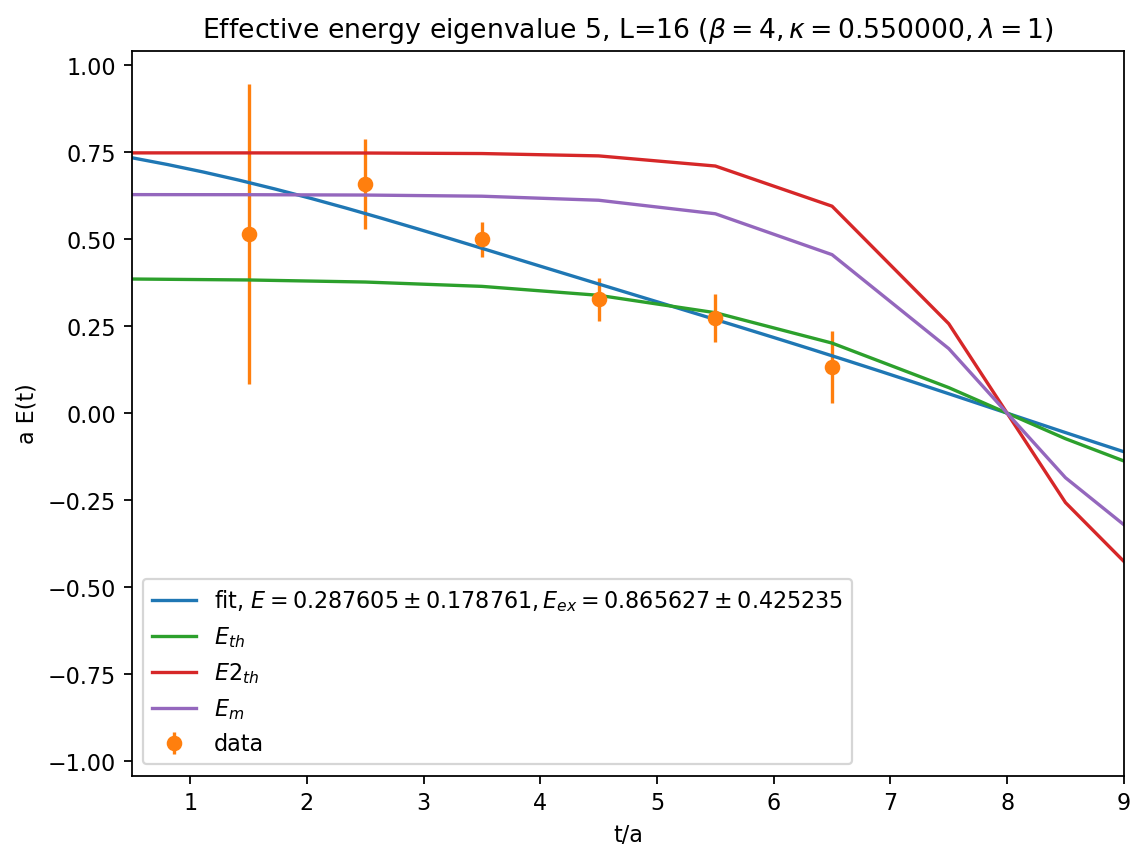

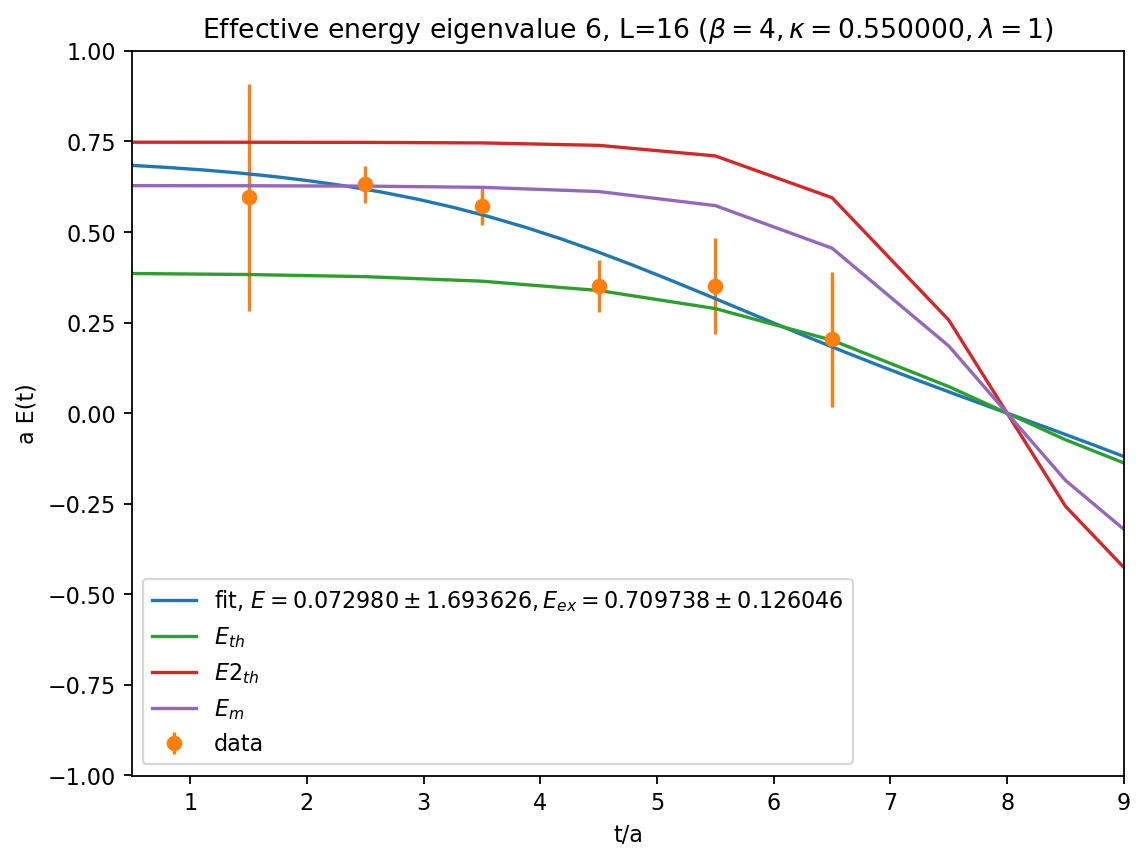

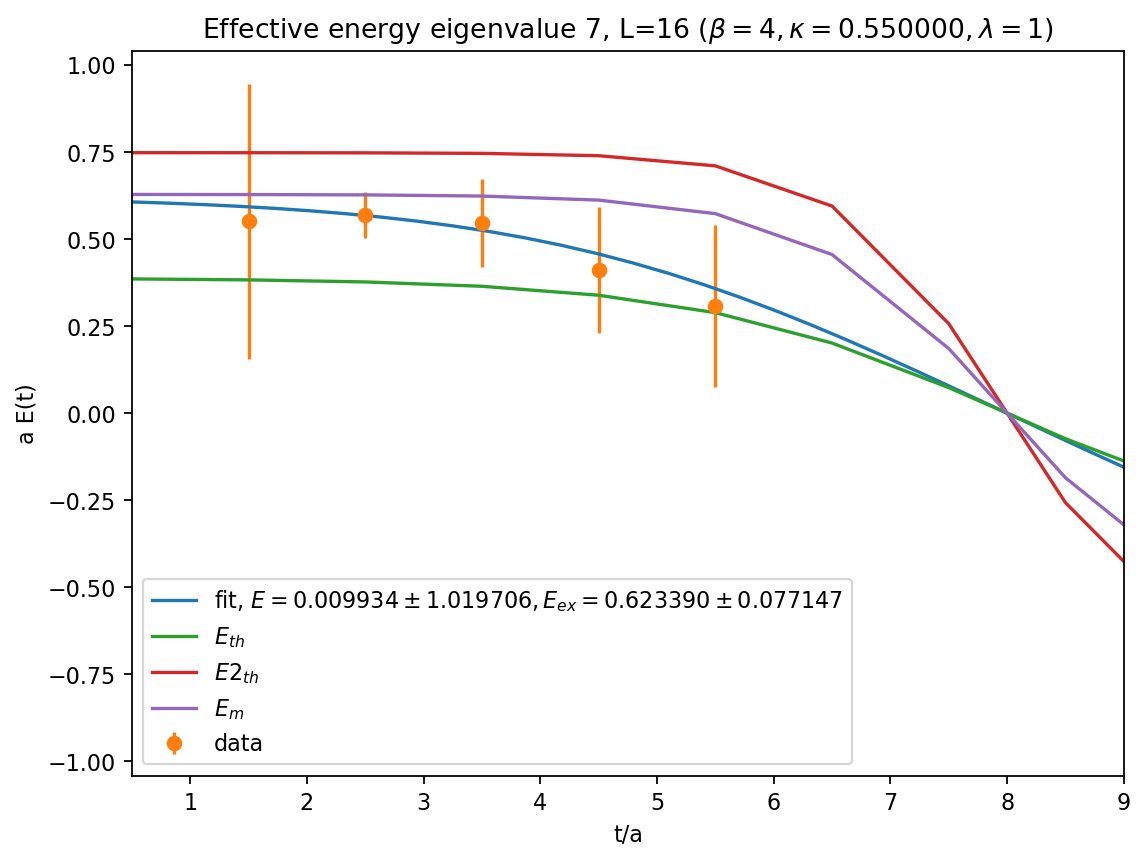

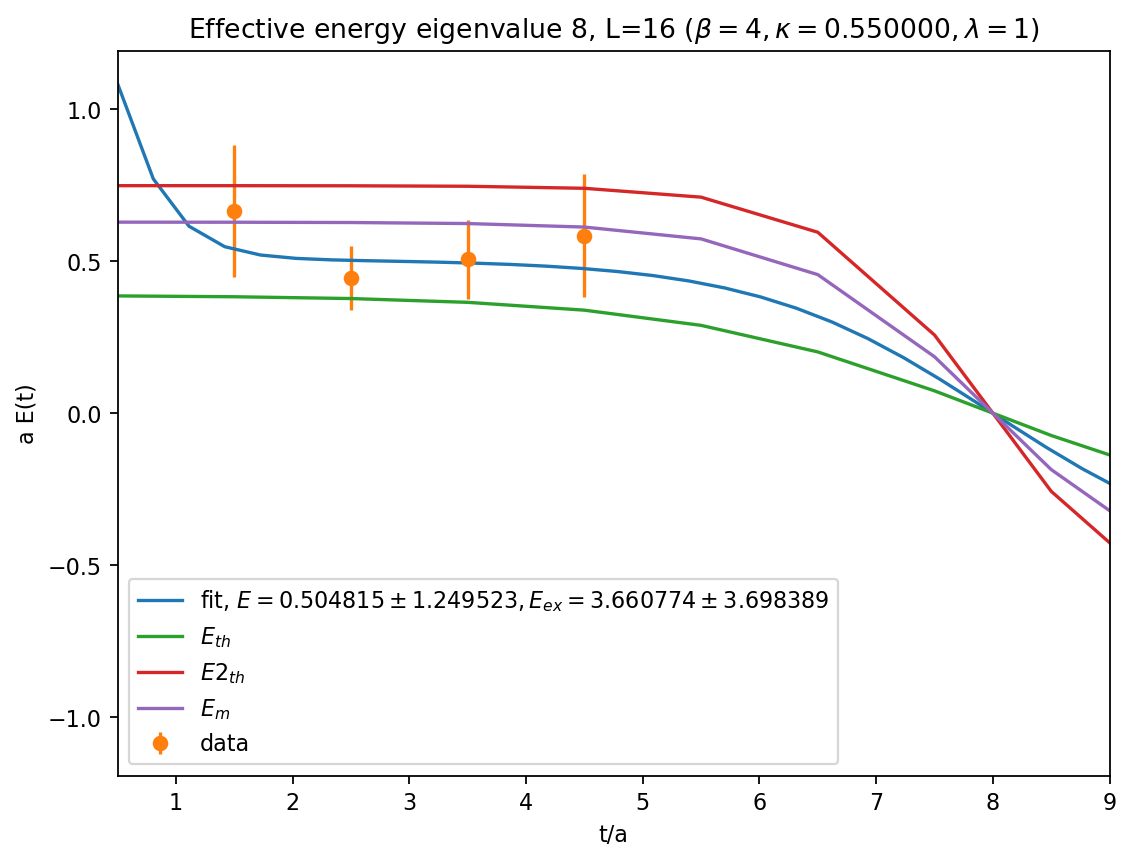

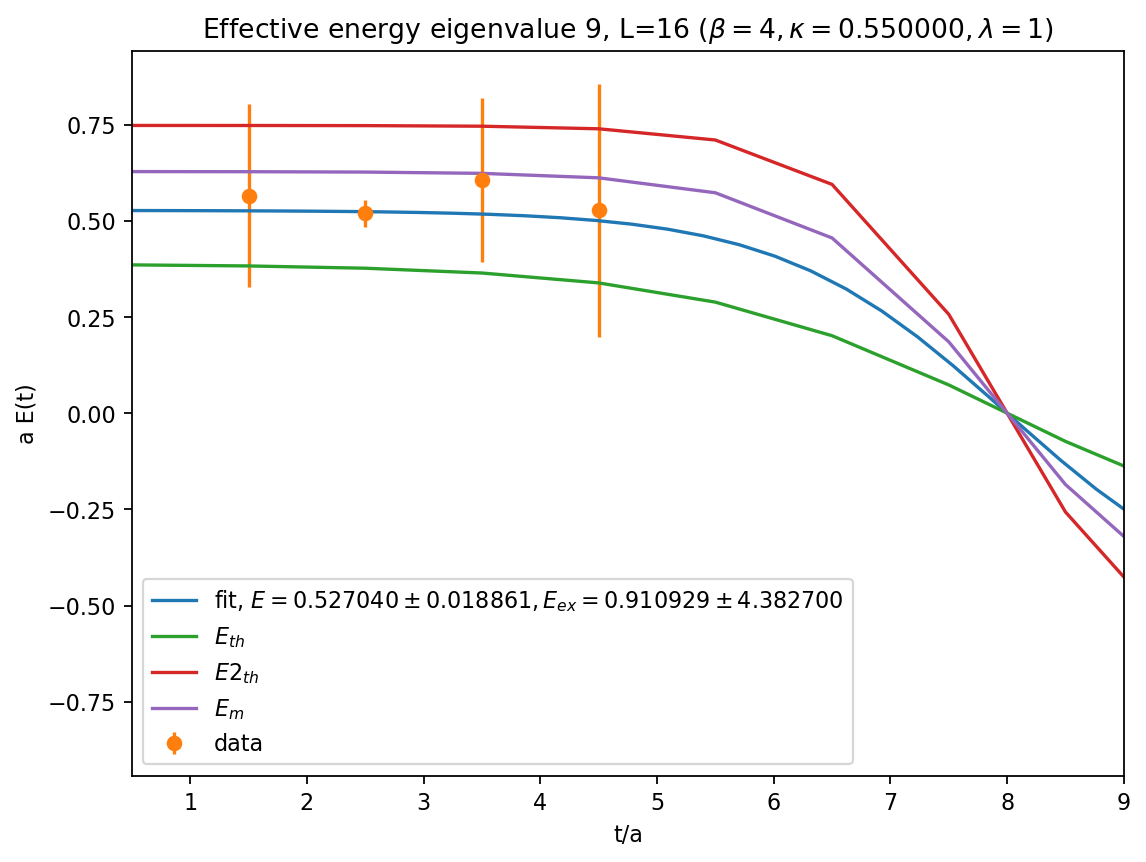

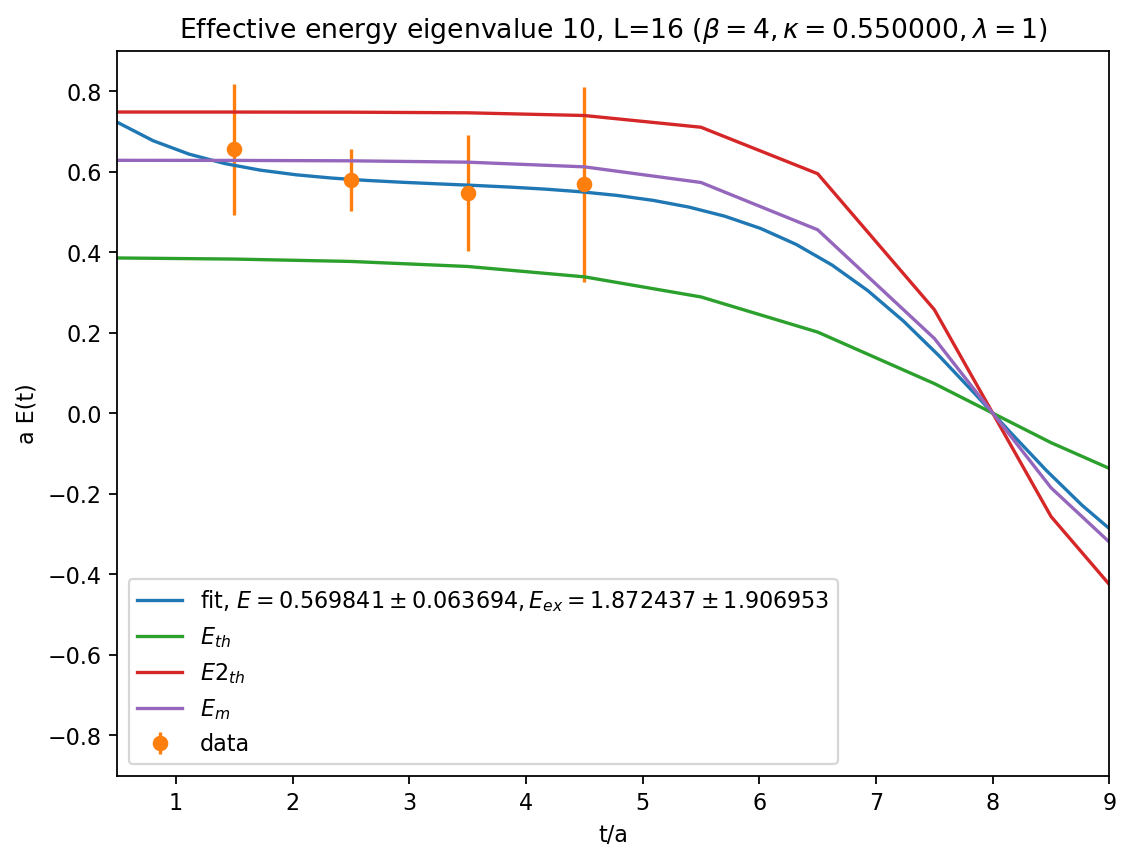

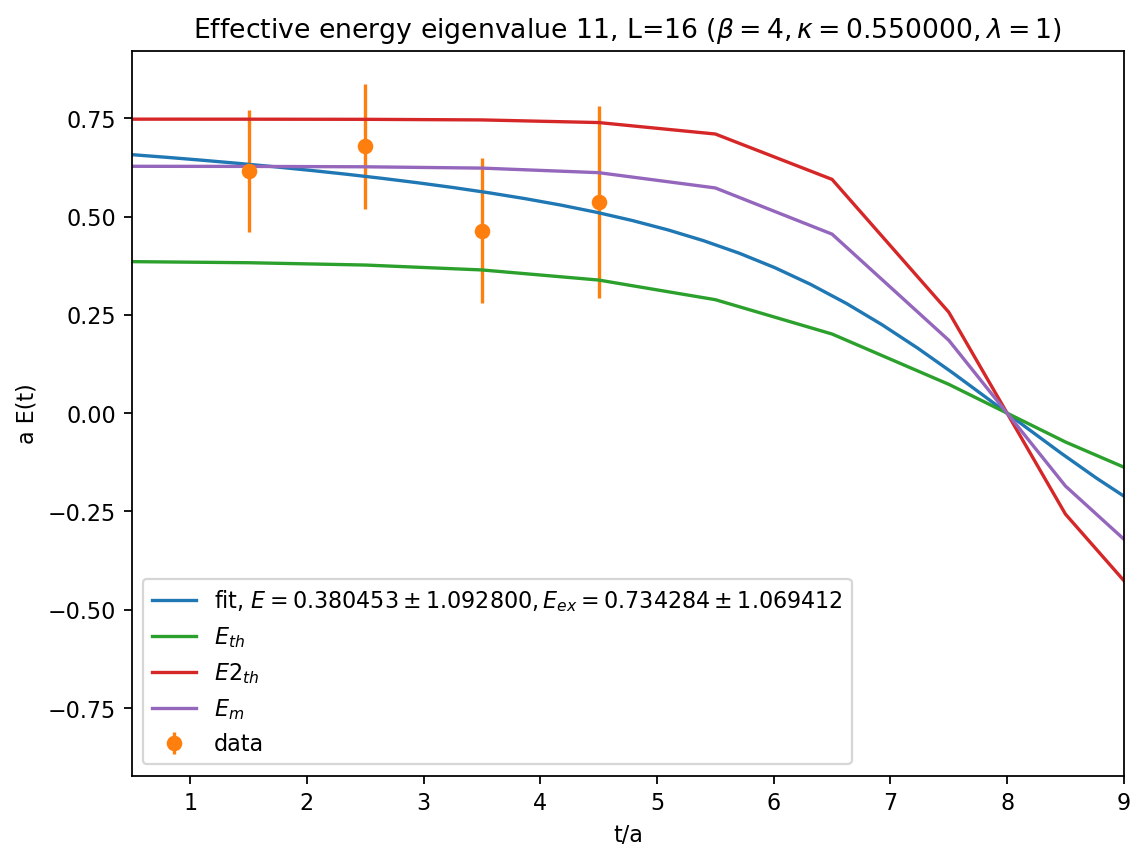

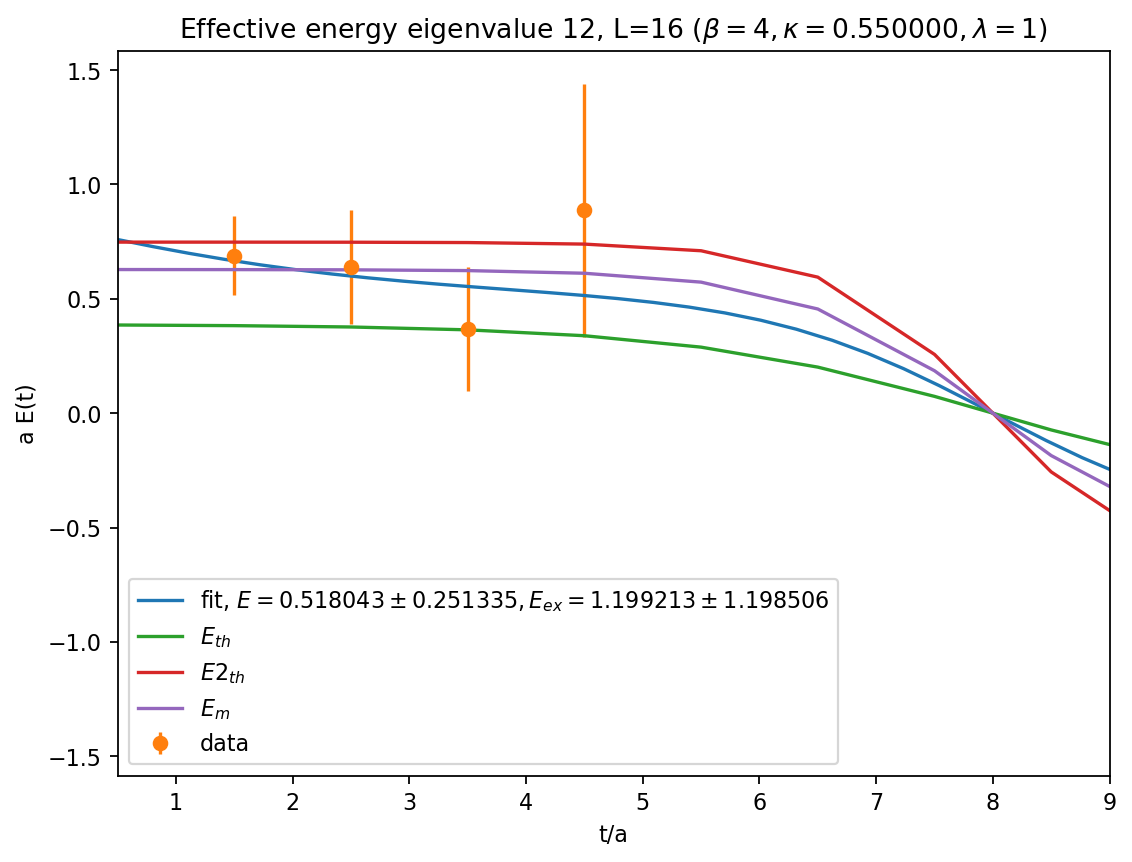

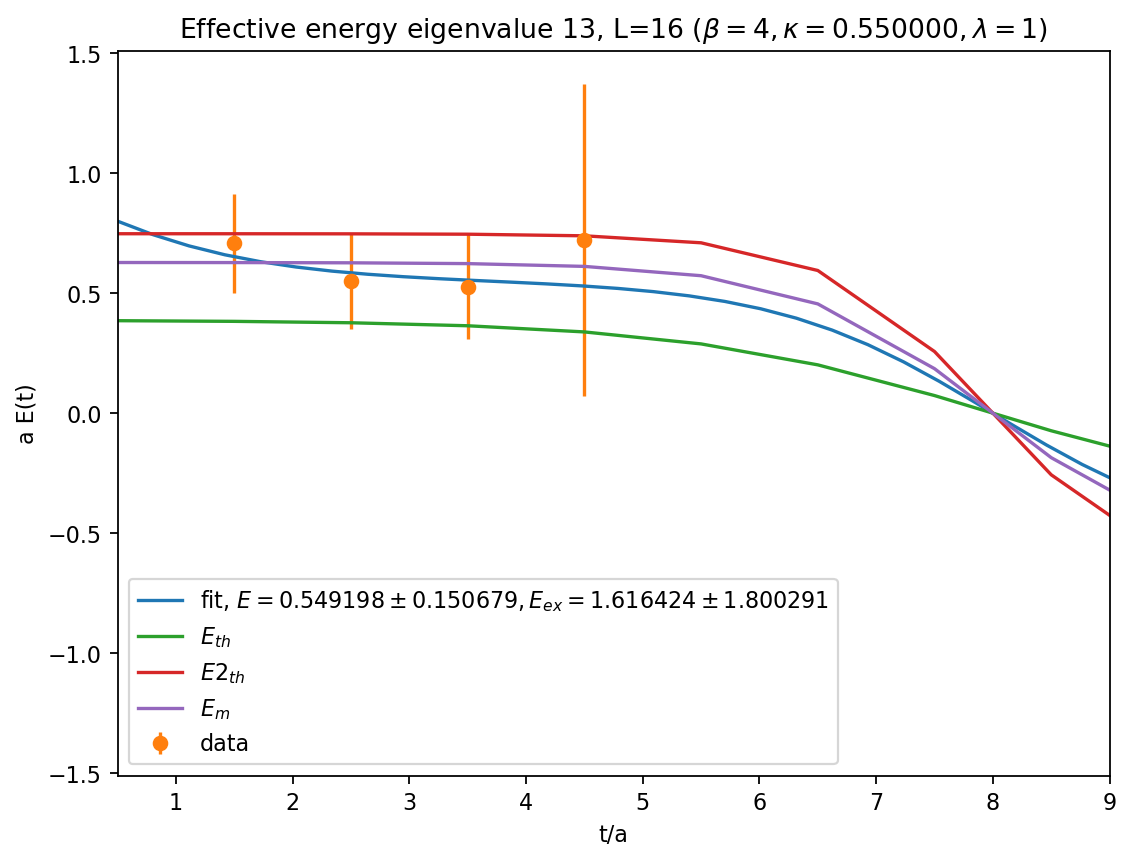

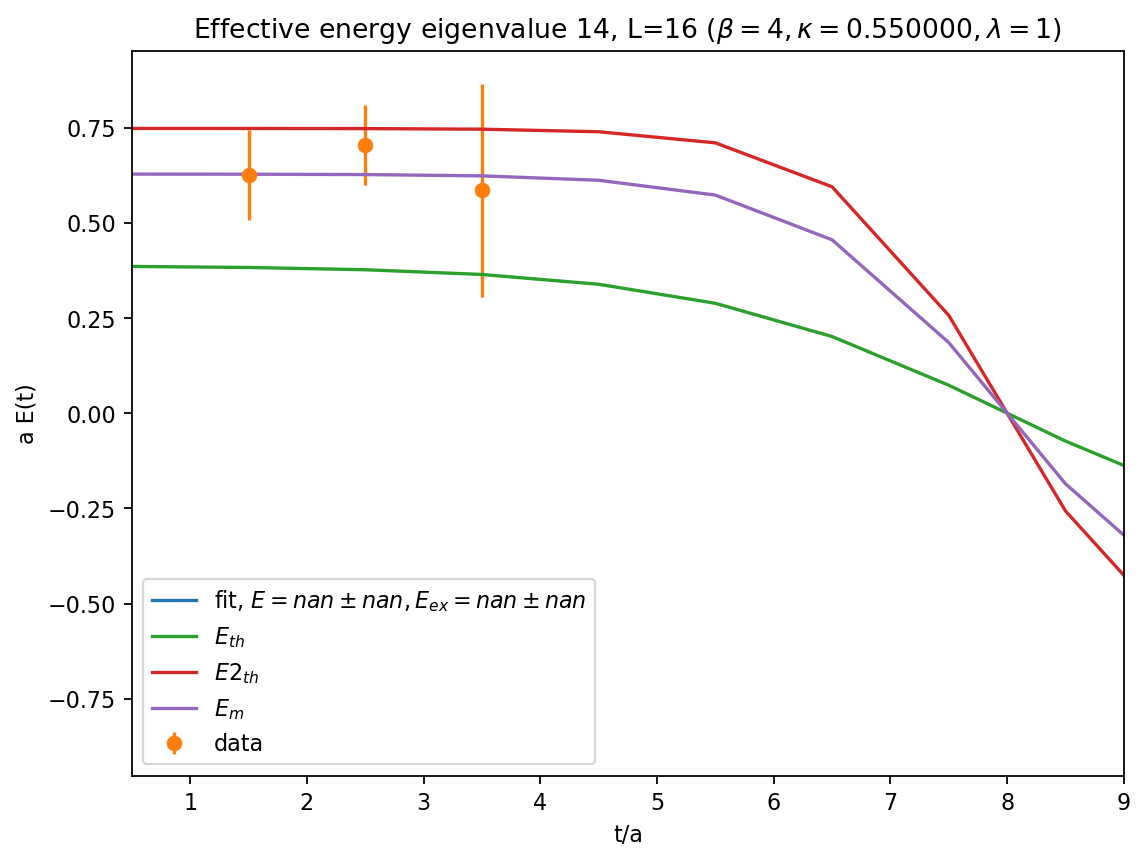

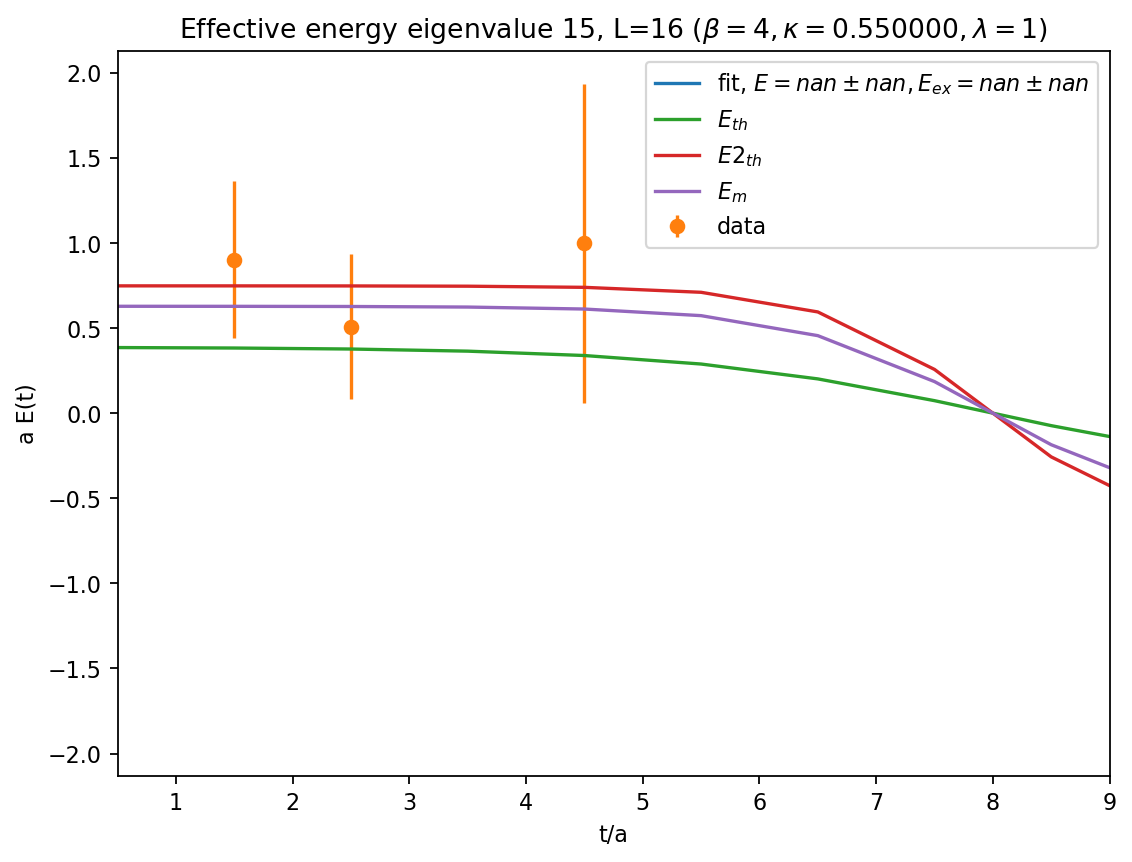

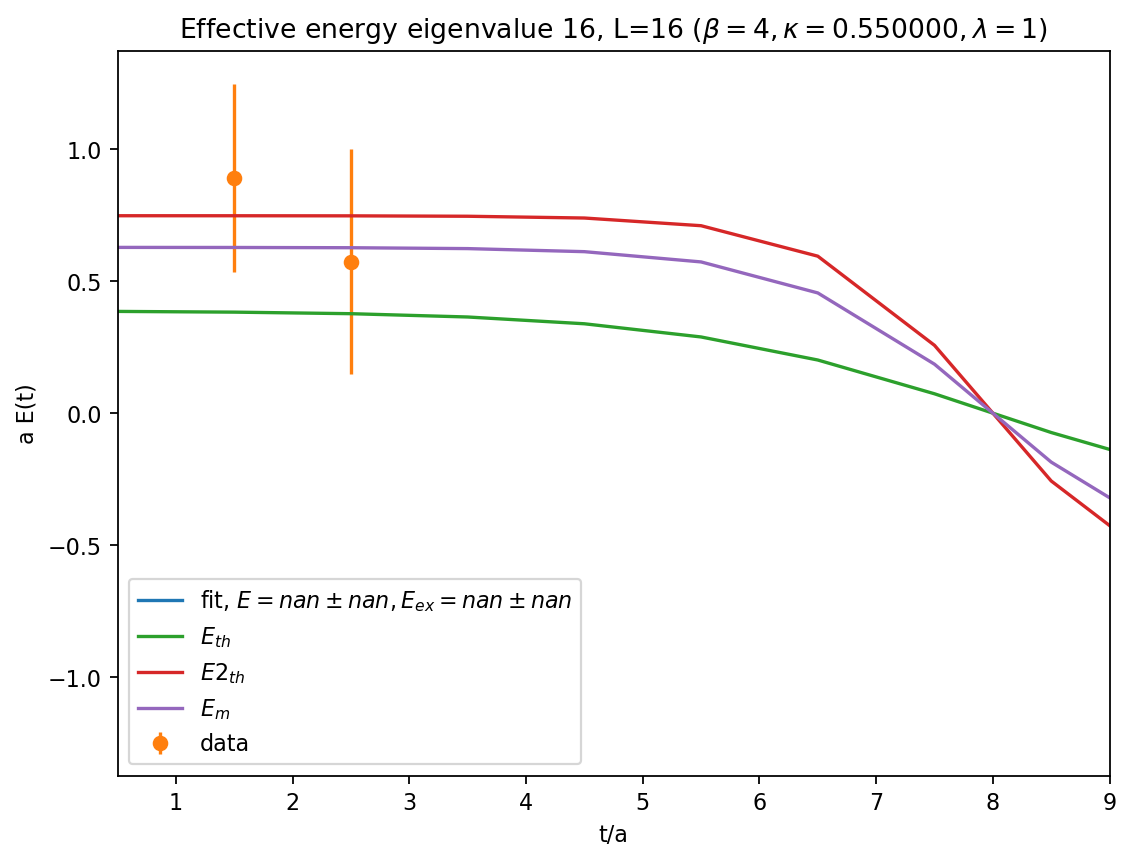

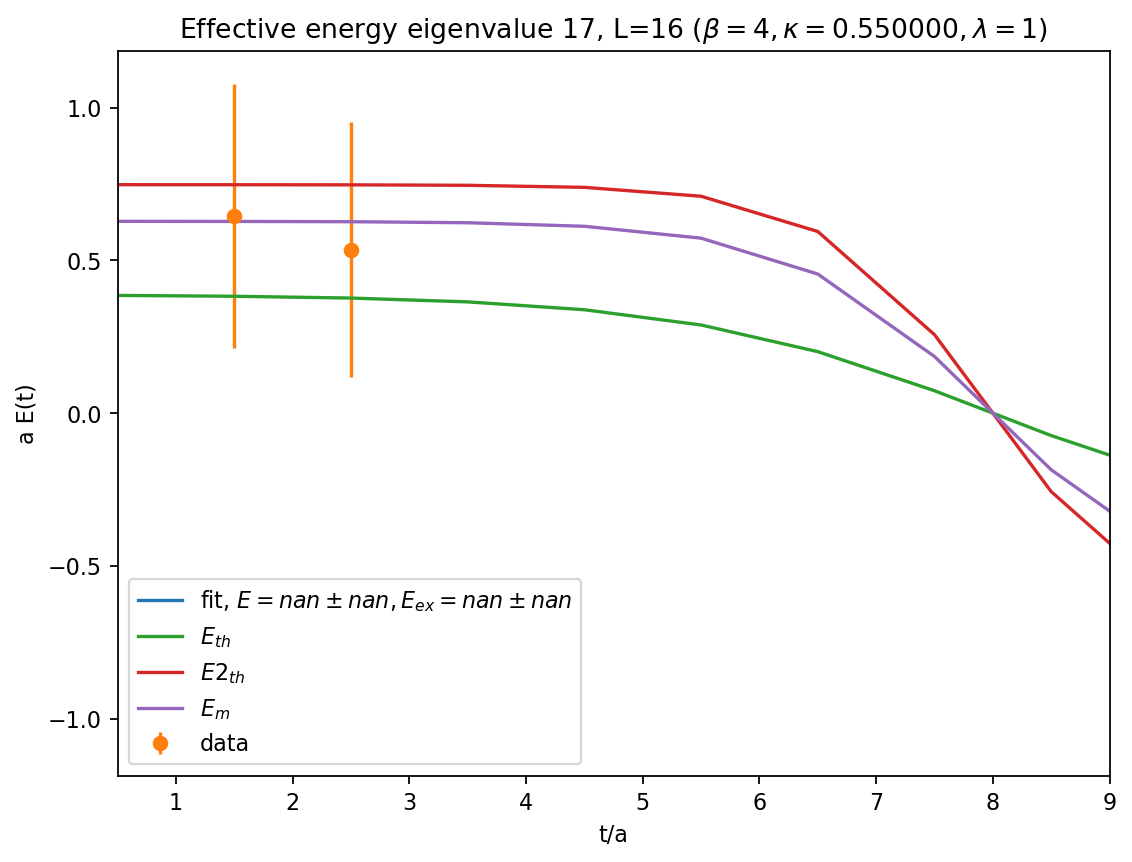

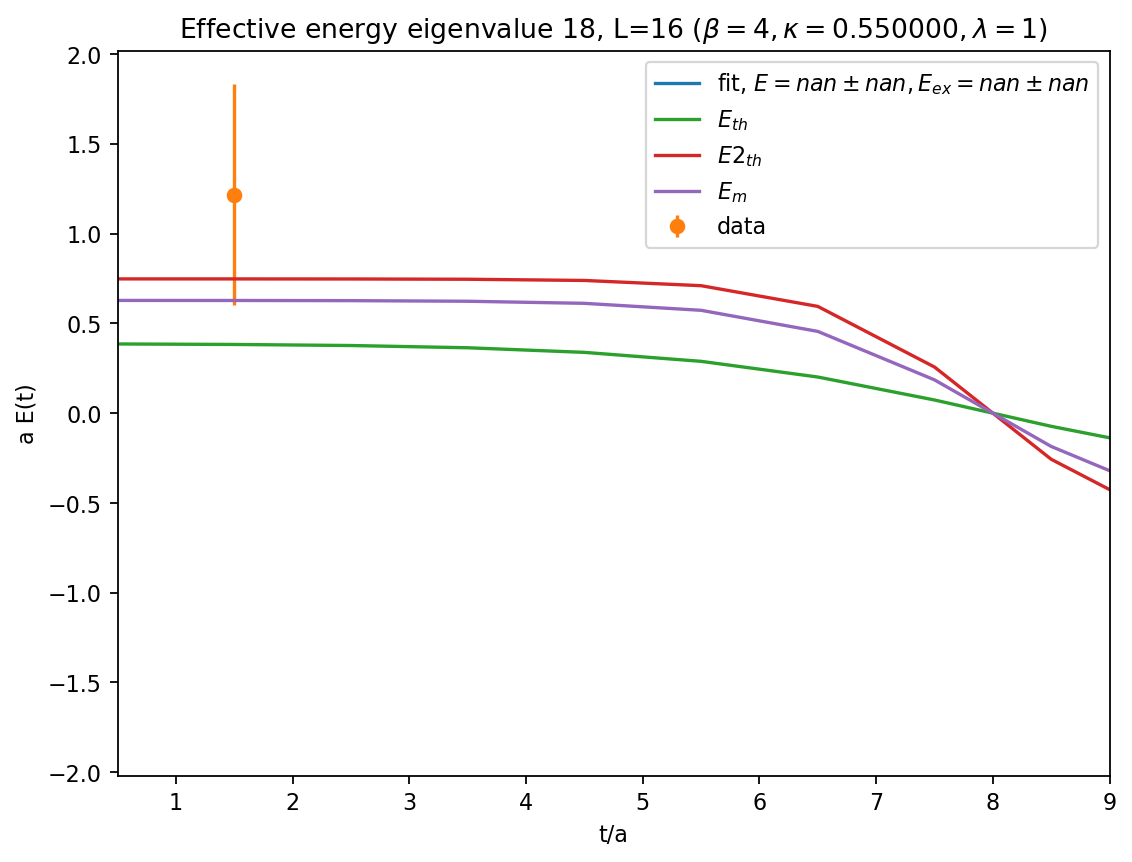

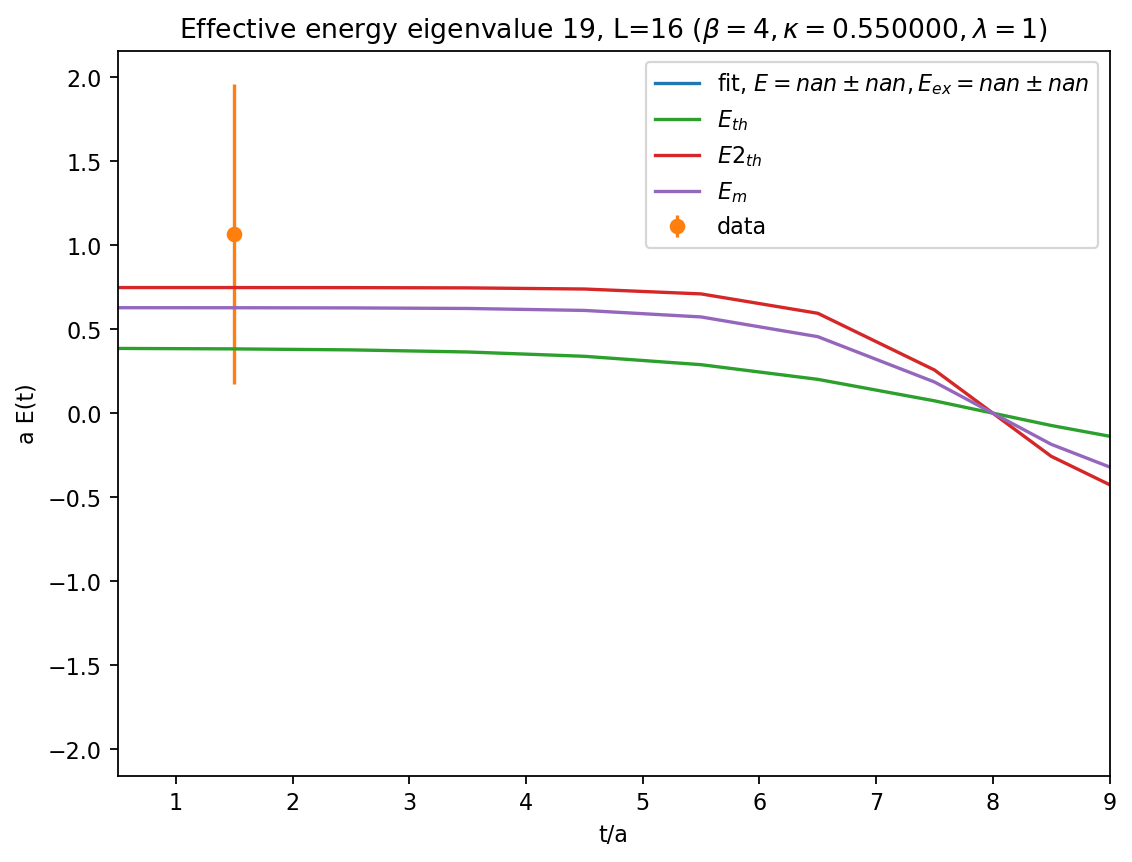

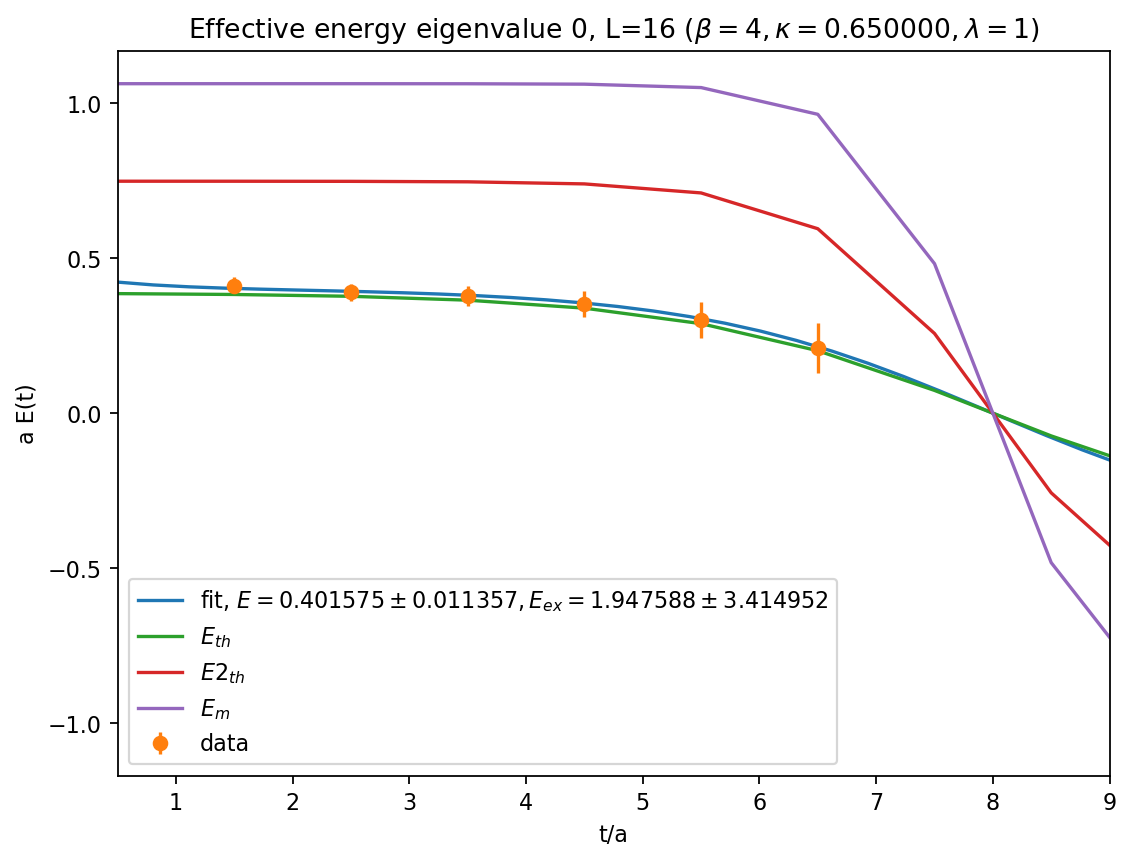

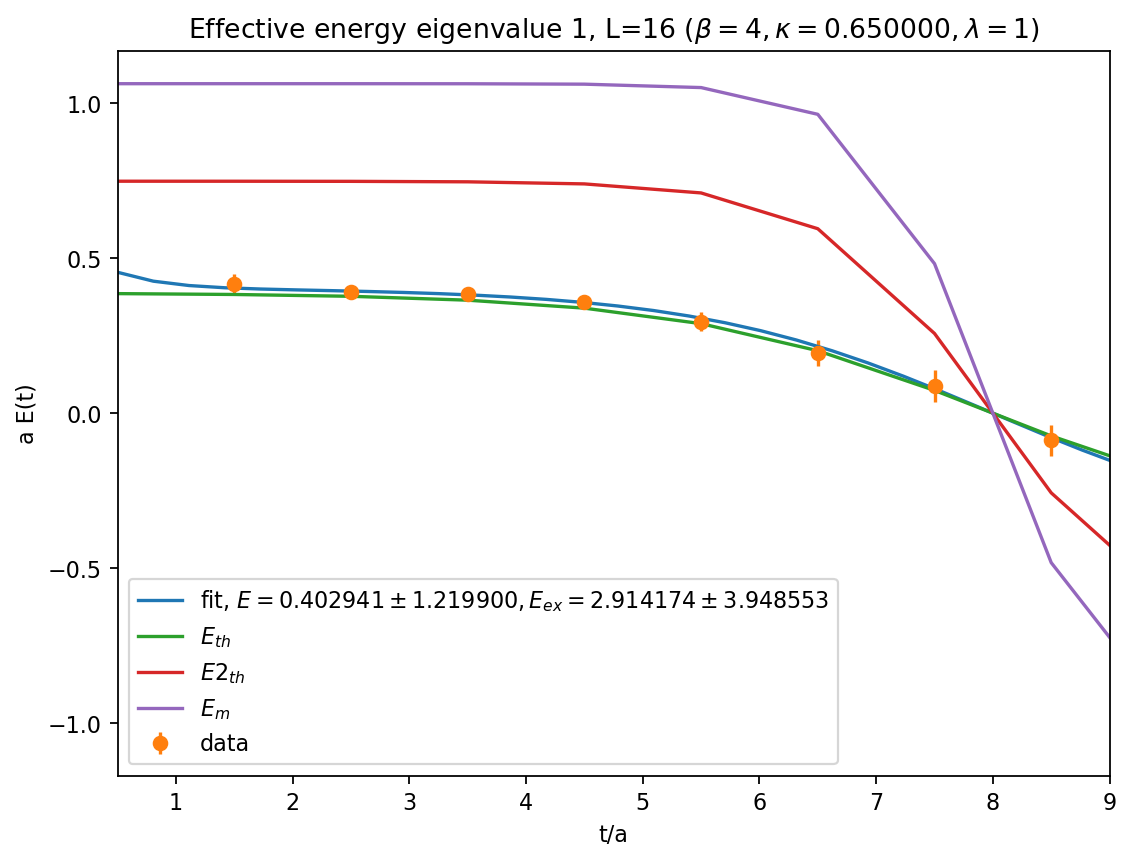

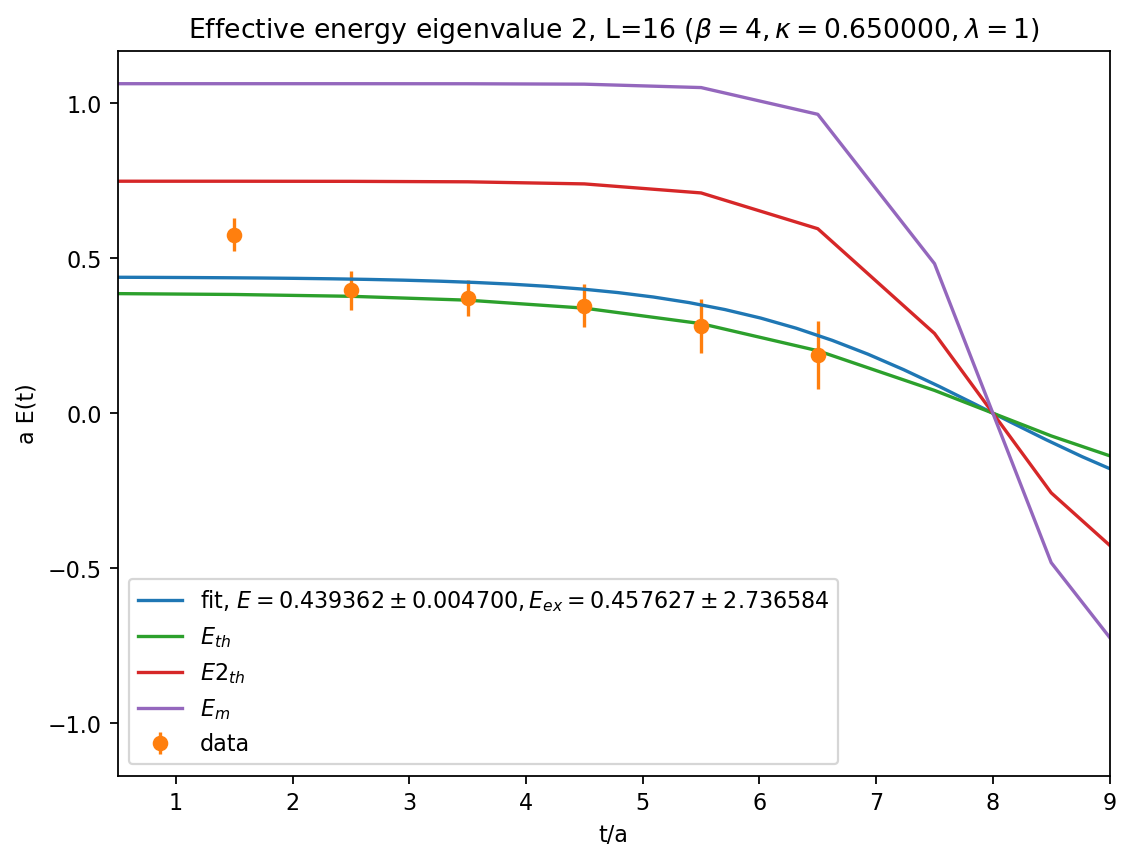

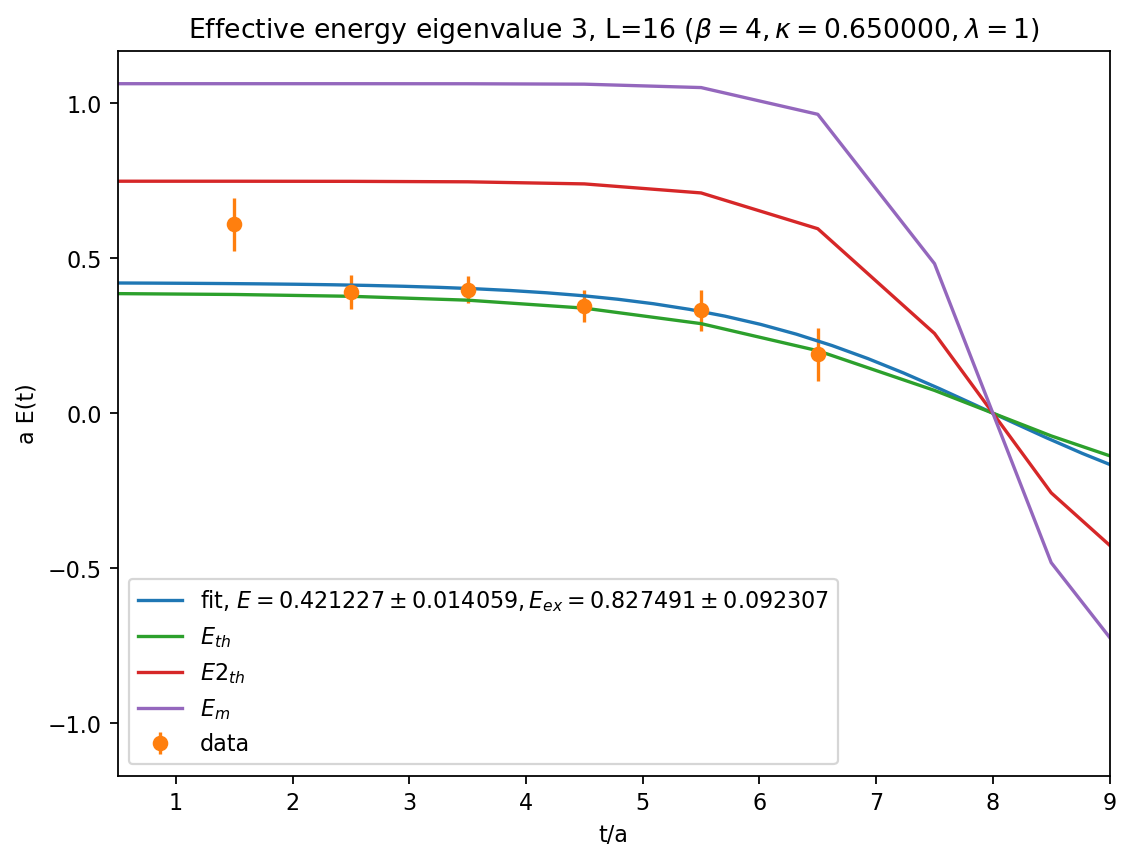

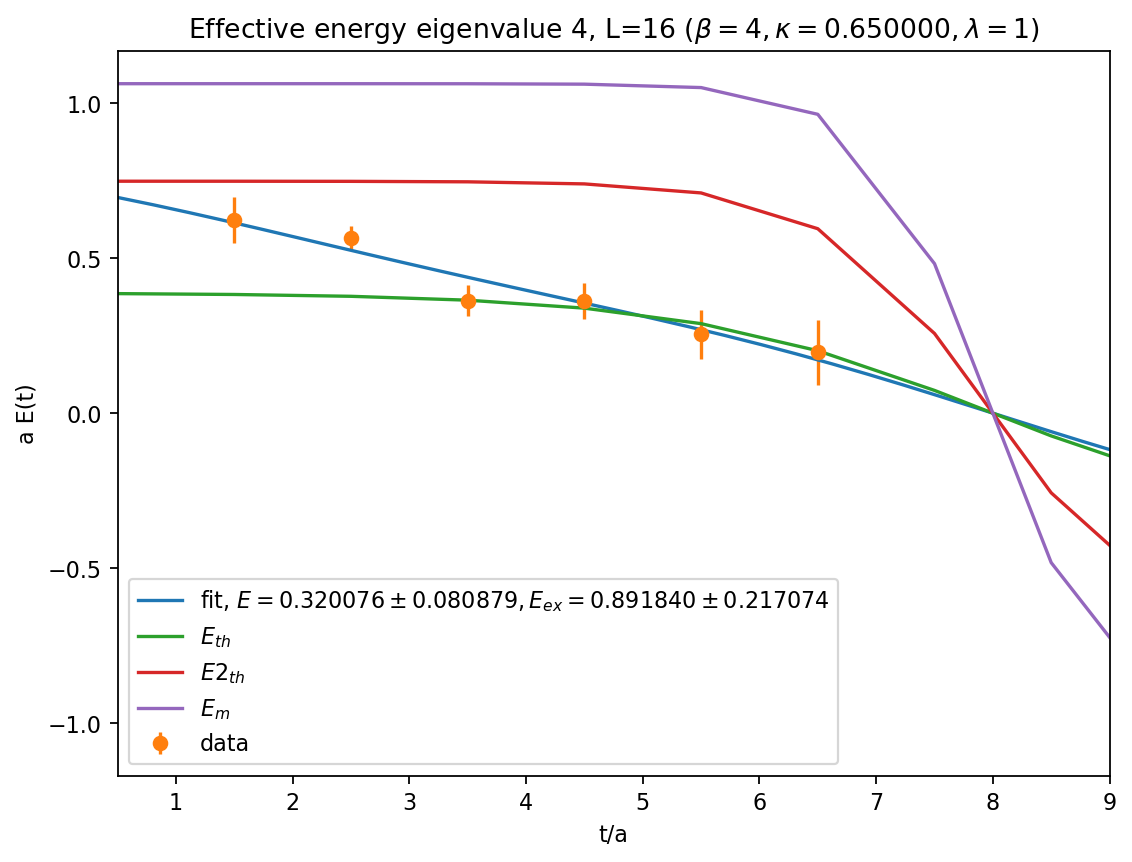

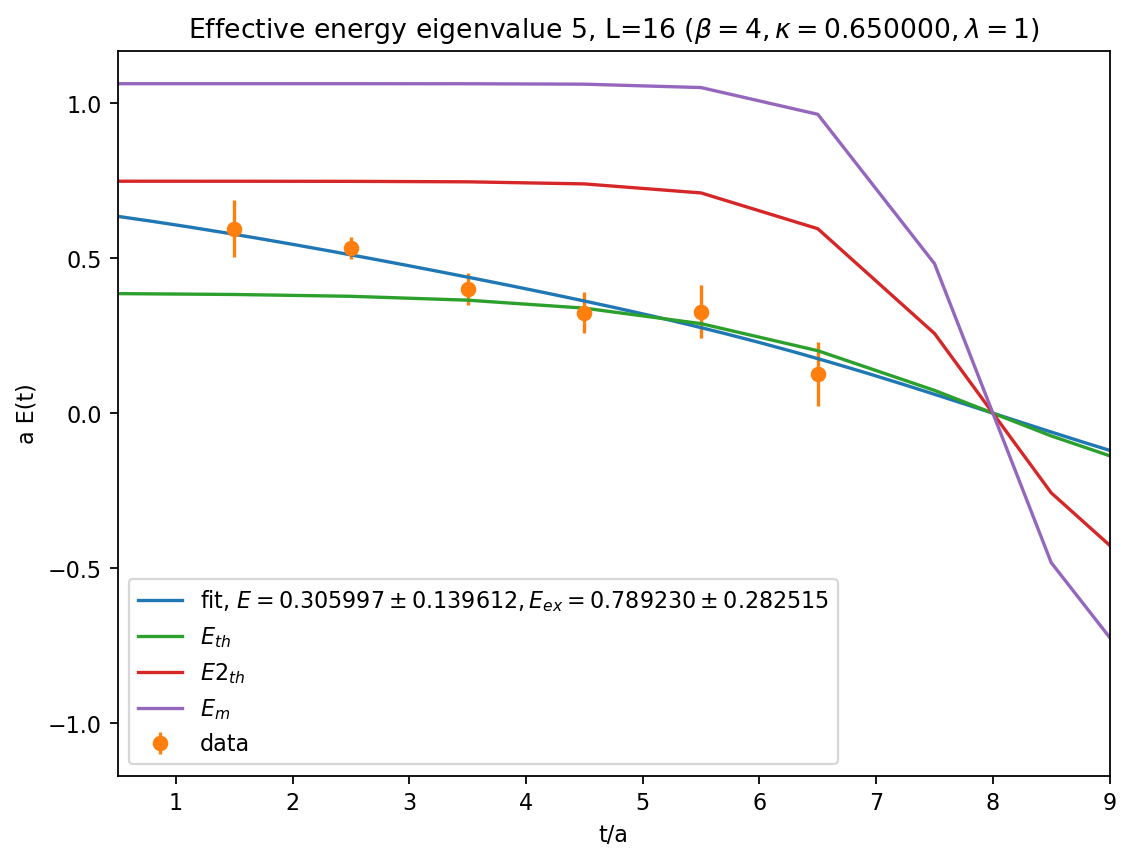

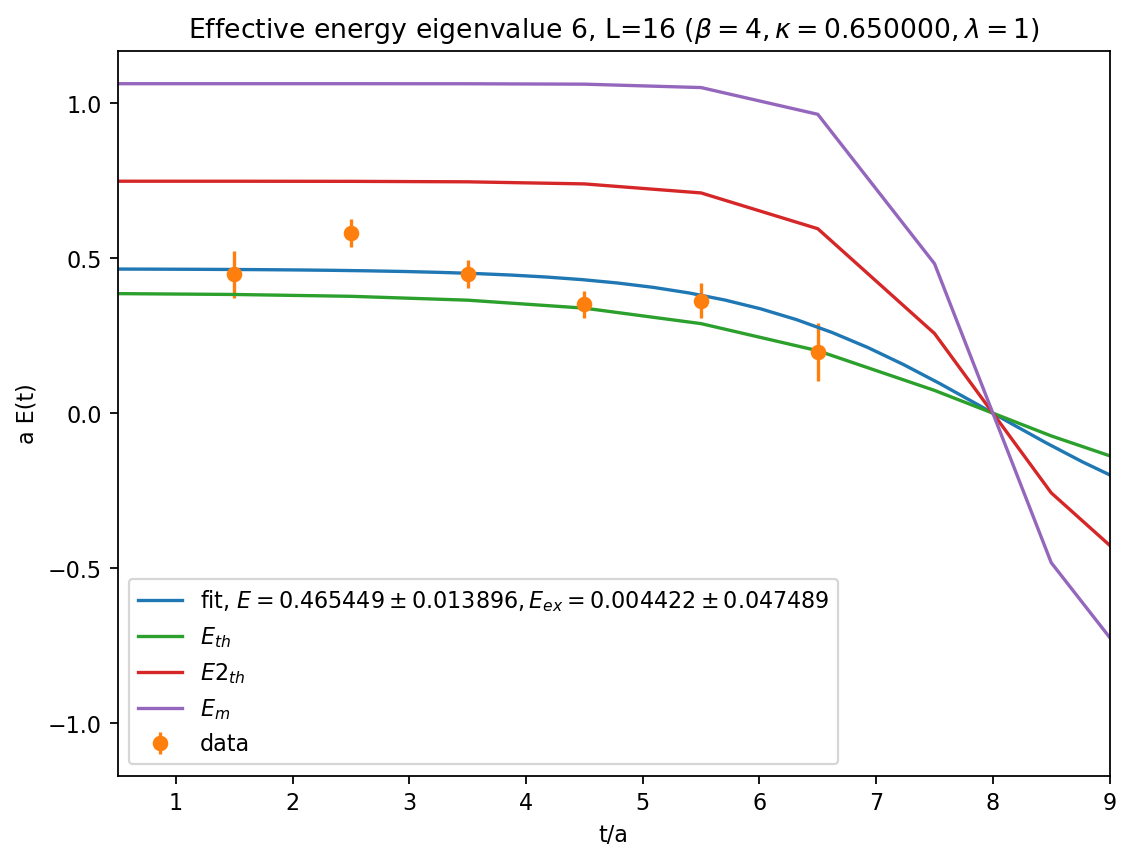

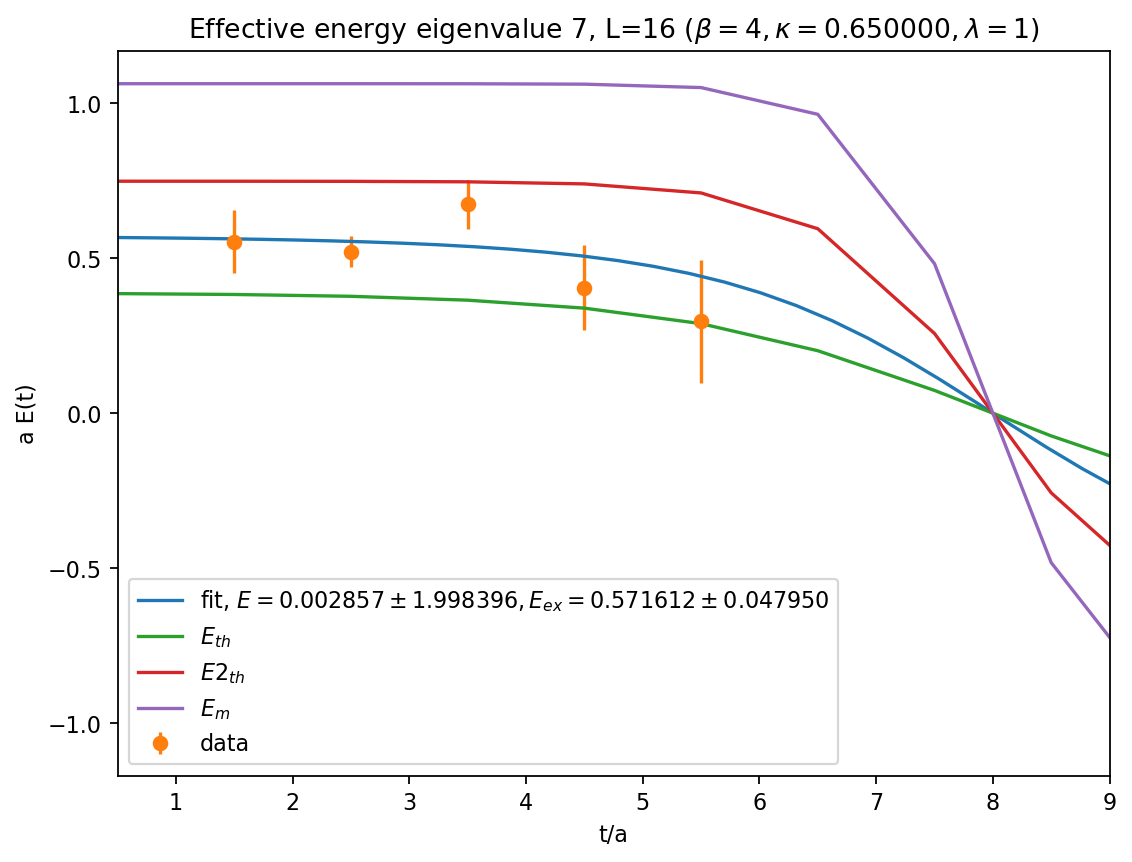

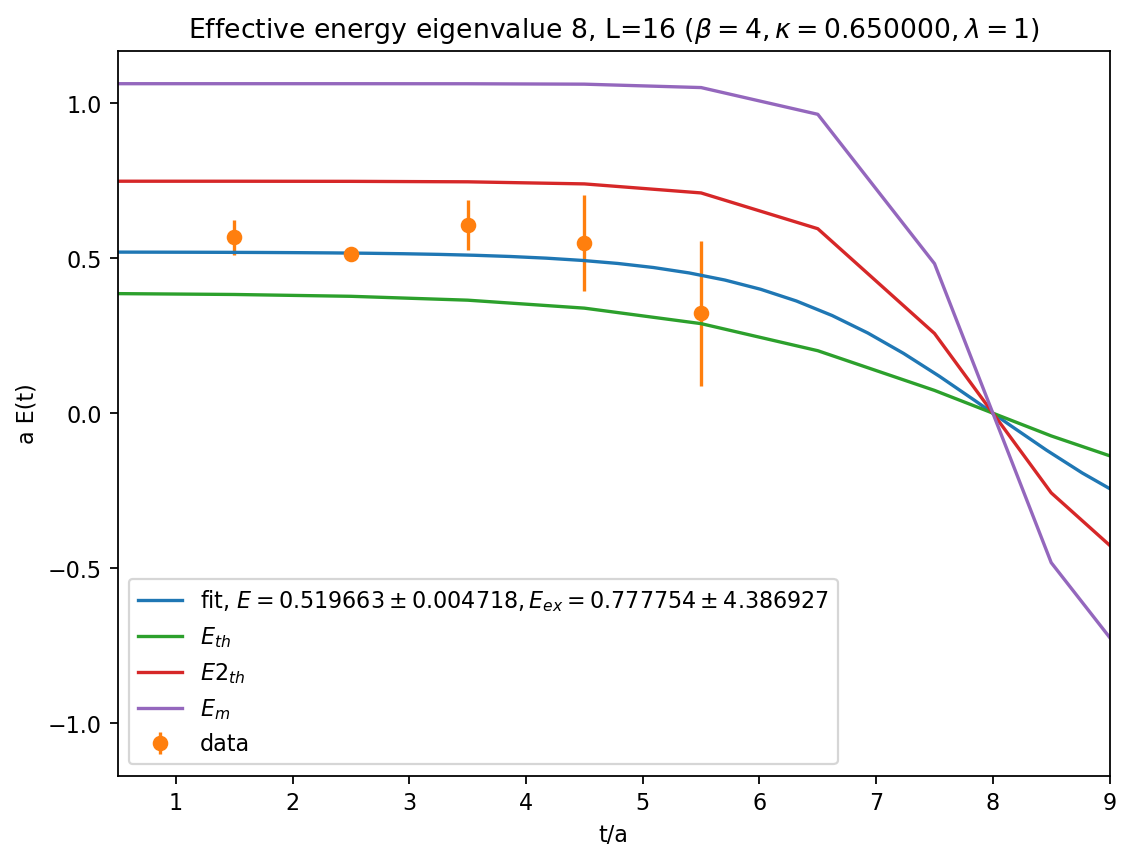

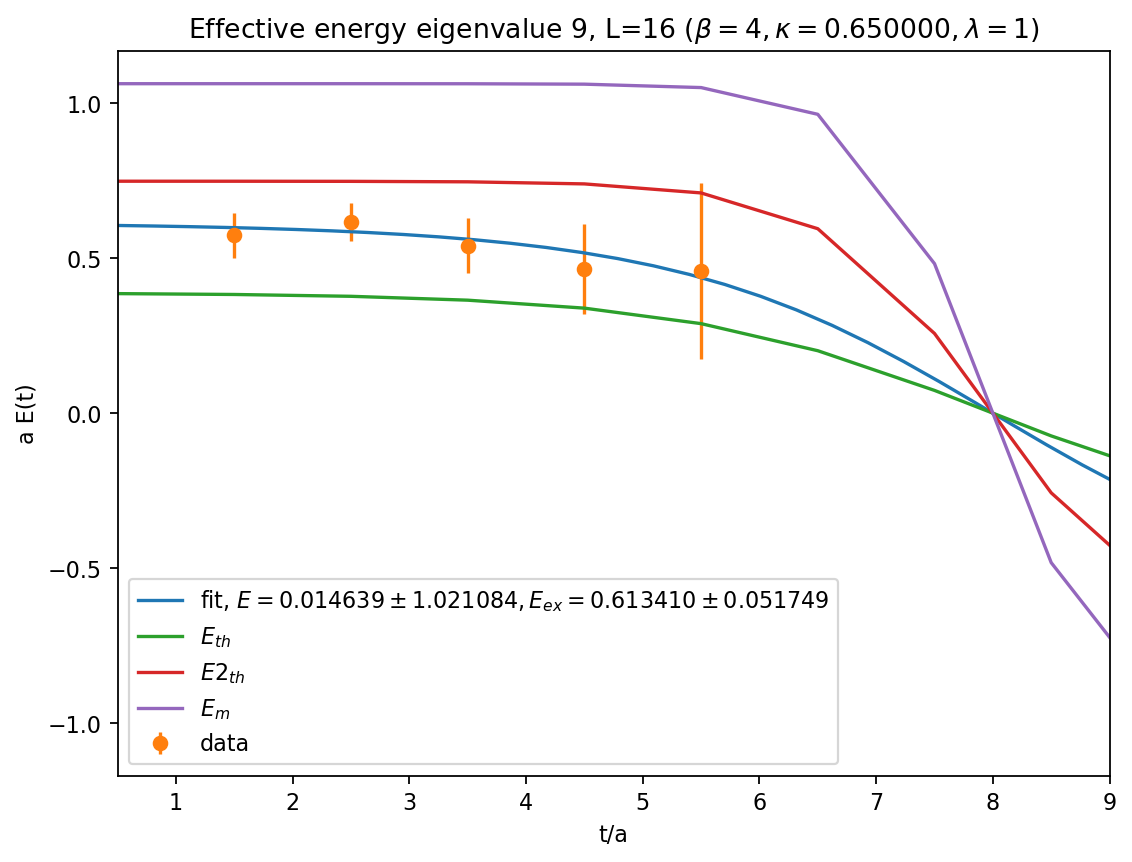

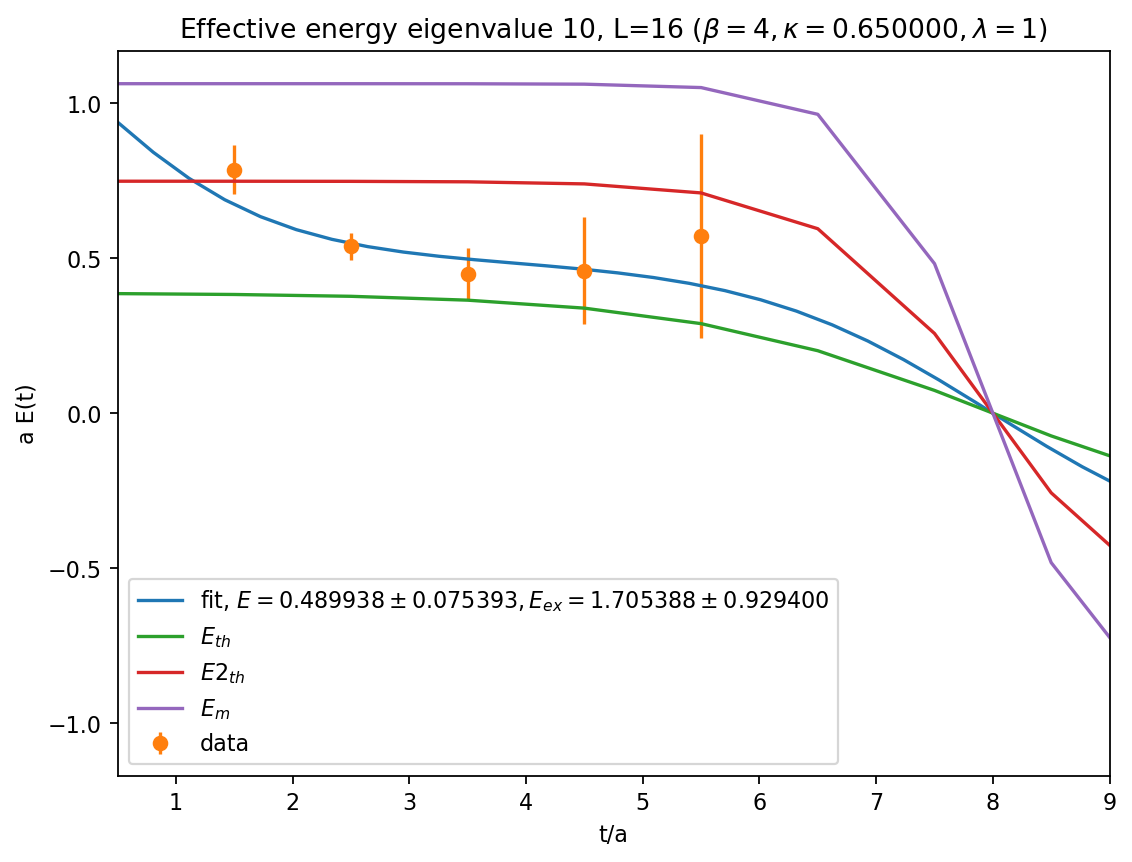

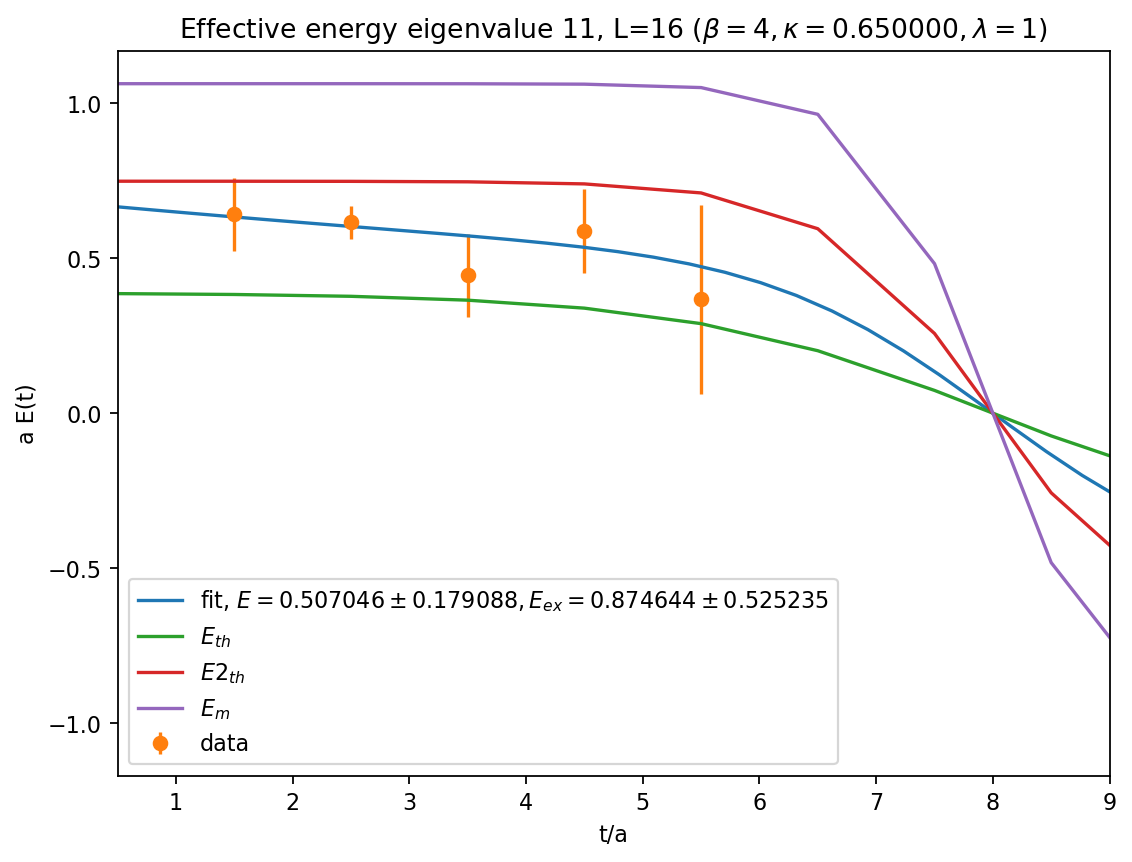

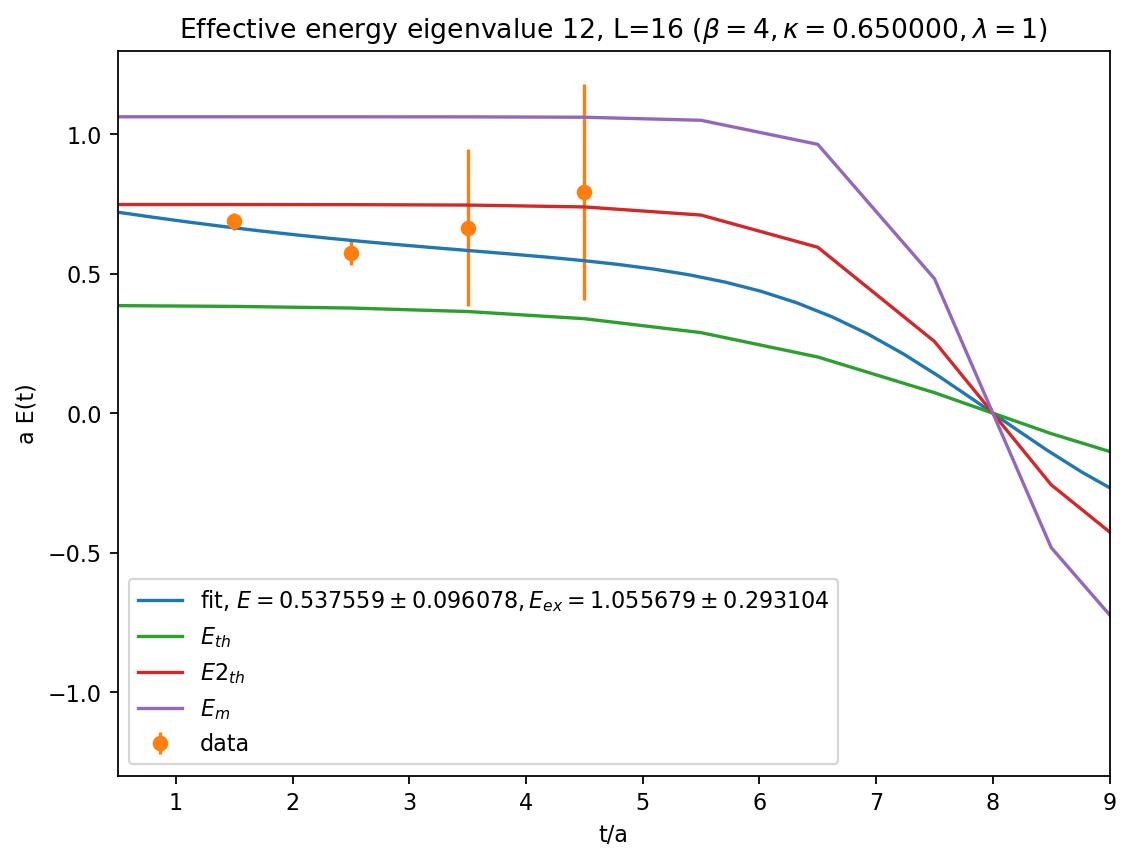

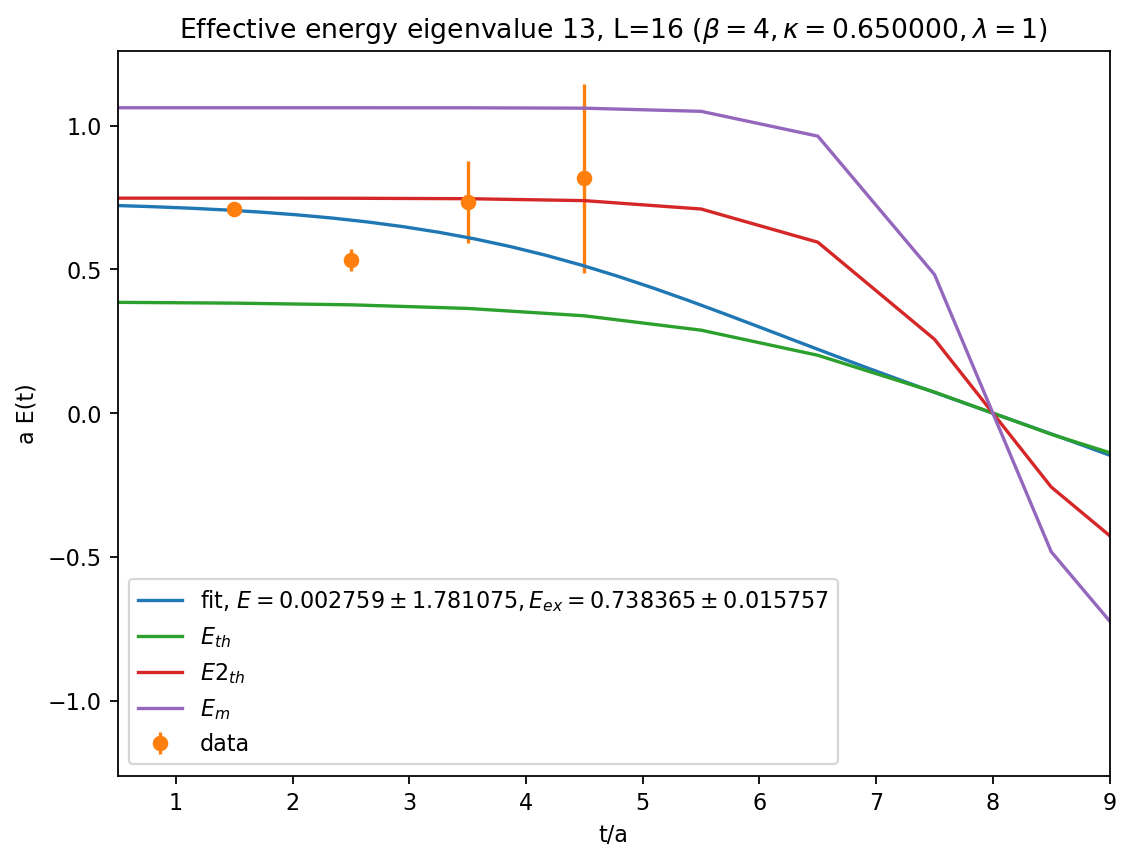

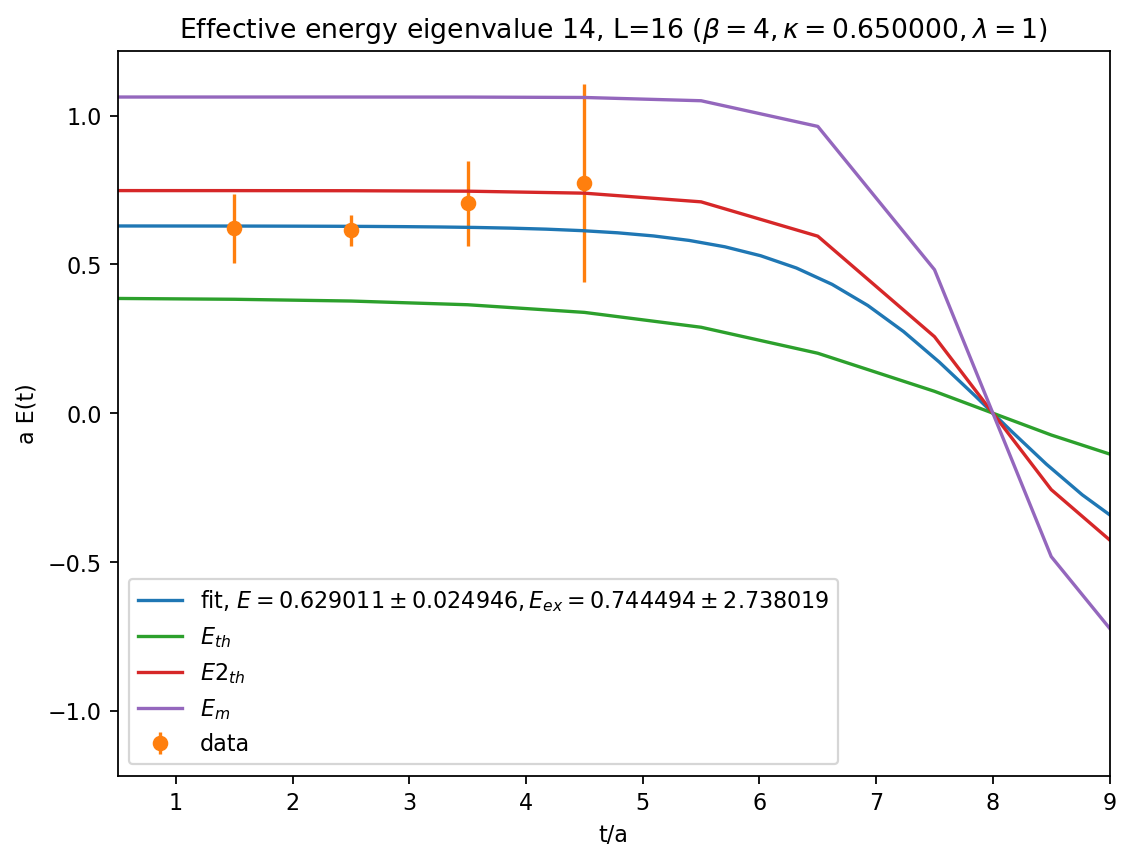

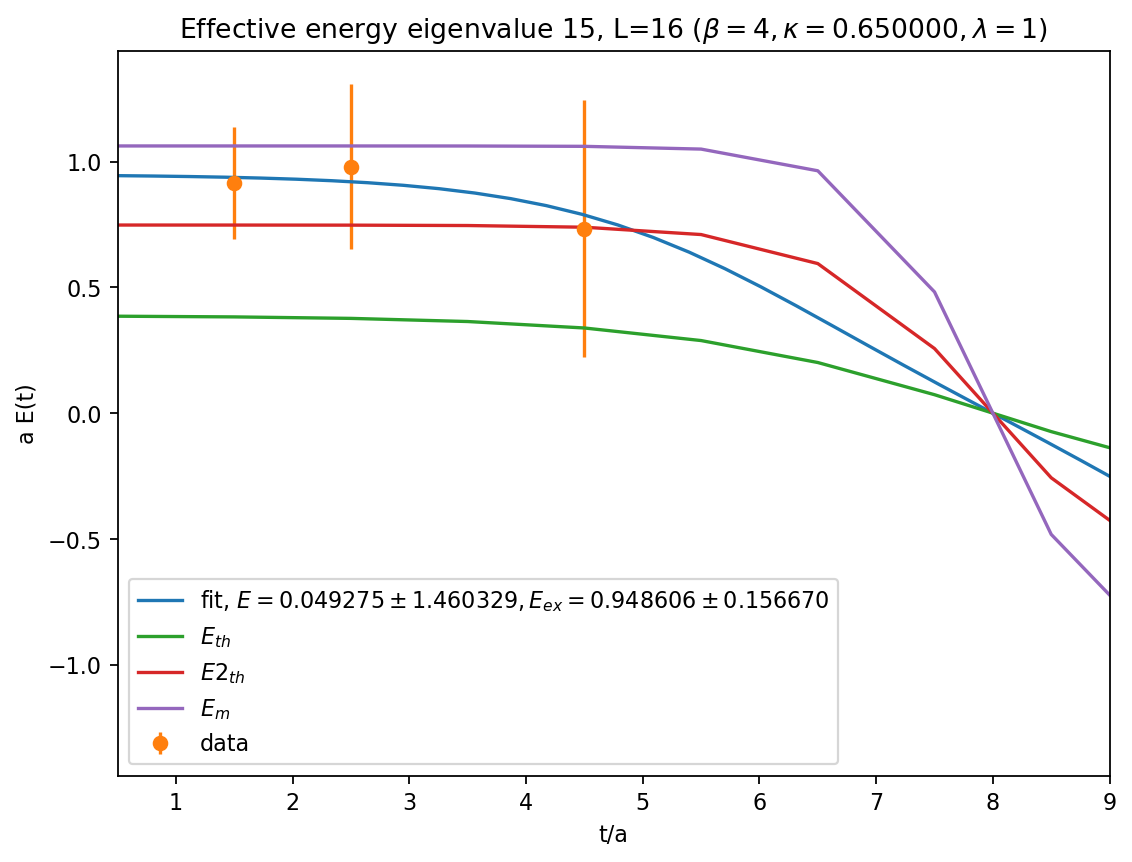

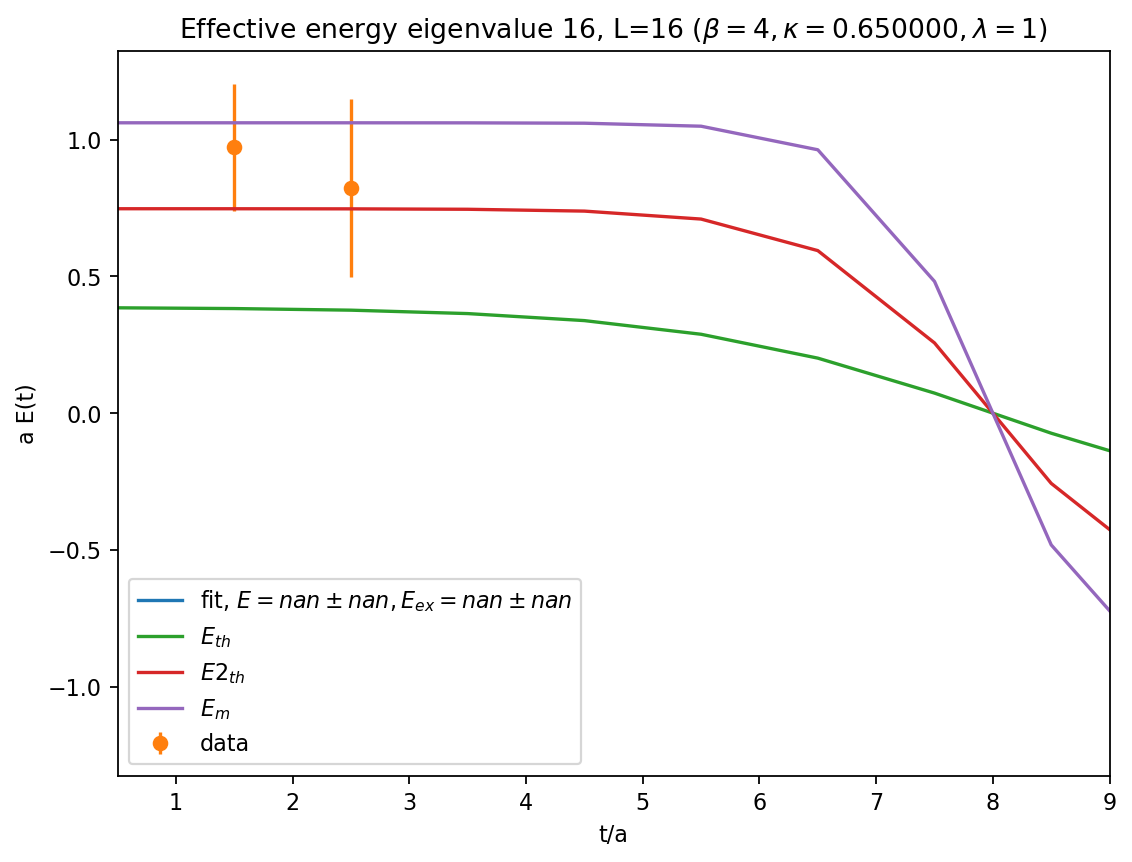

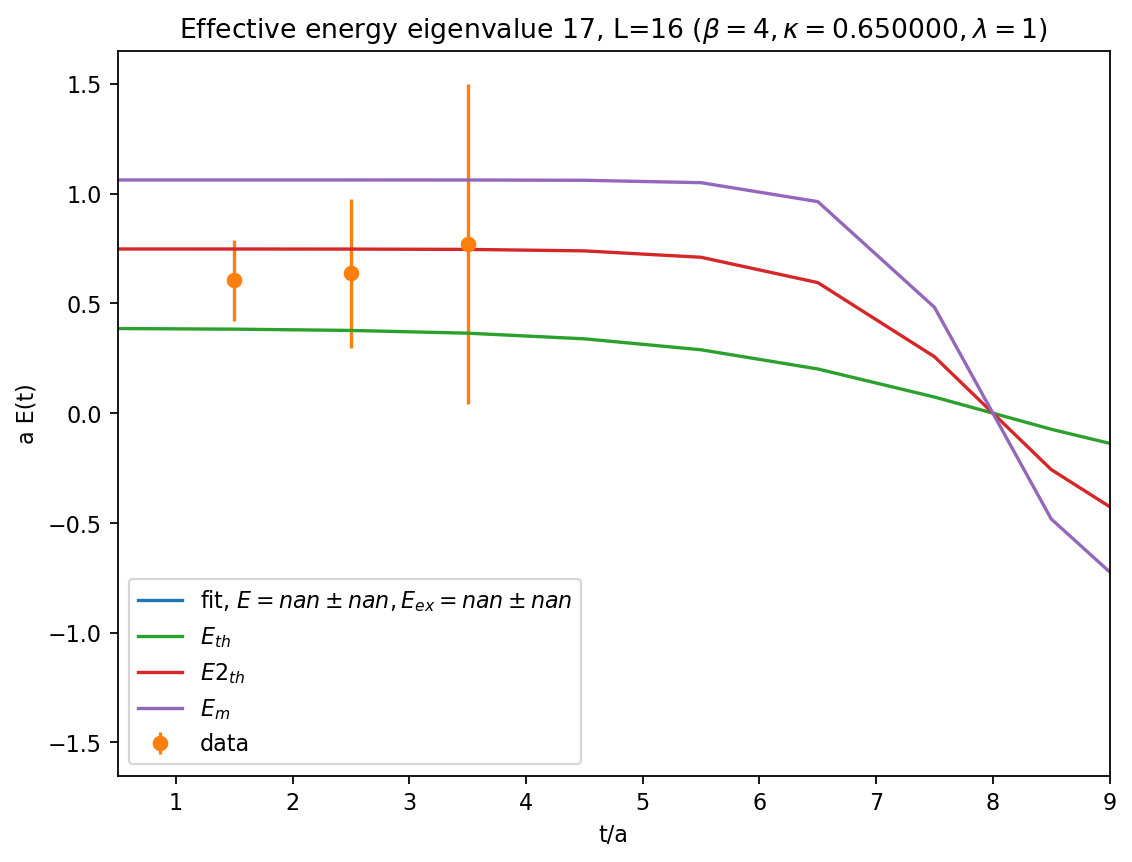

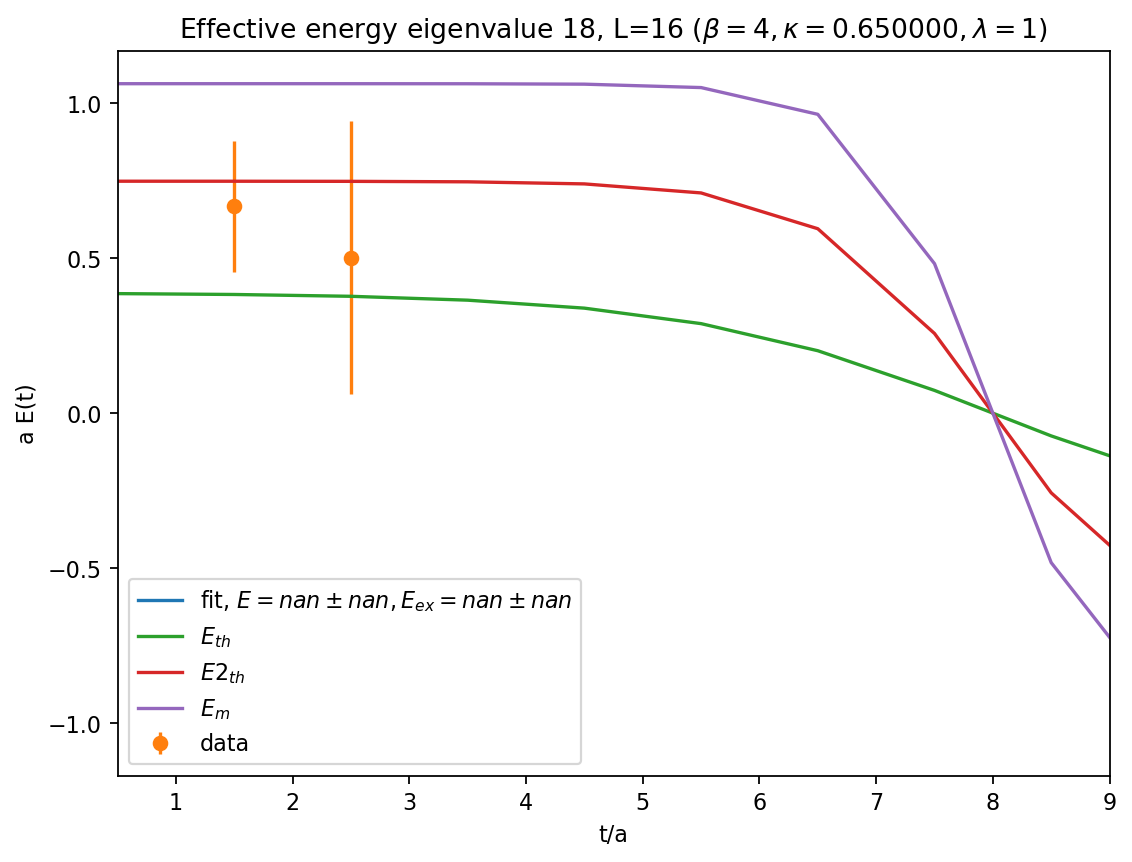

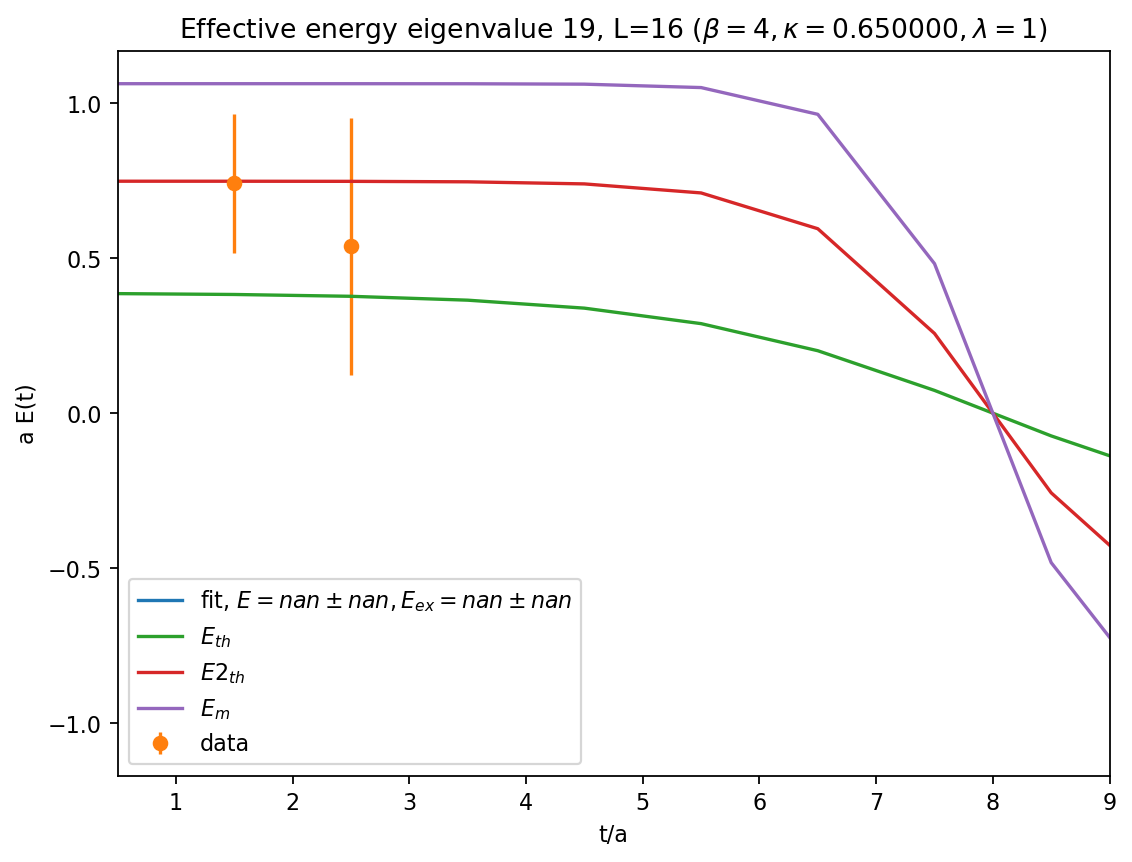

In [21]:
k_l=[0.55,0.65]
Nt_l= [8,16,24,32]
for Nt in [16]:
    for k in k_l:
        var_analysis_plot(k)

/hosts/nashome/vaf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:167: RuntimeWarning: invalid value encountered in log
/hosts/nashome/vaf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:203: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


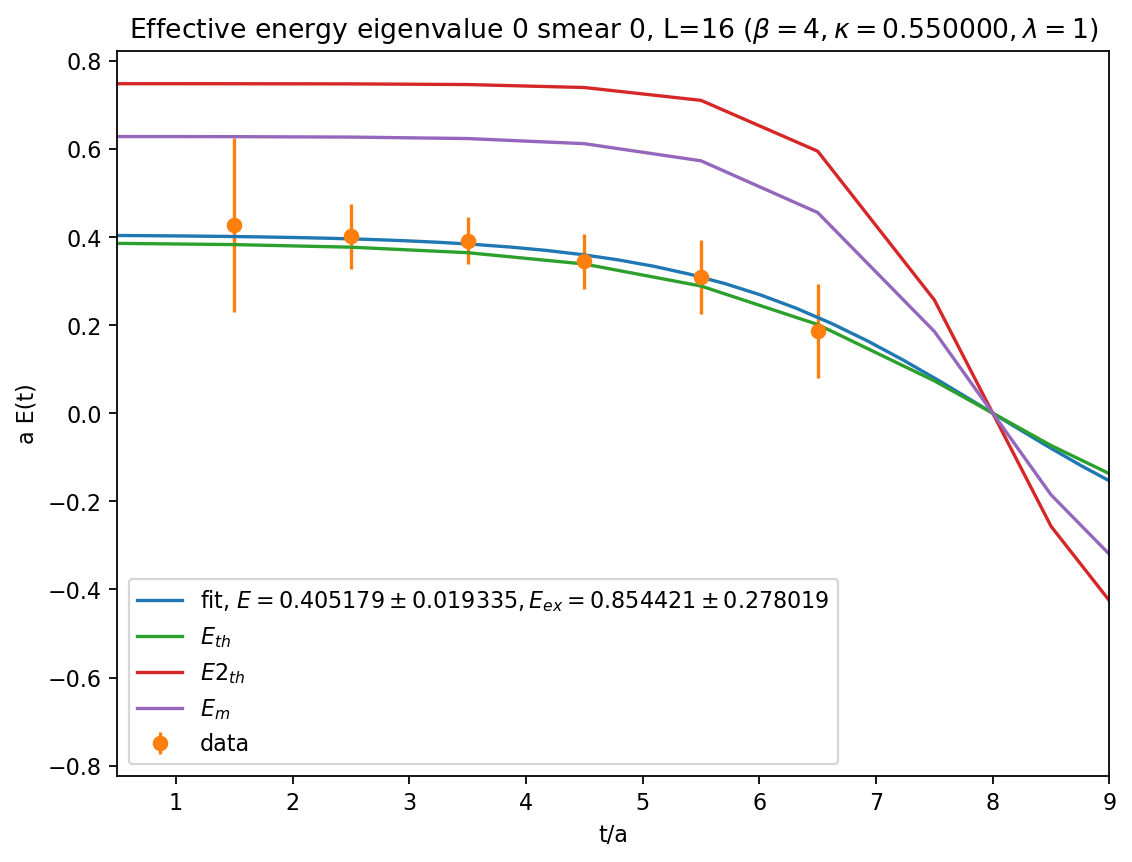

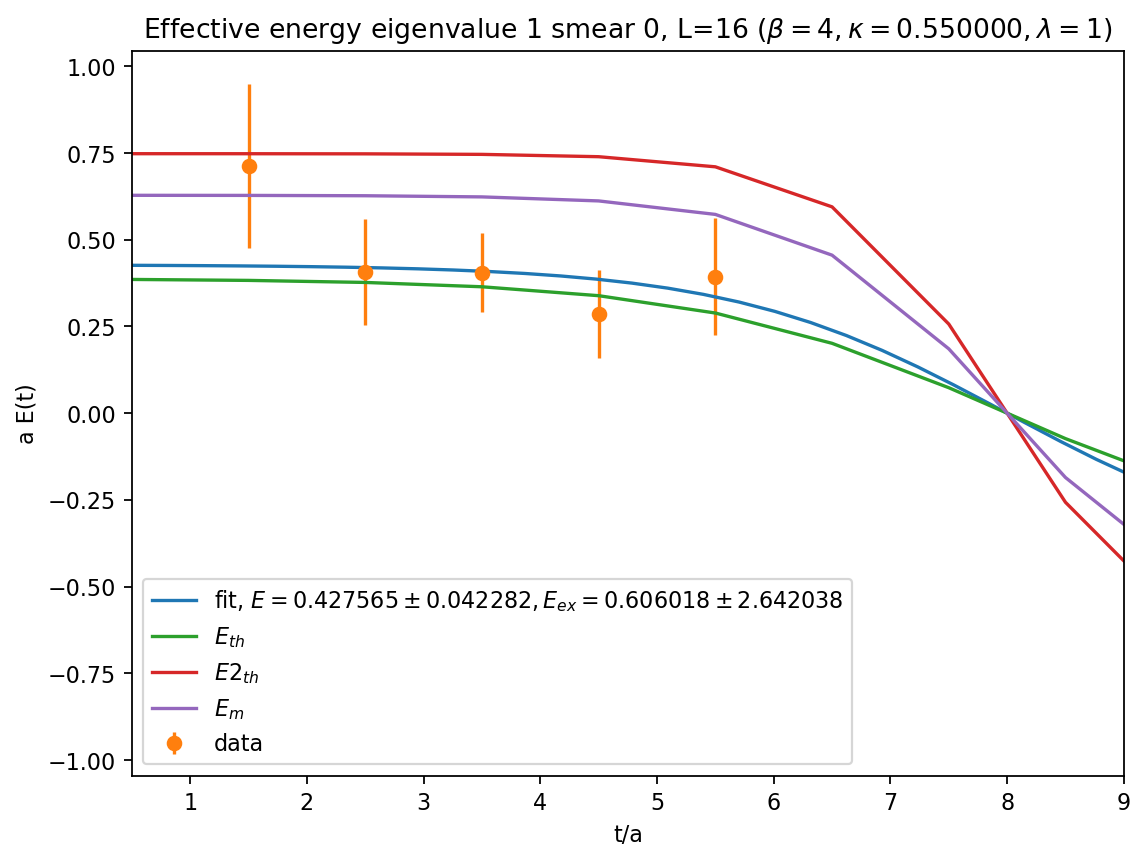

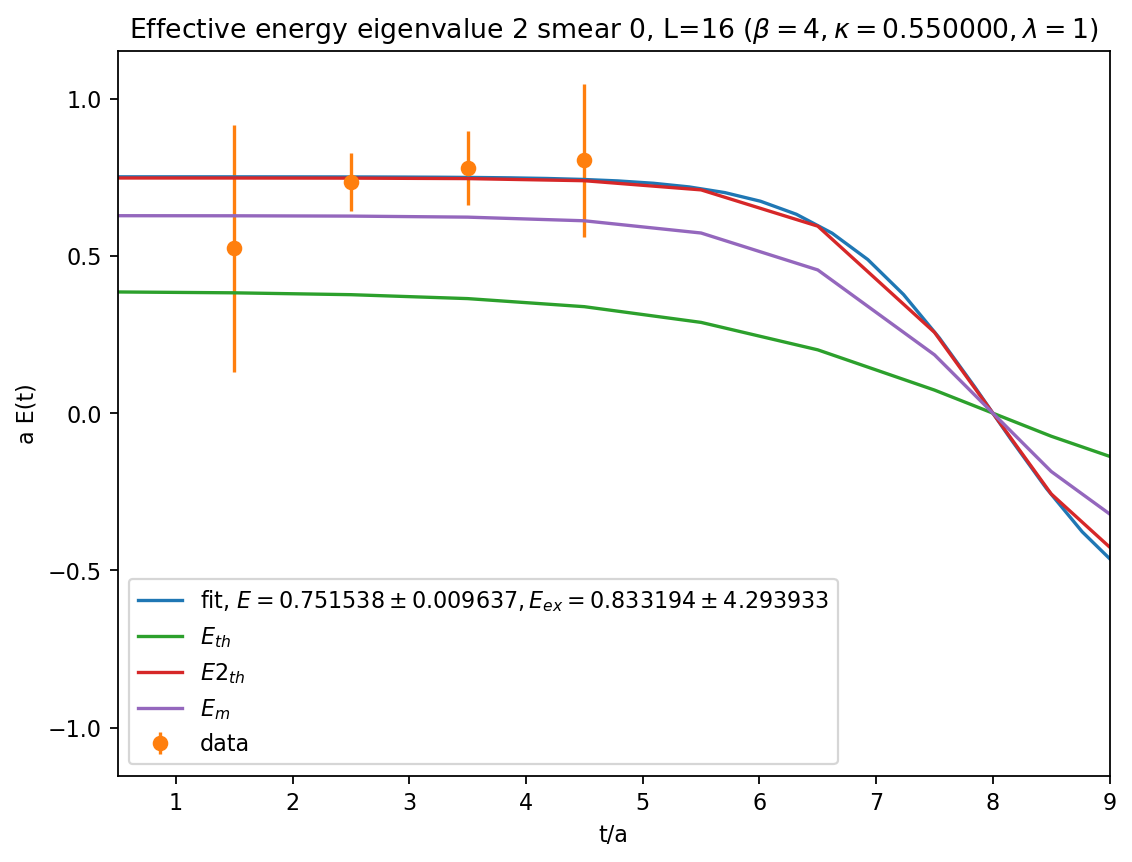

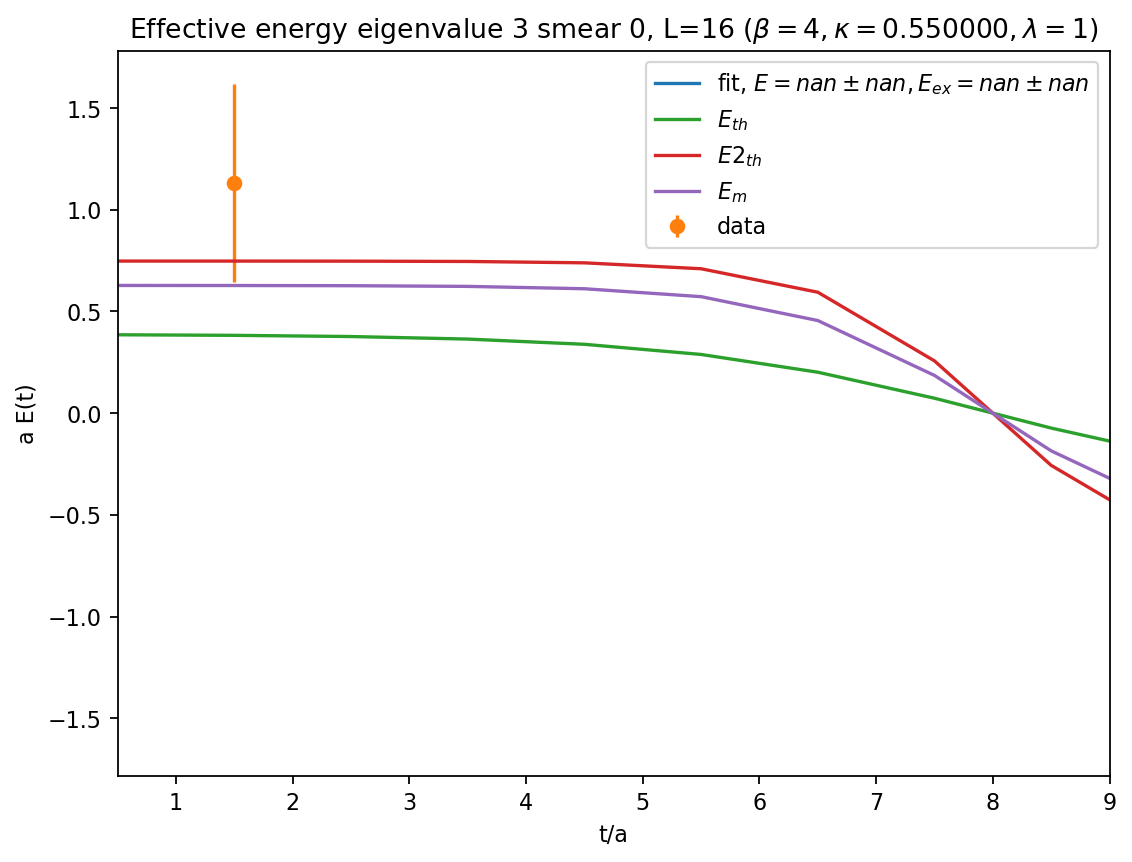

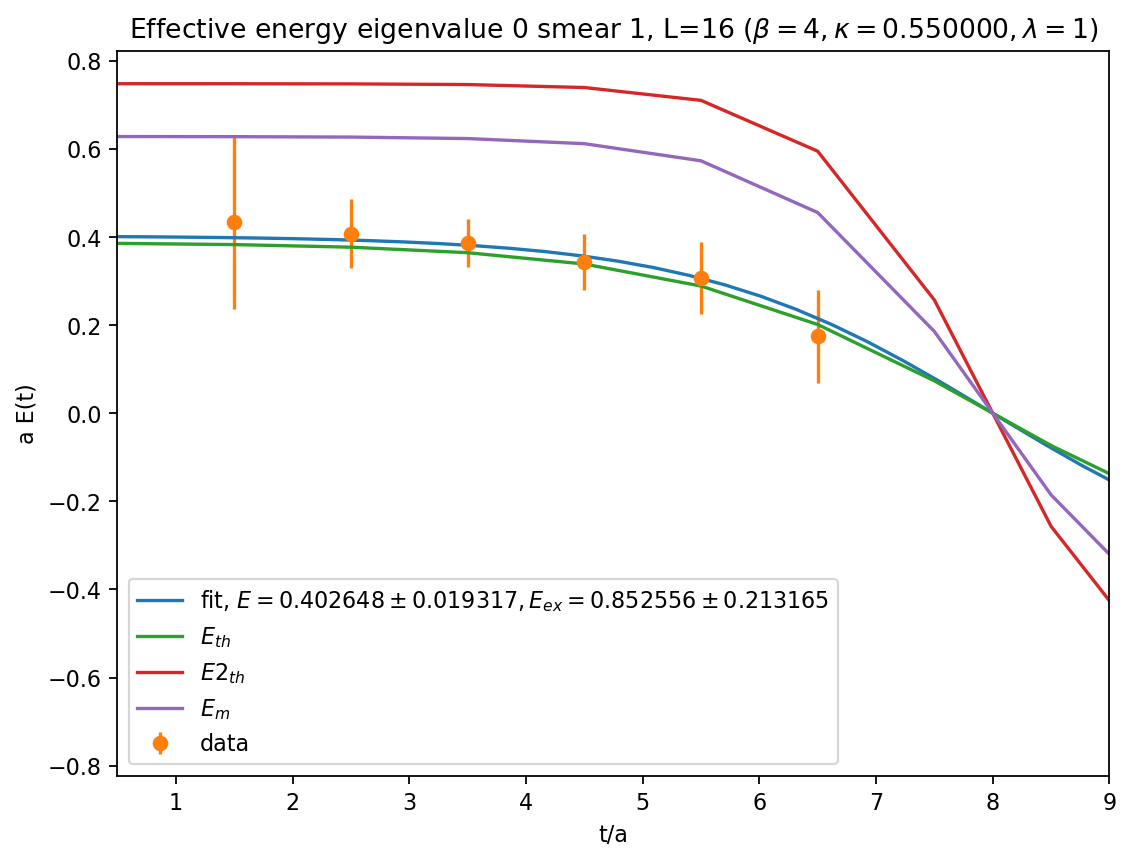

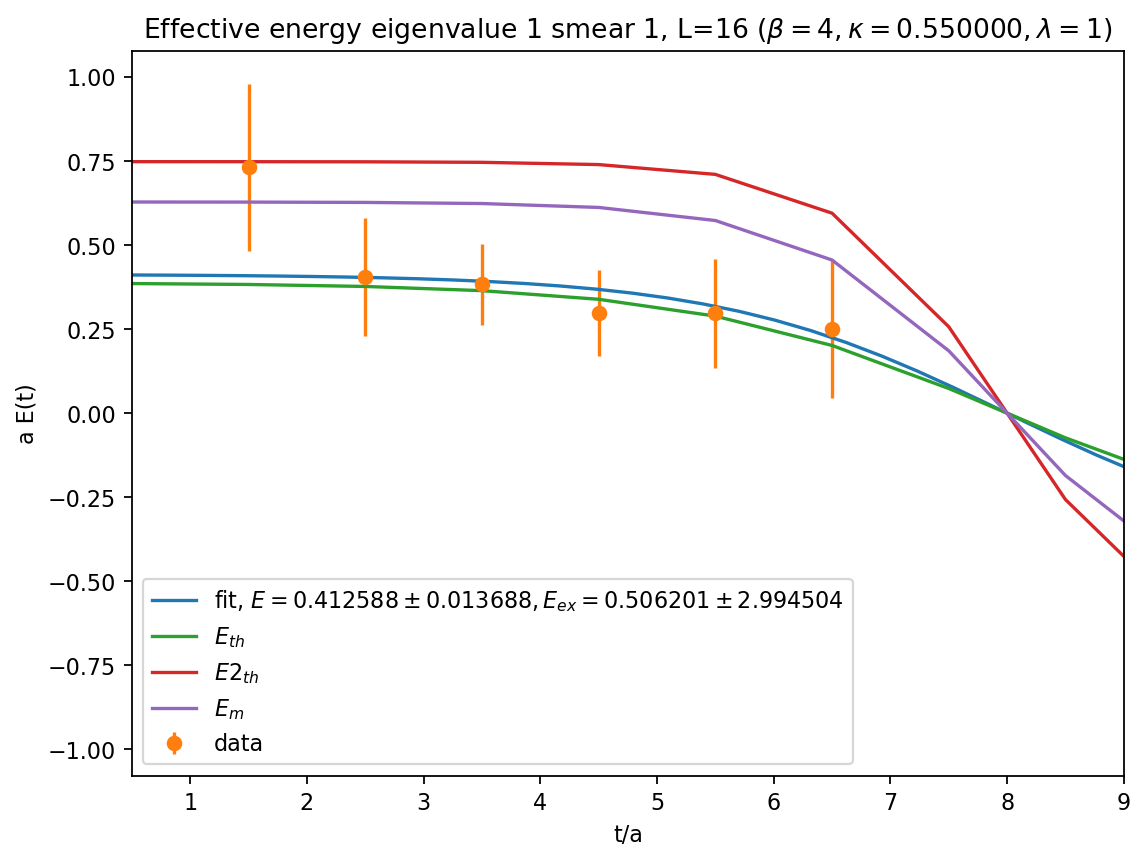

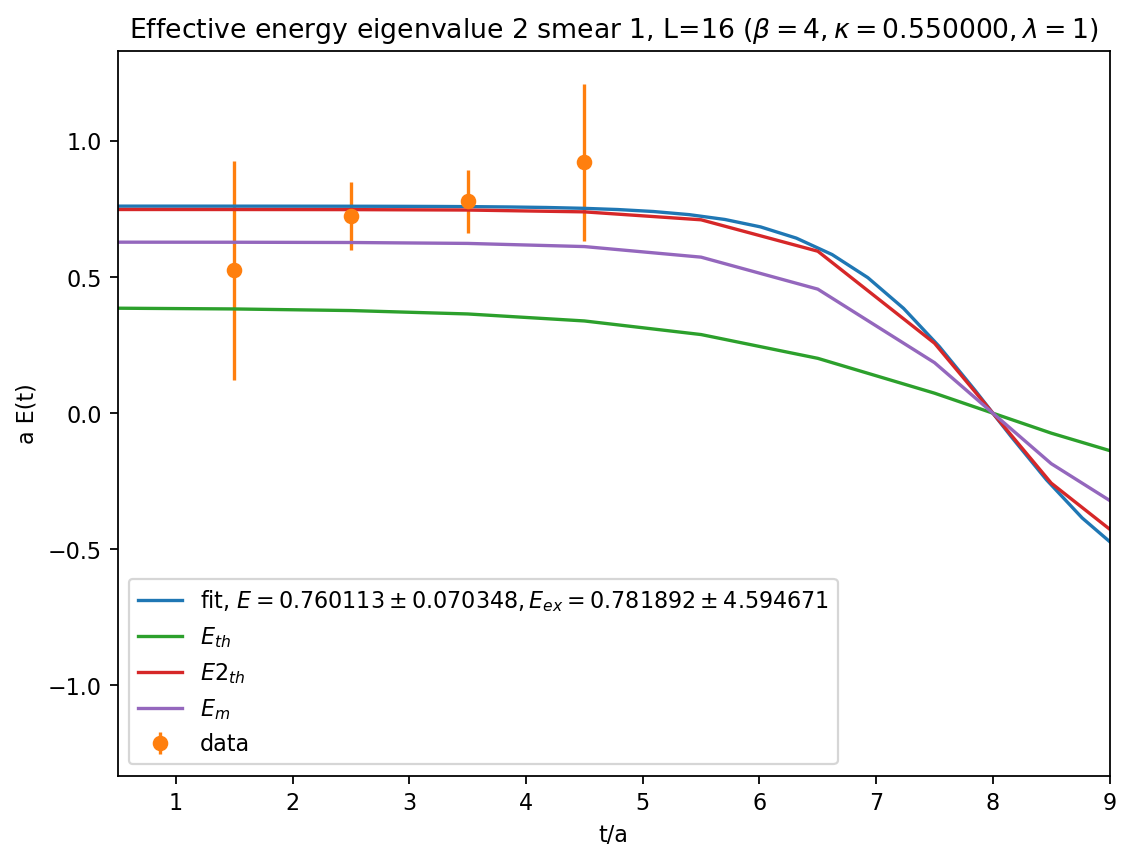

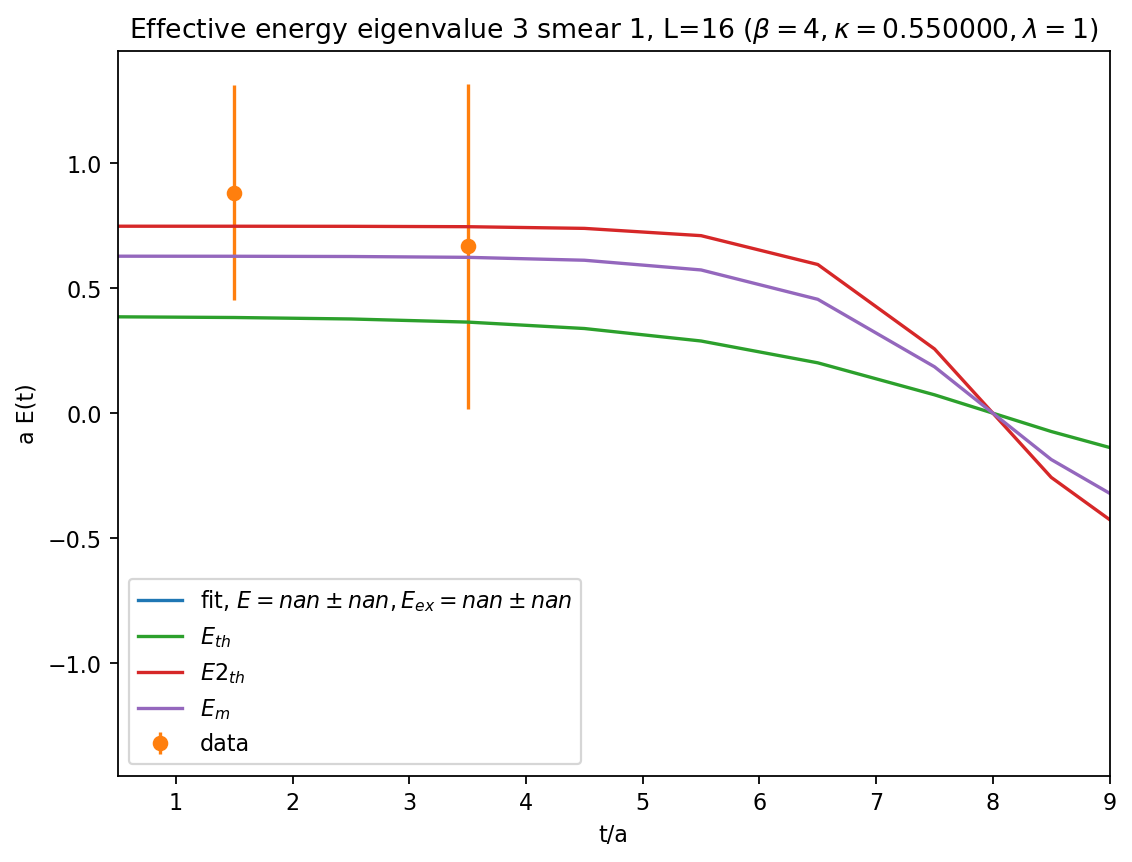

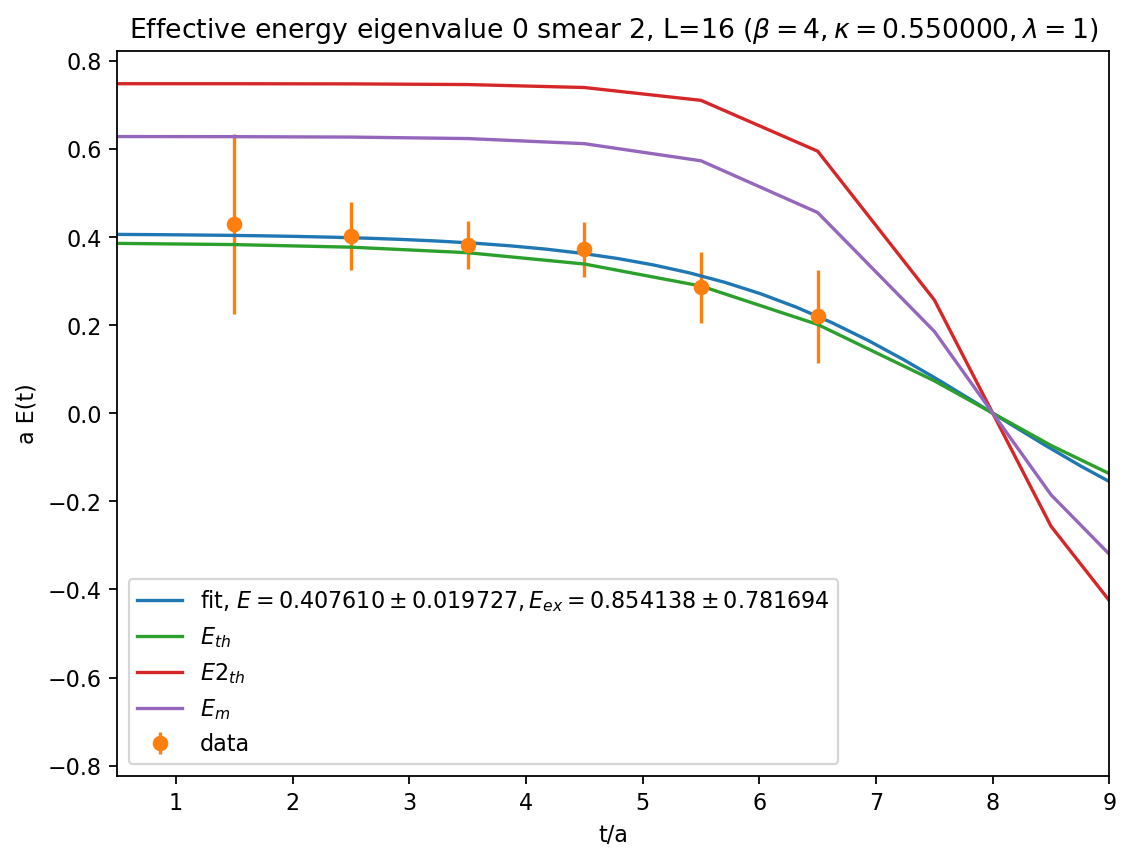

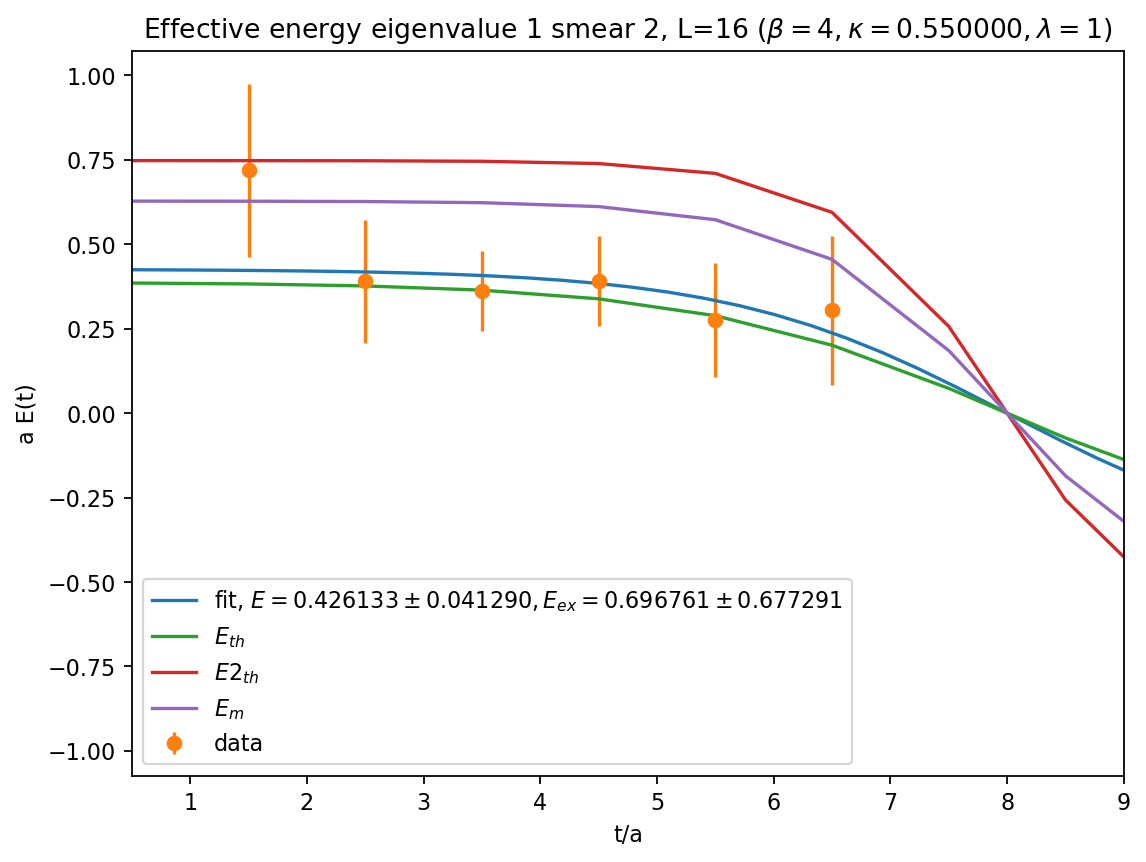

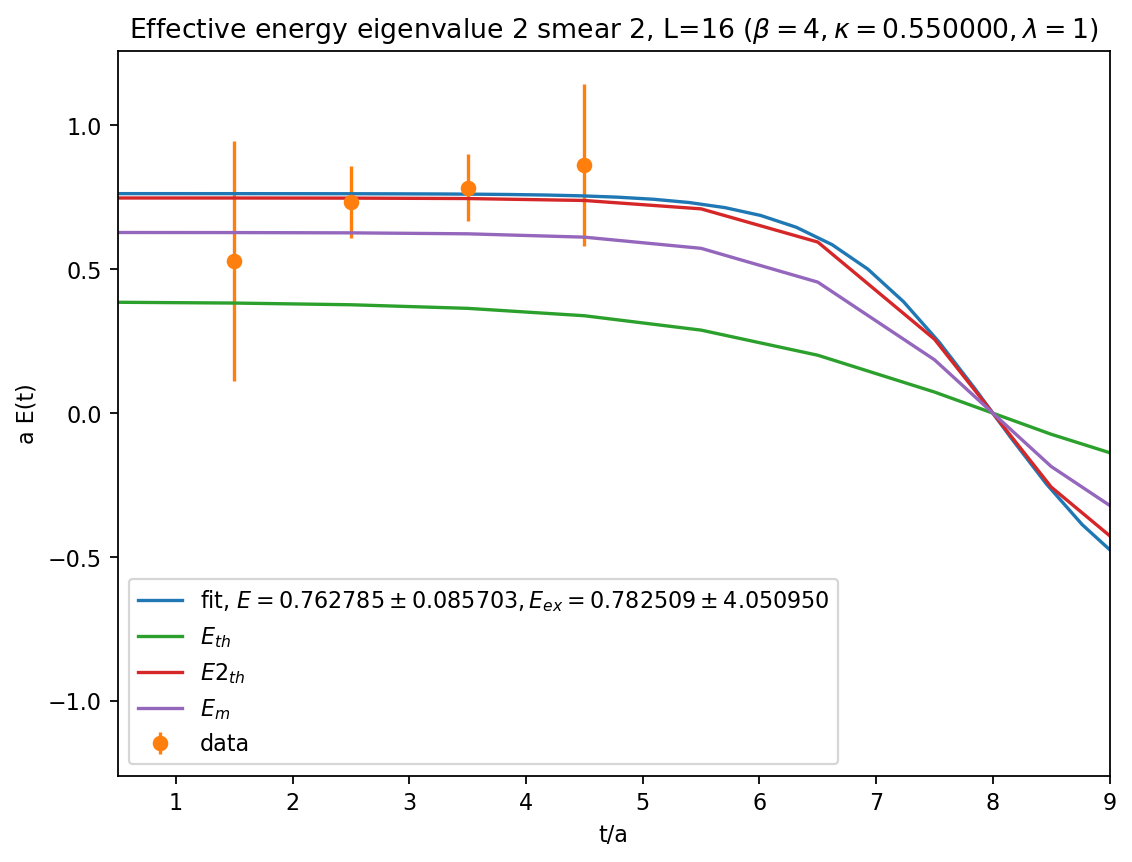

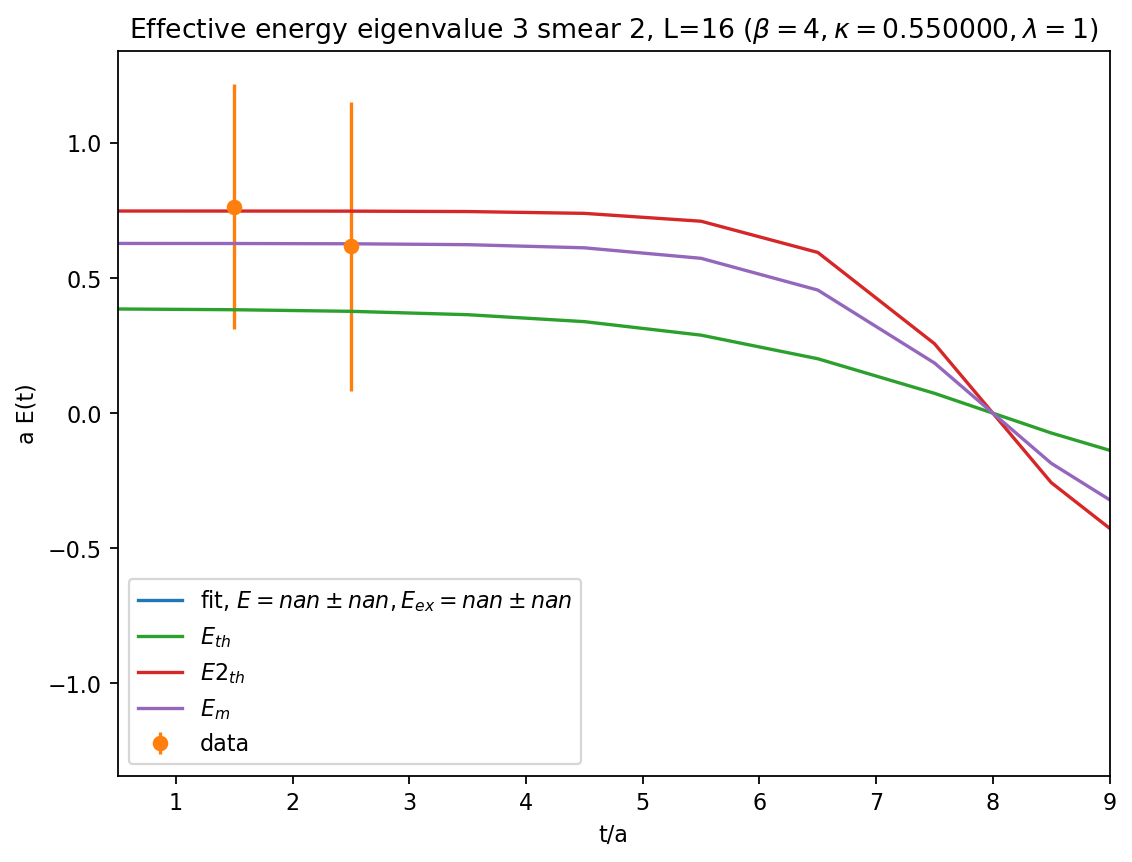

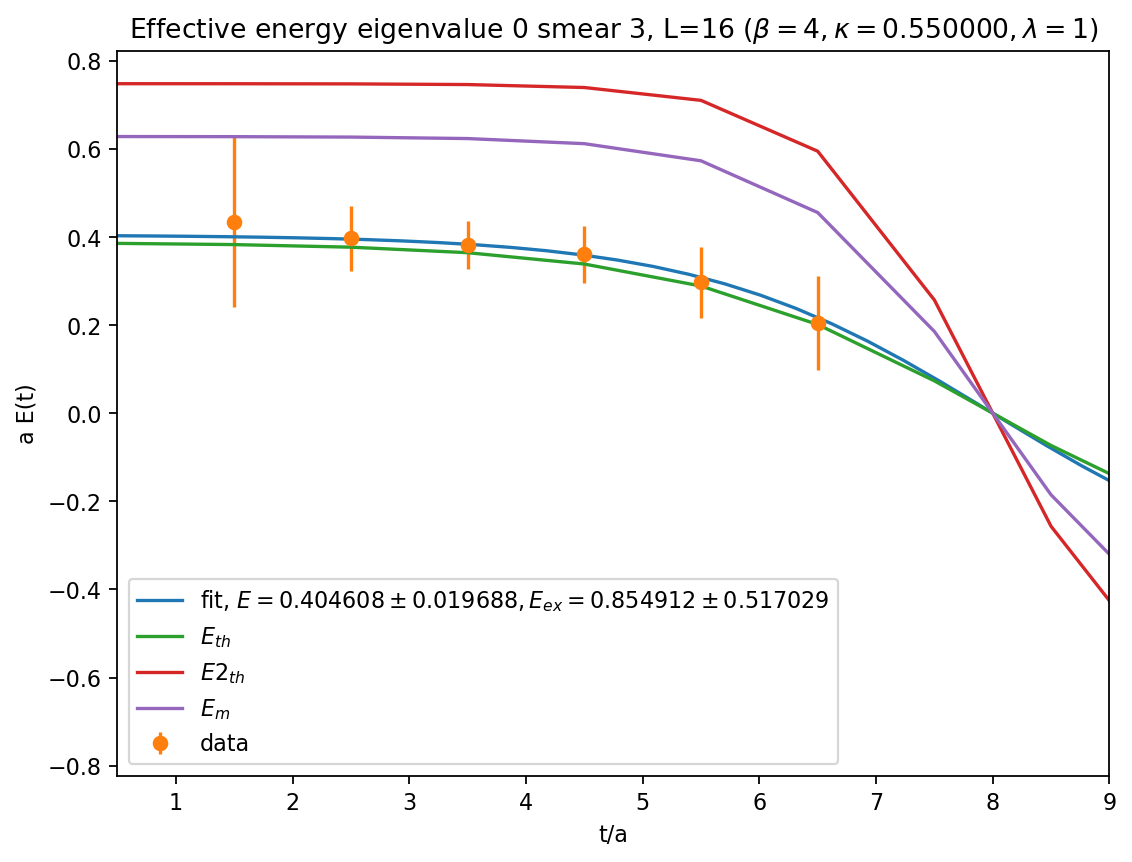

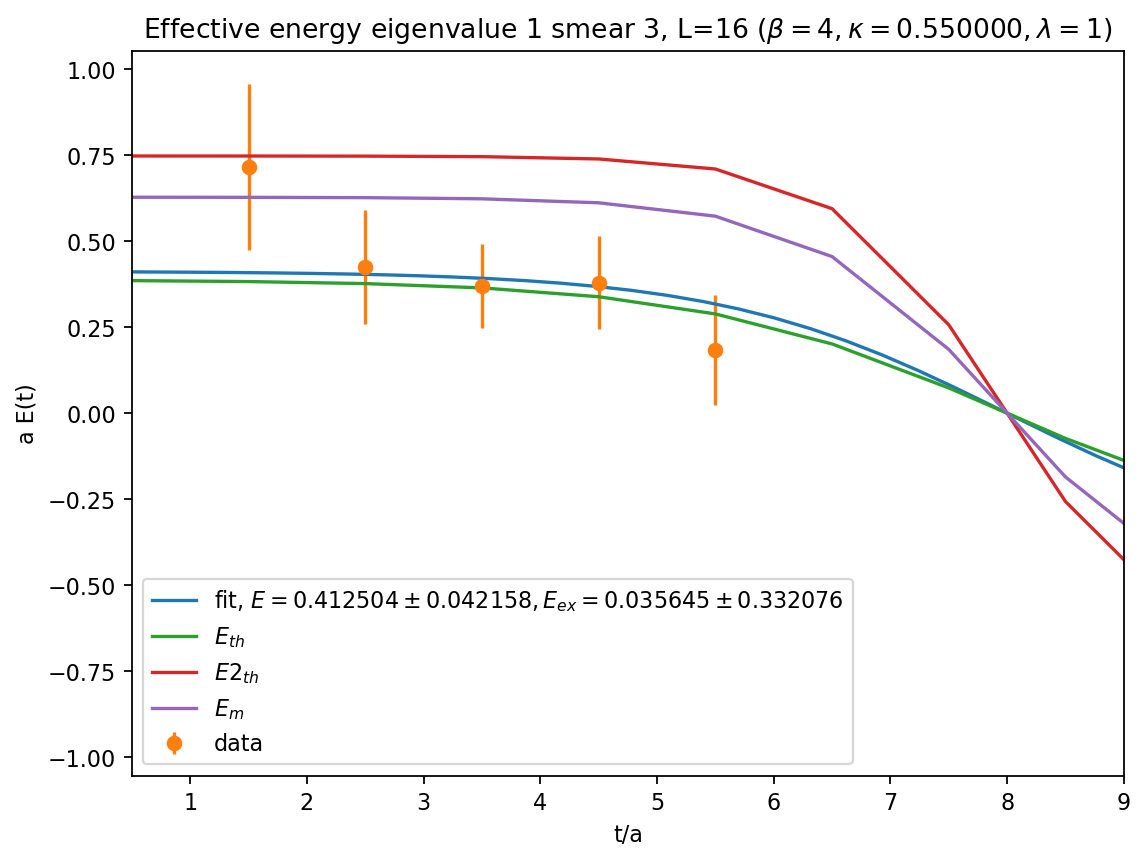

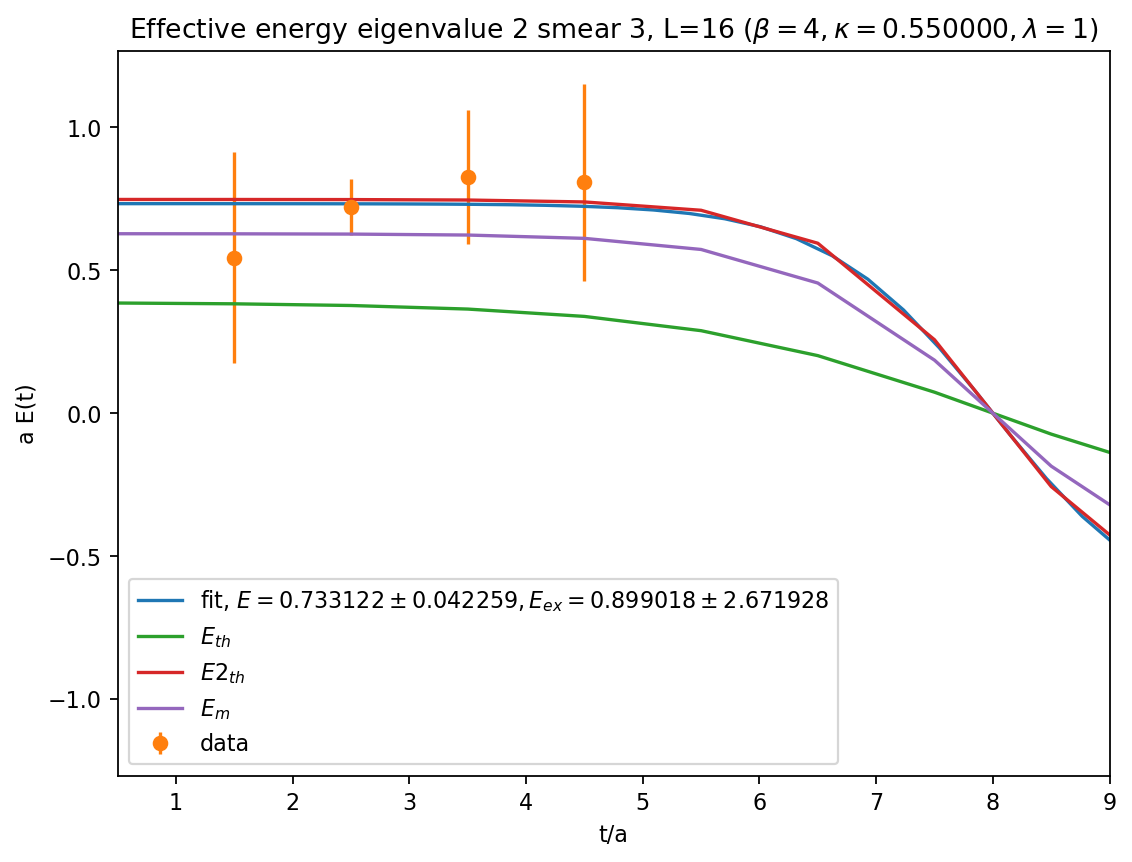

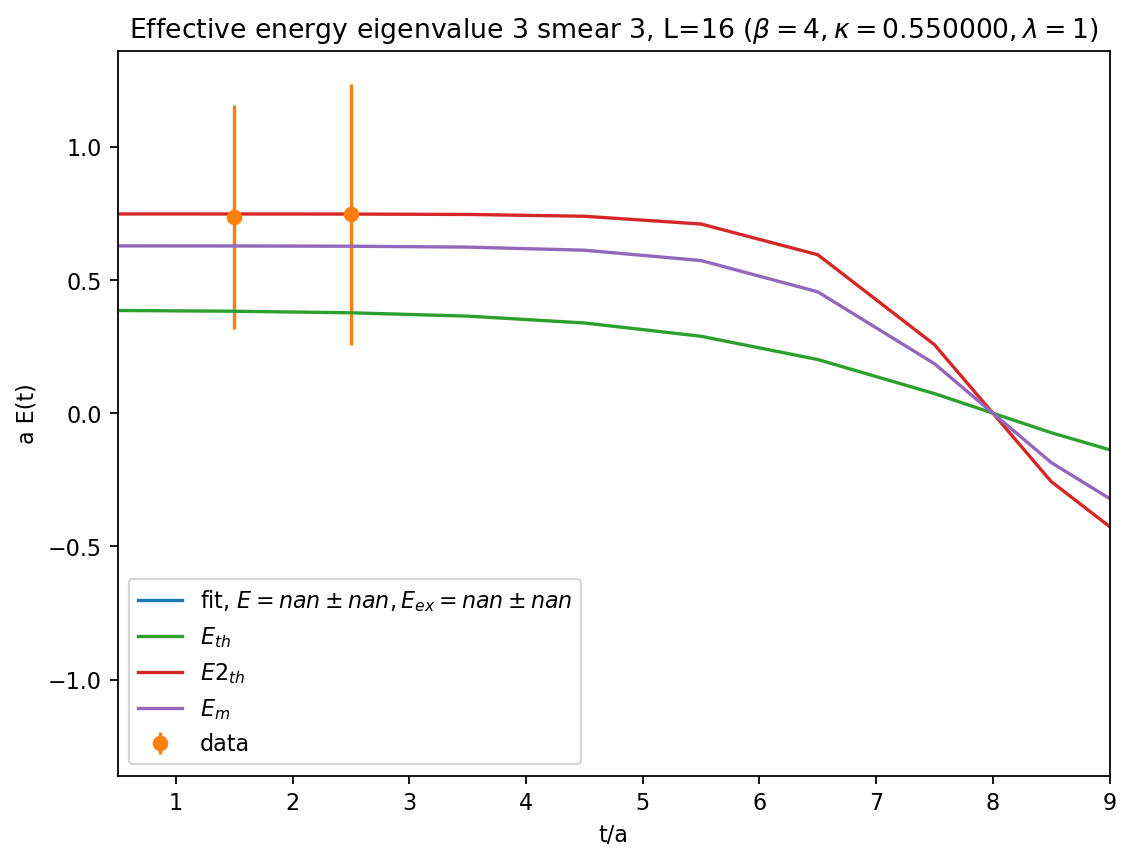

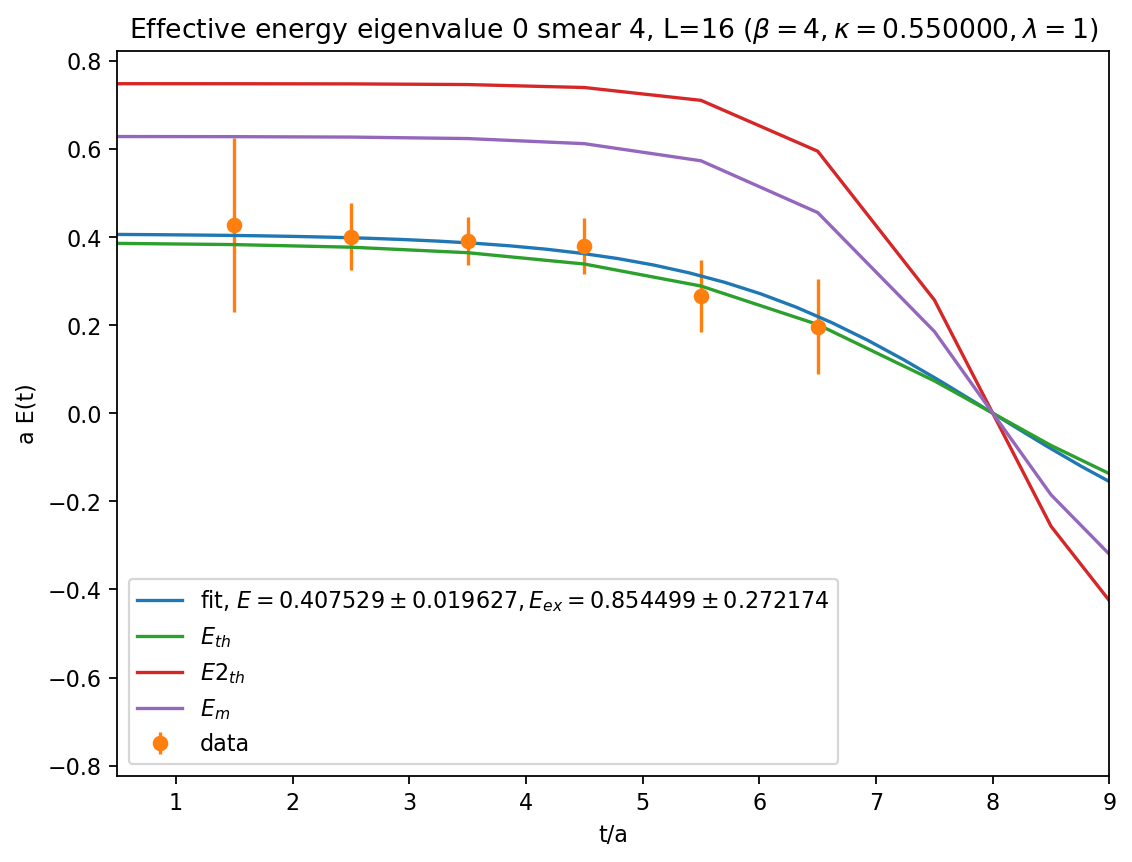

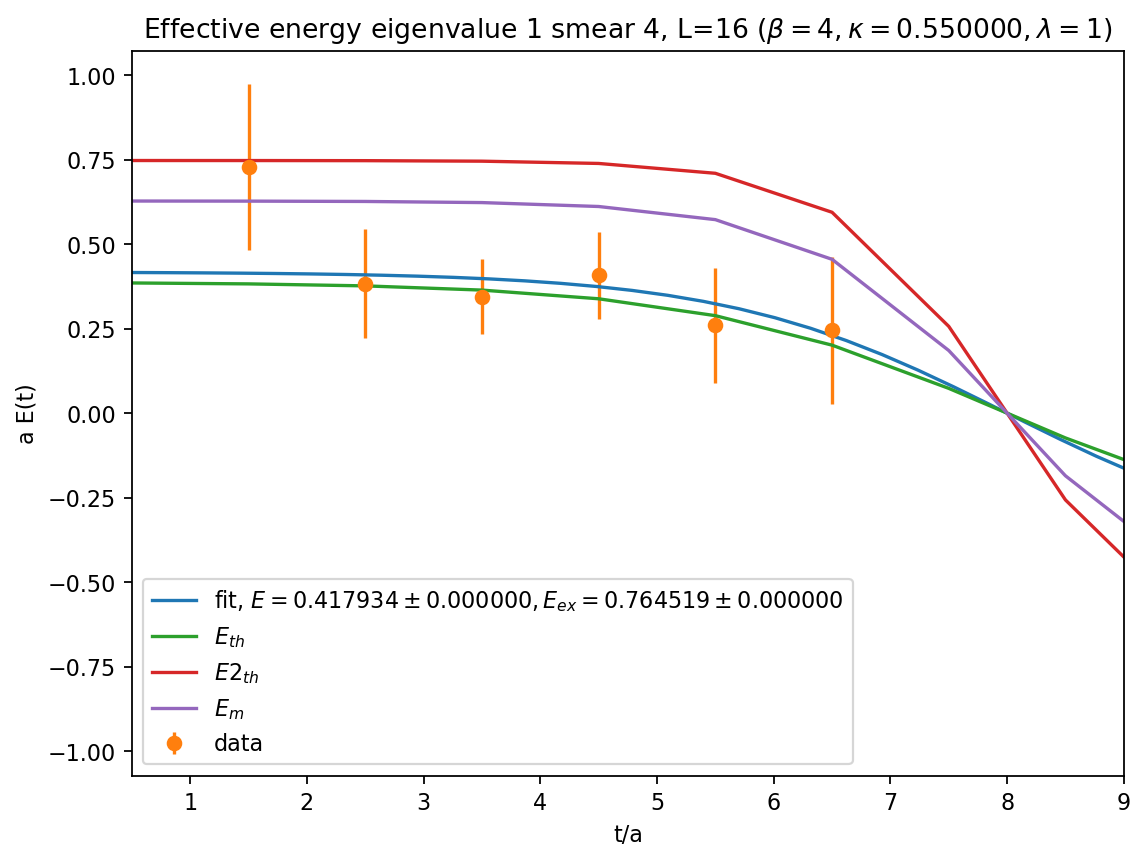

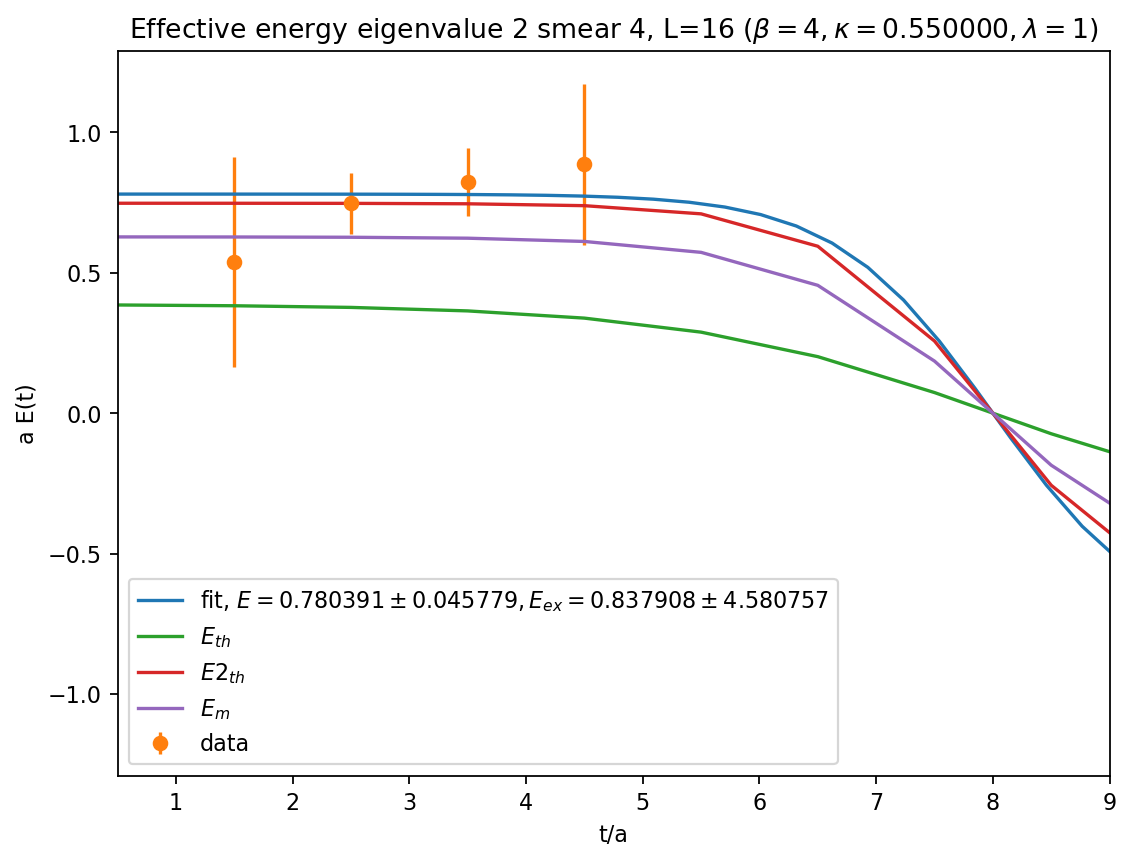

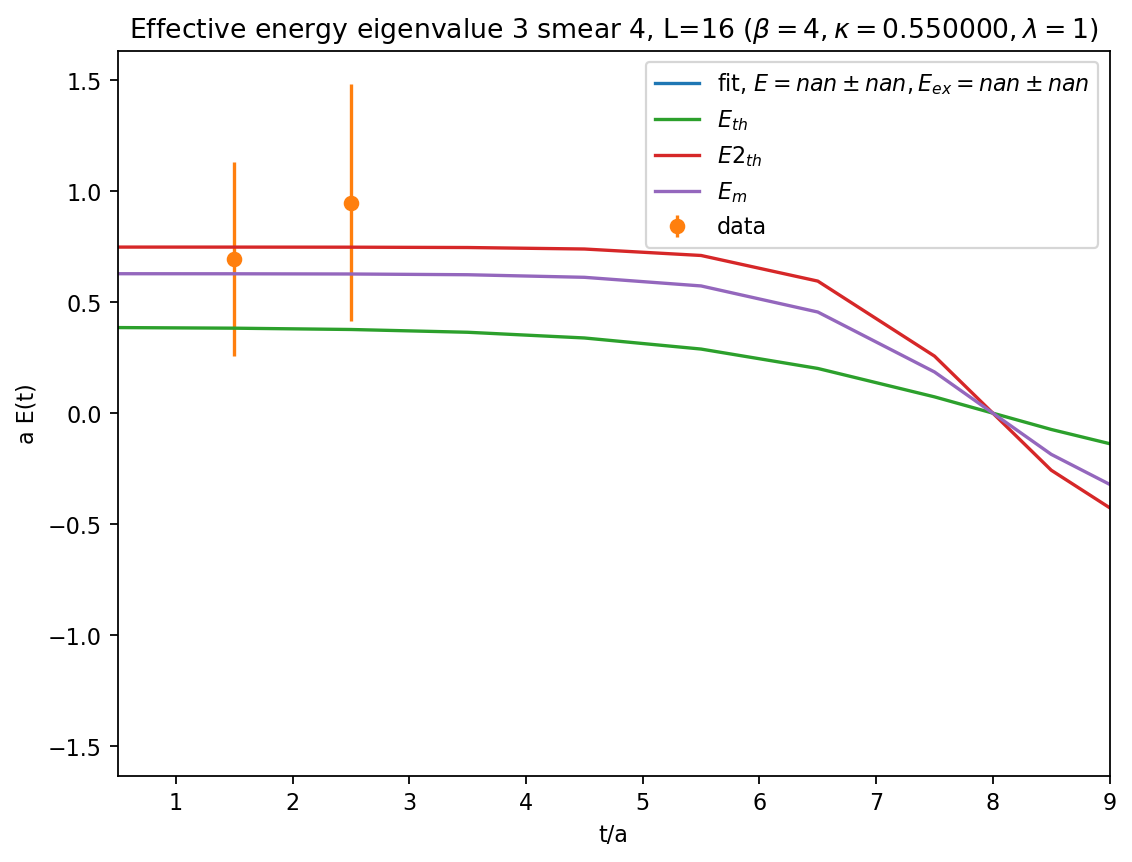

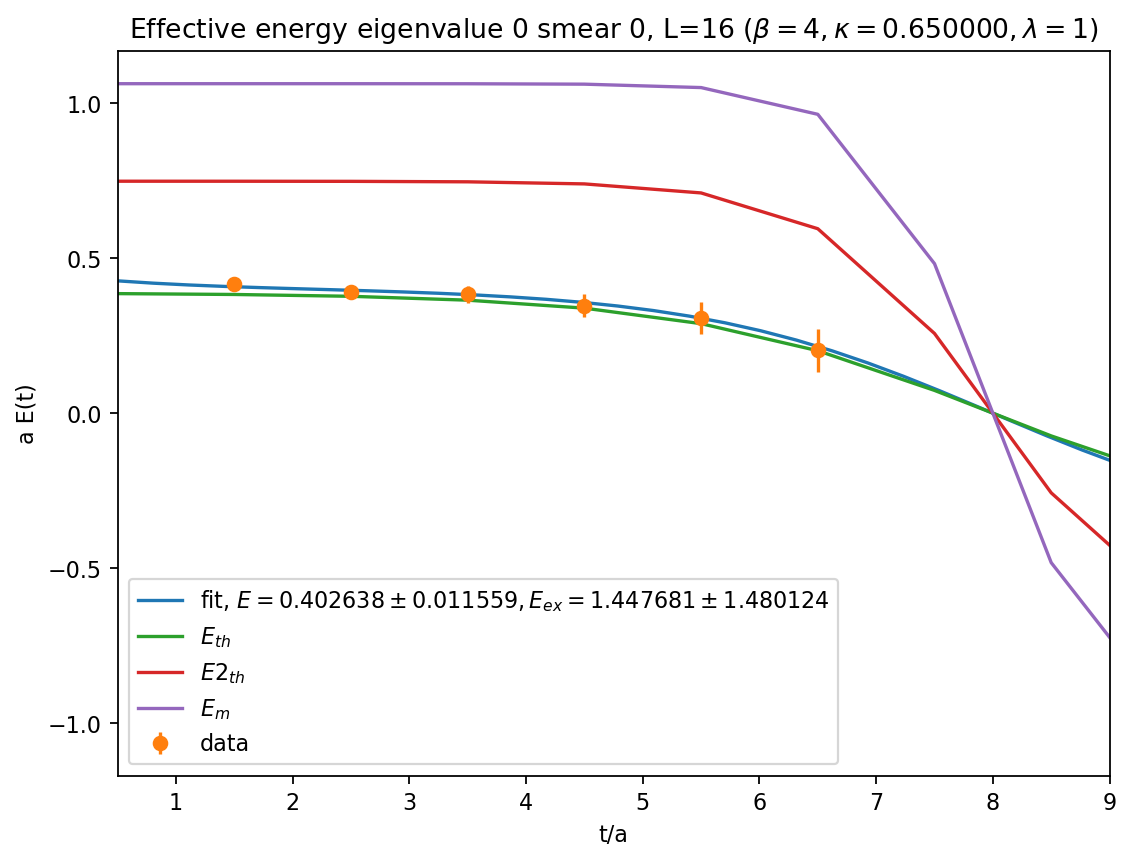

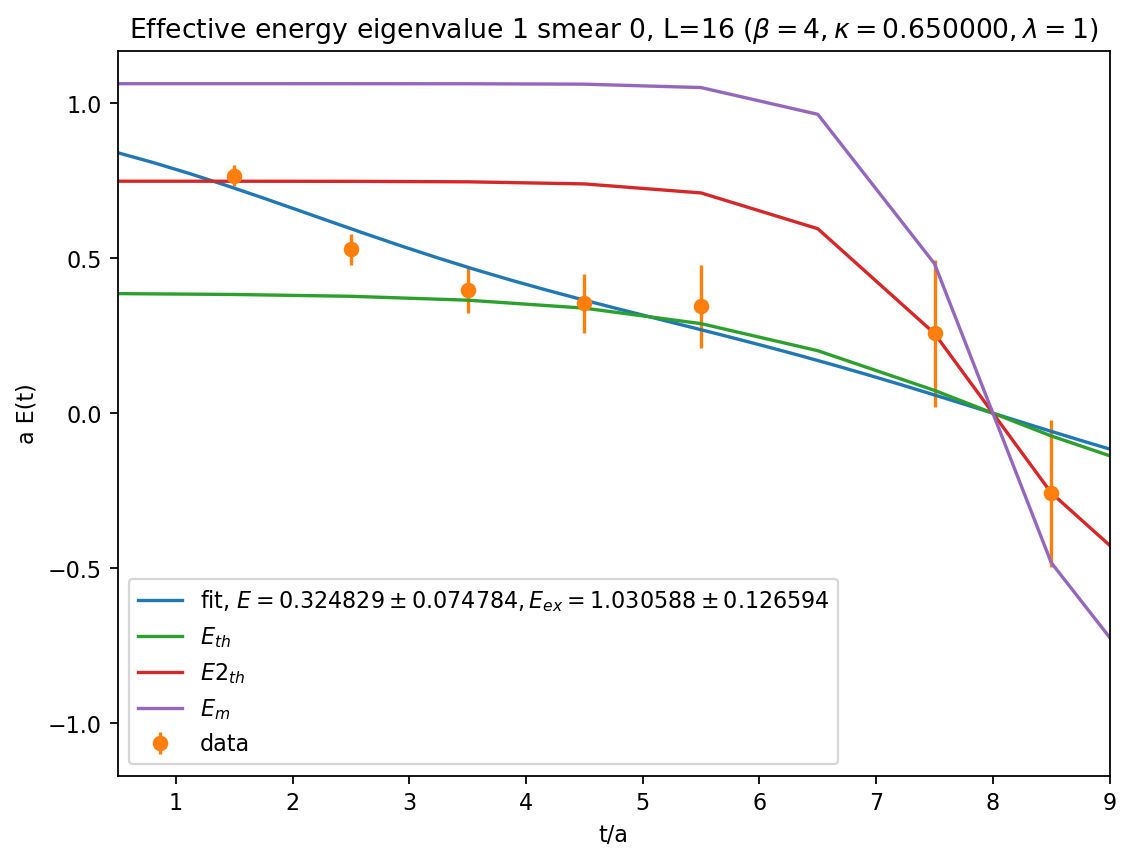

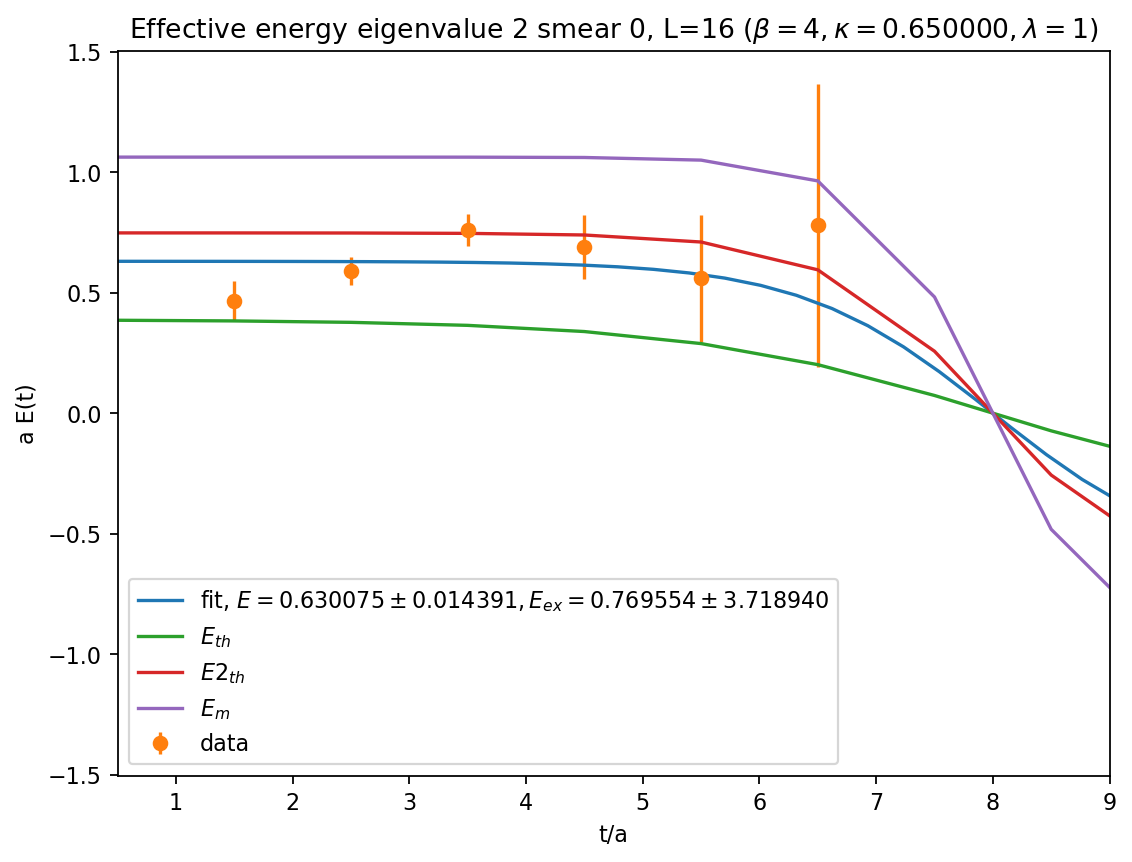

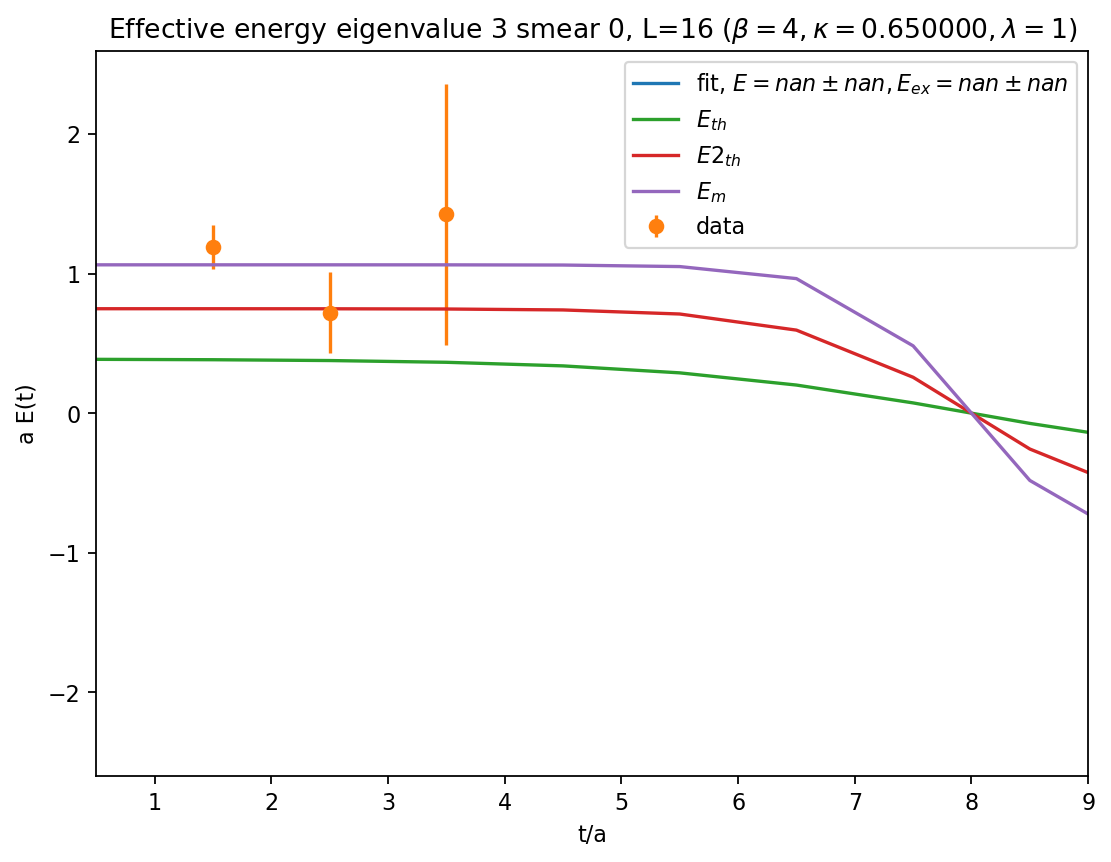

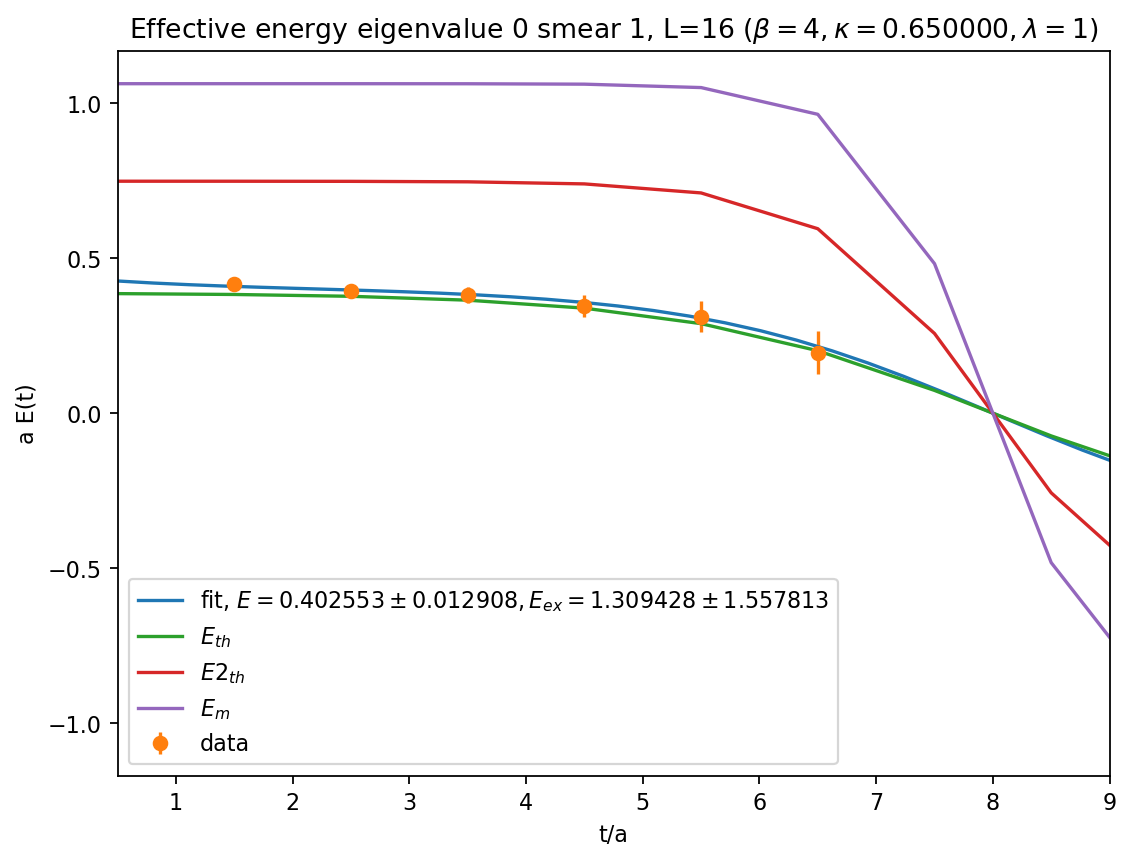

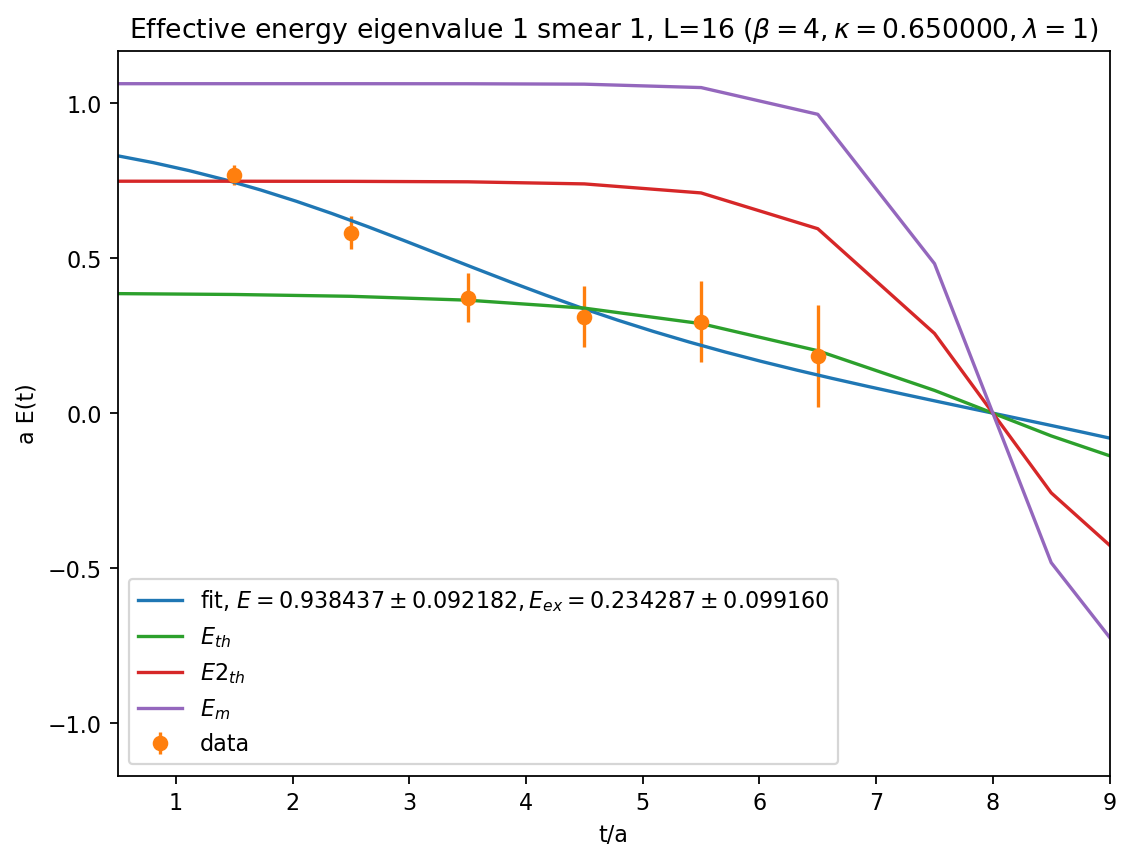

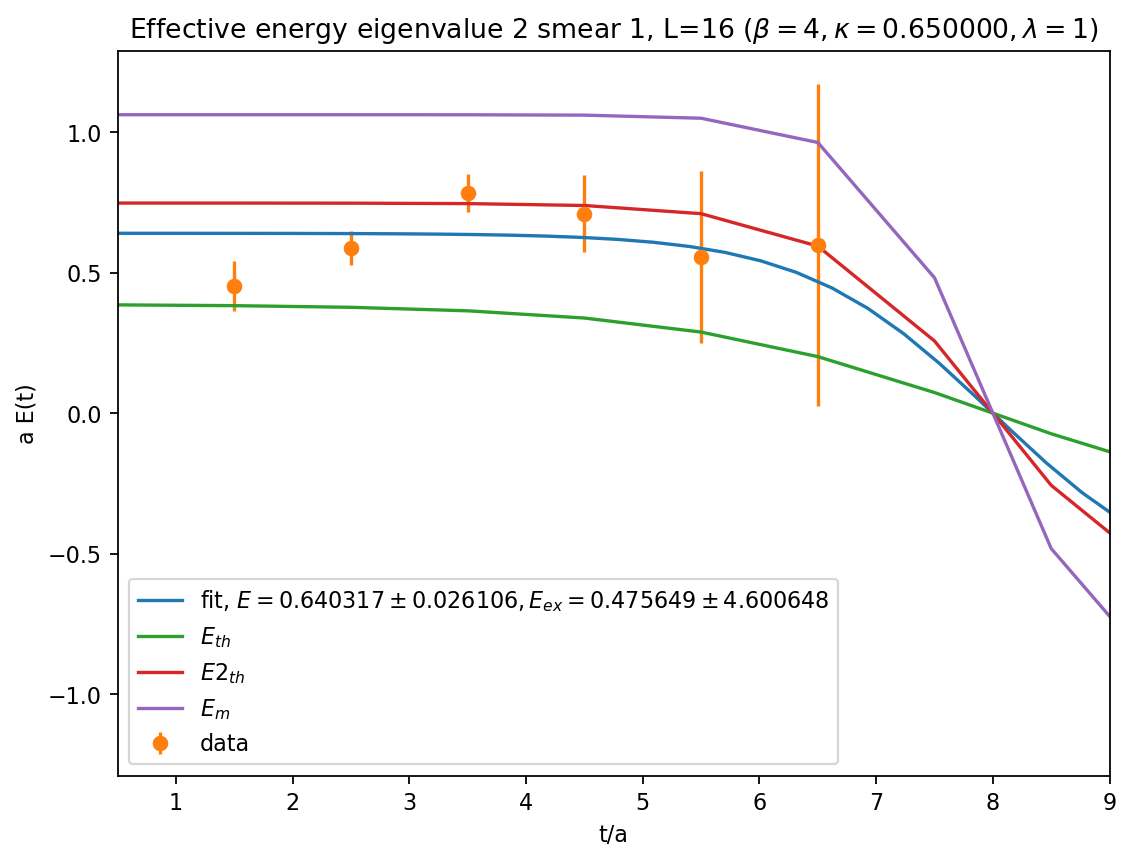

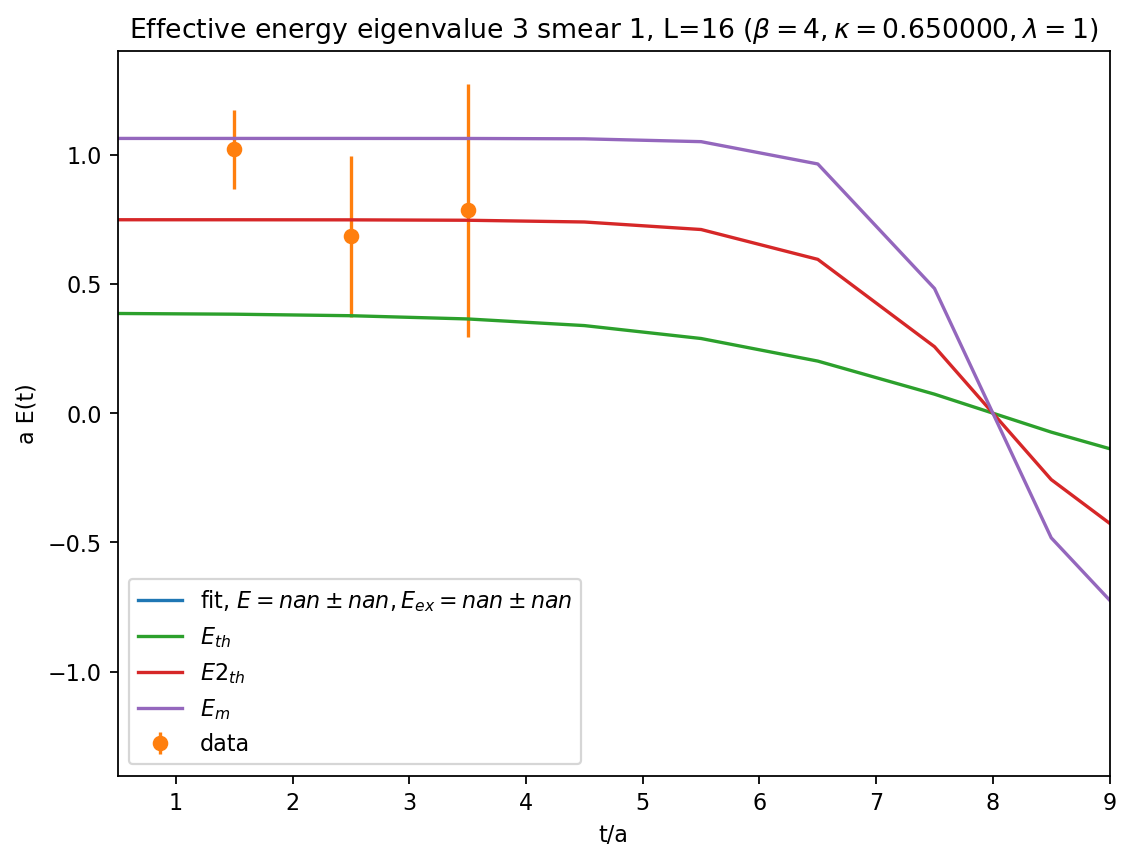

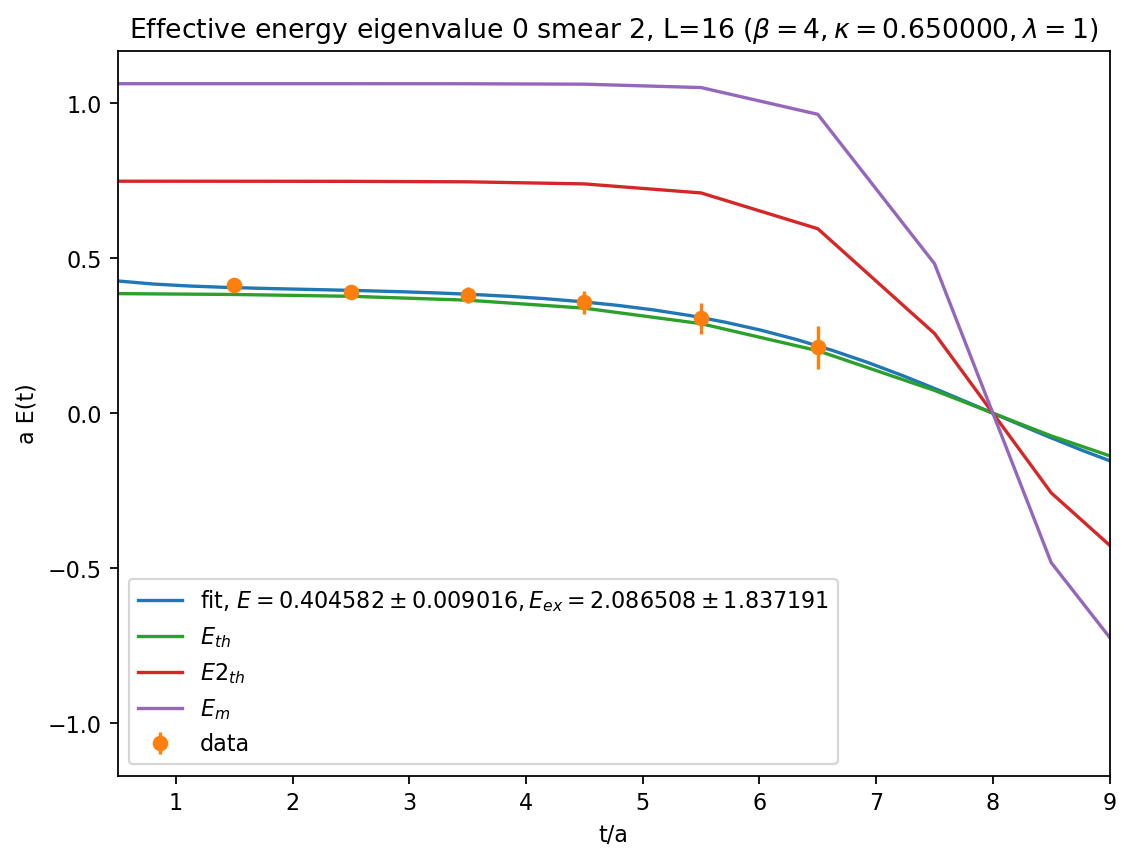

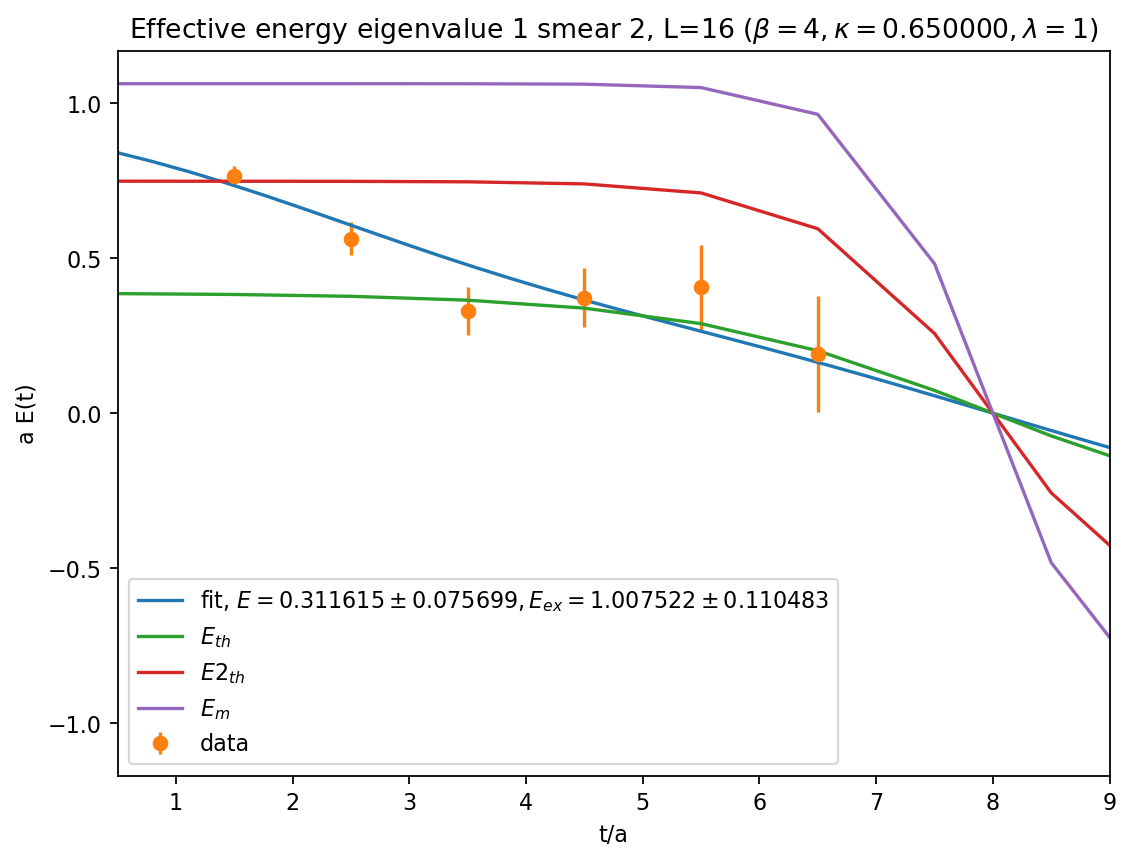

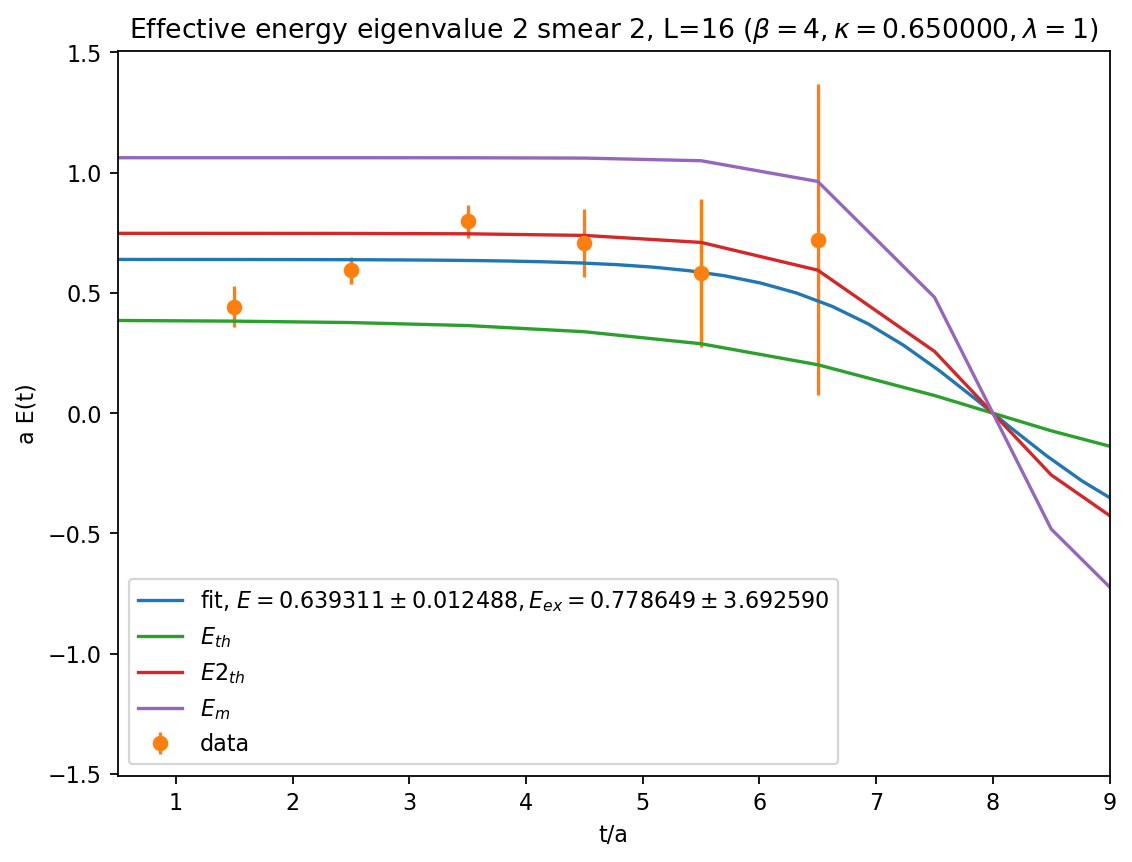

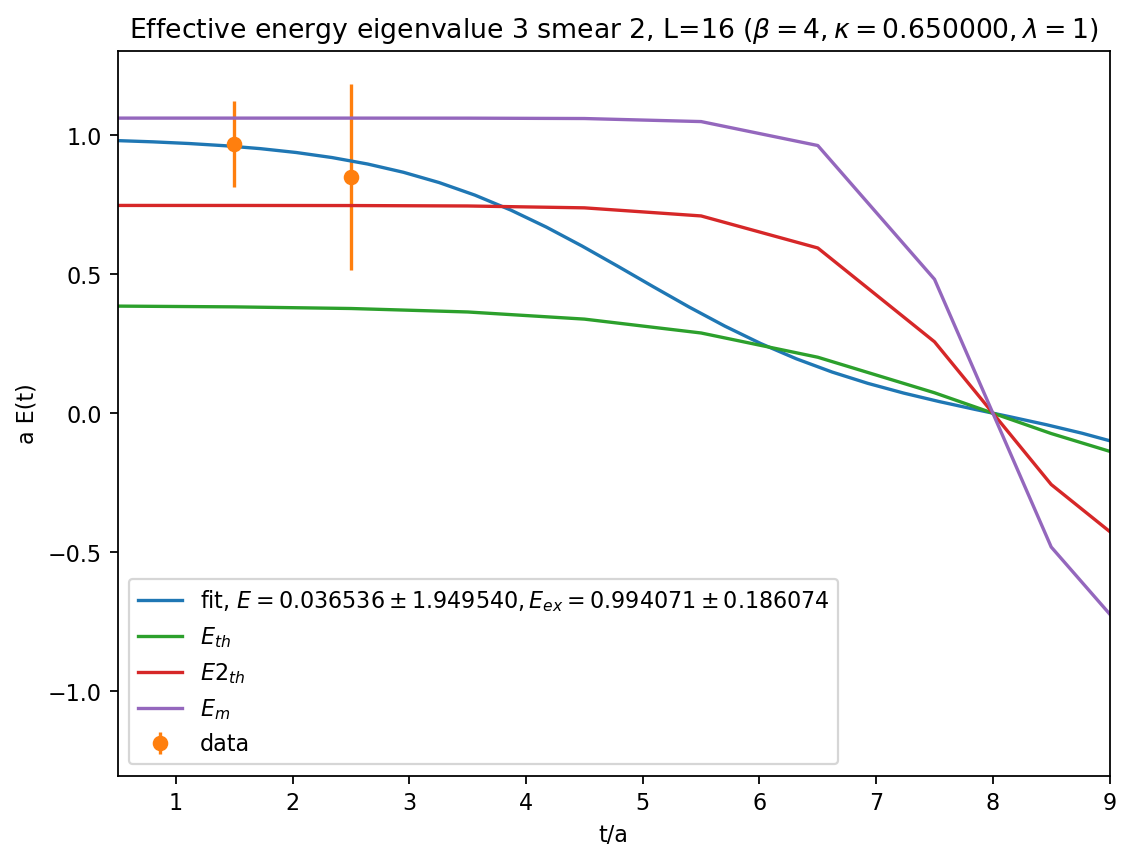

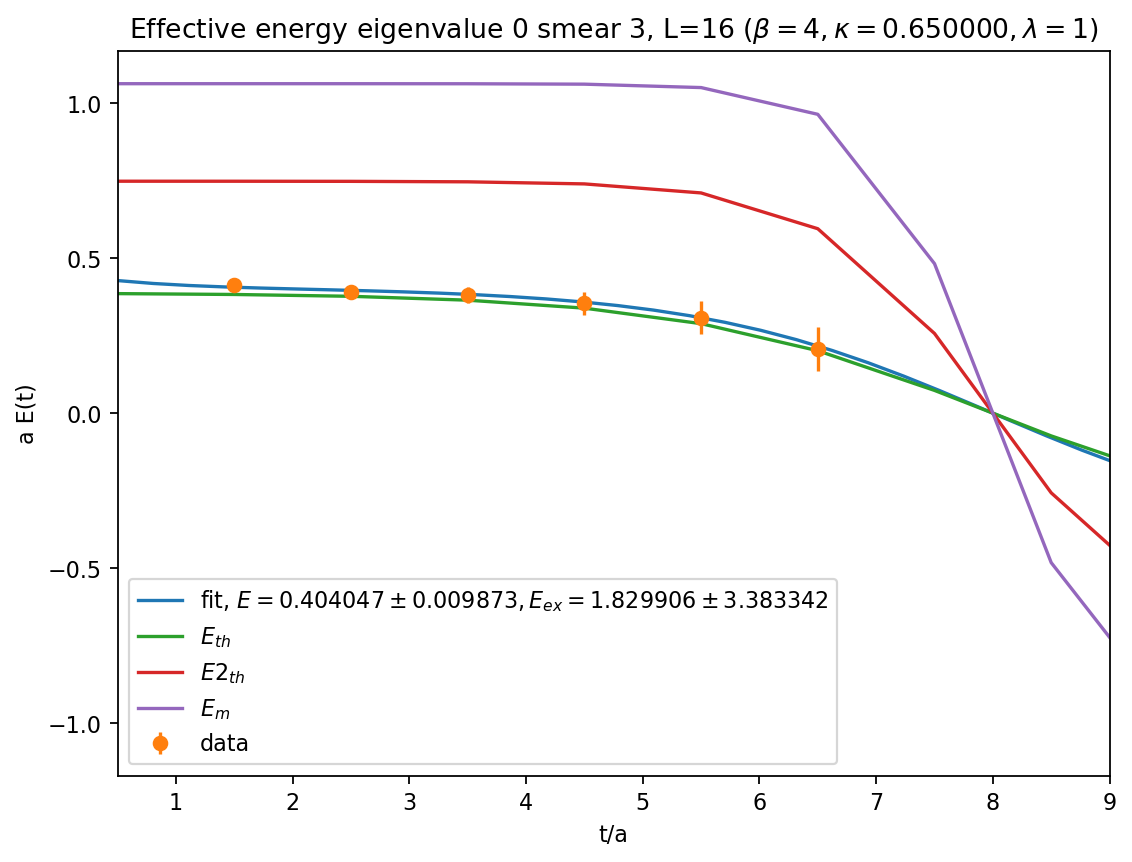

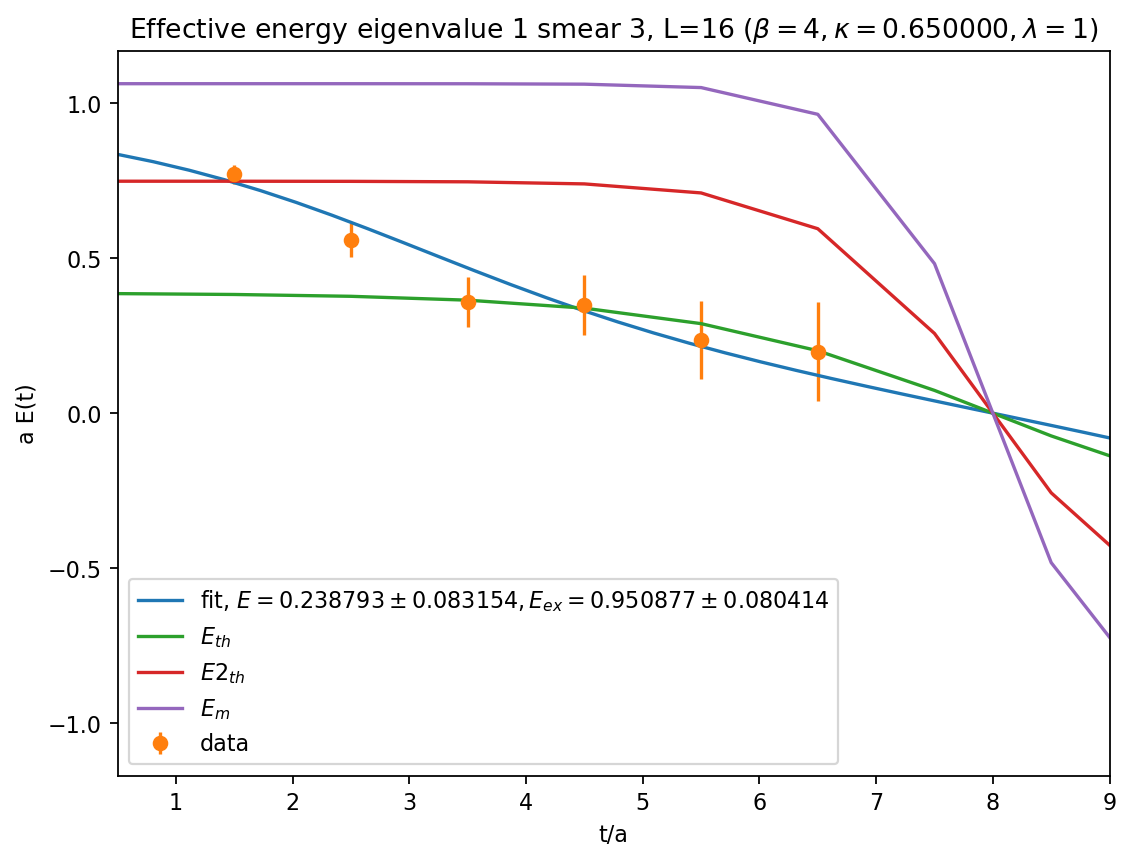

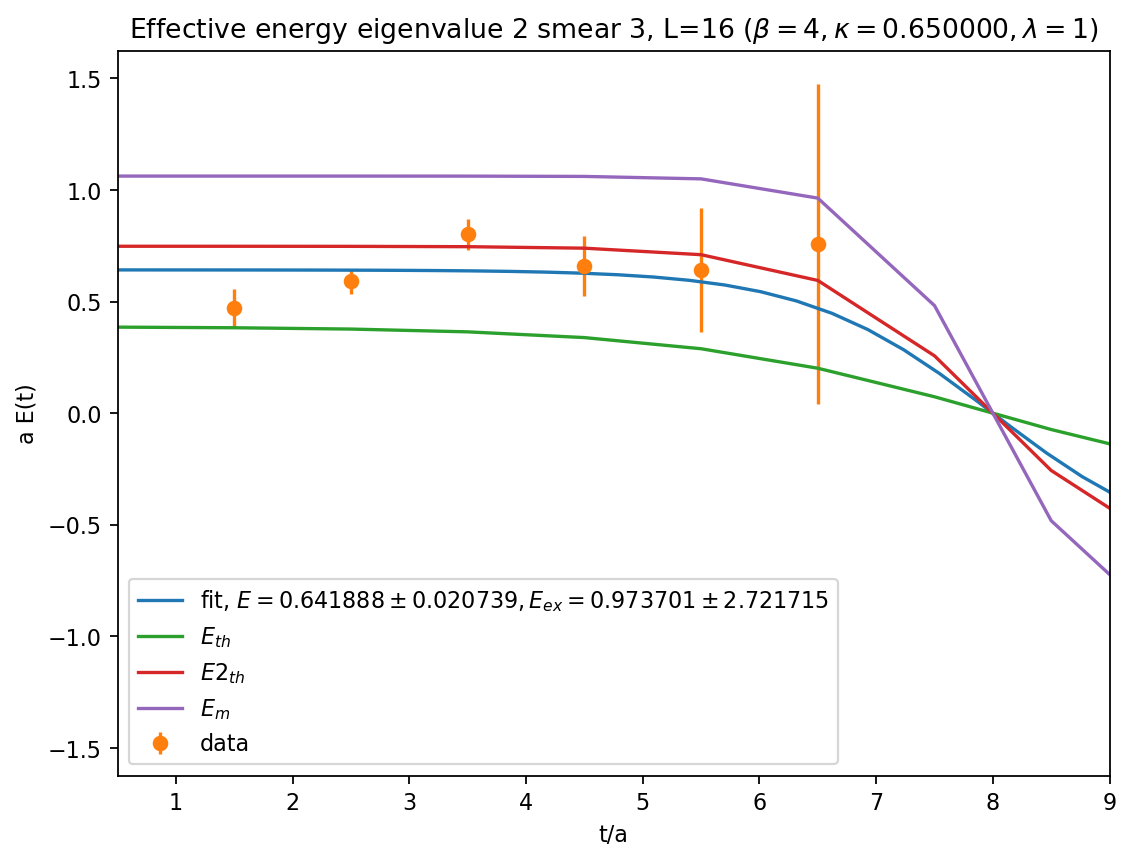

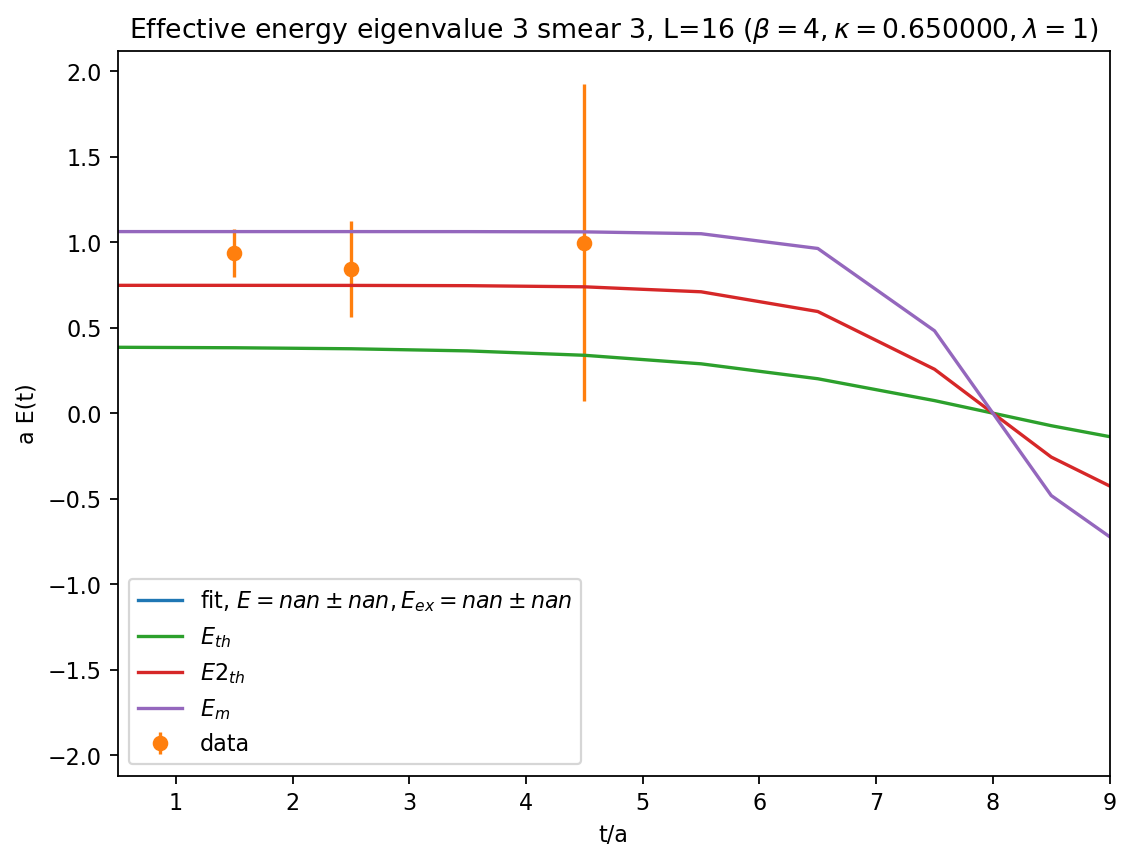

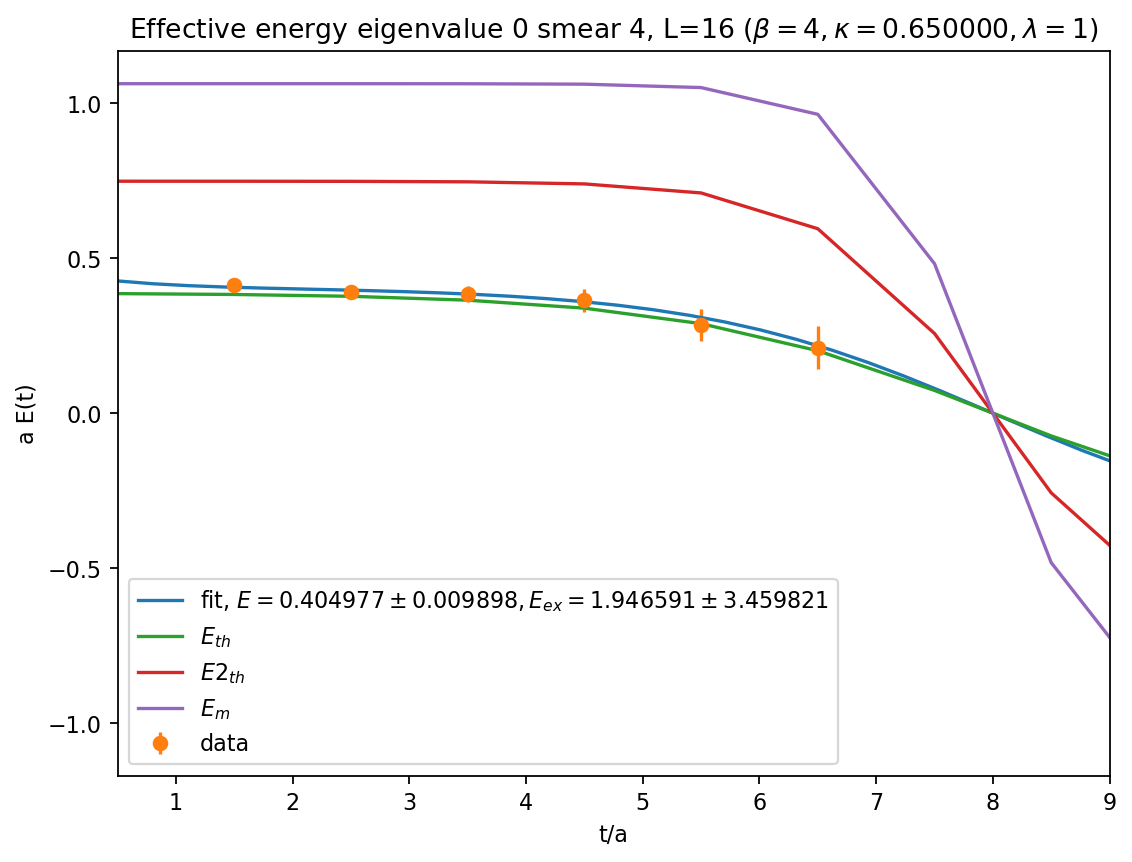

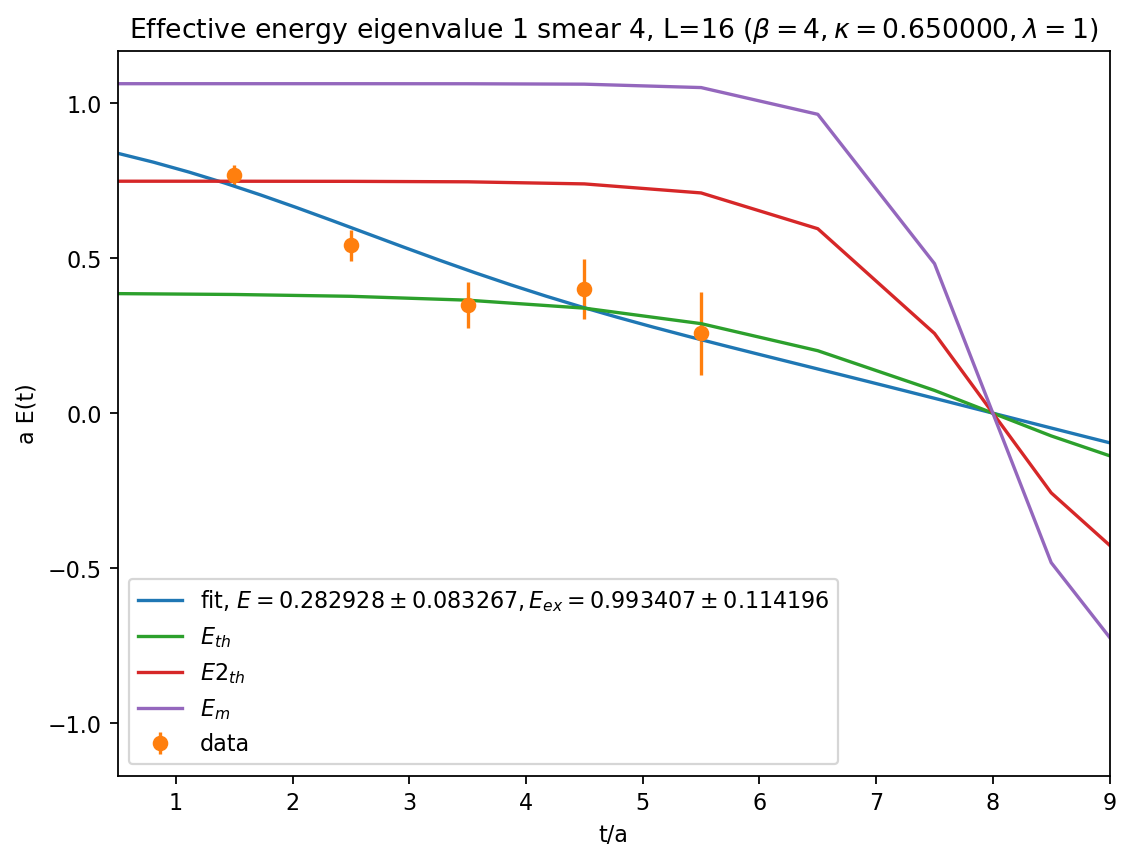

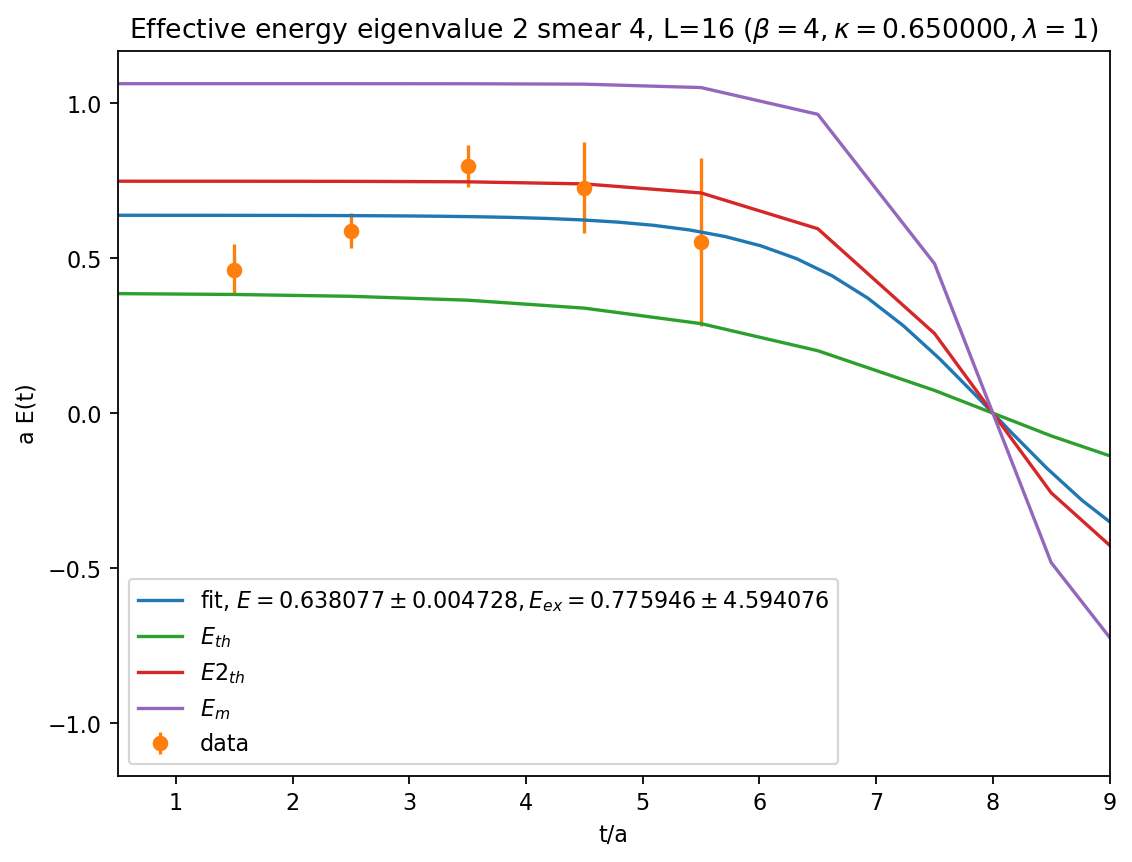

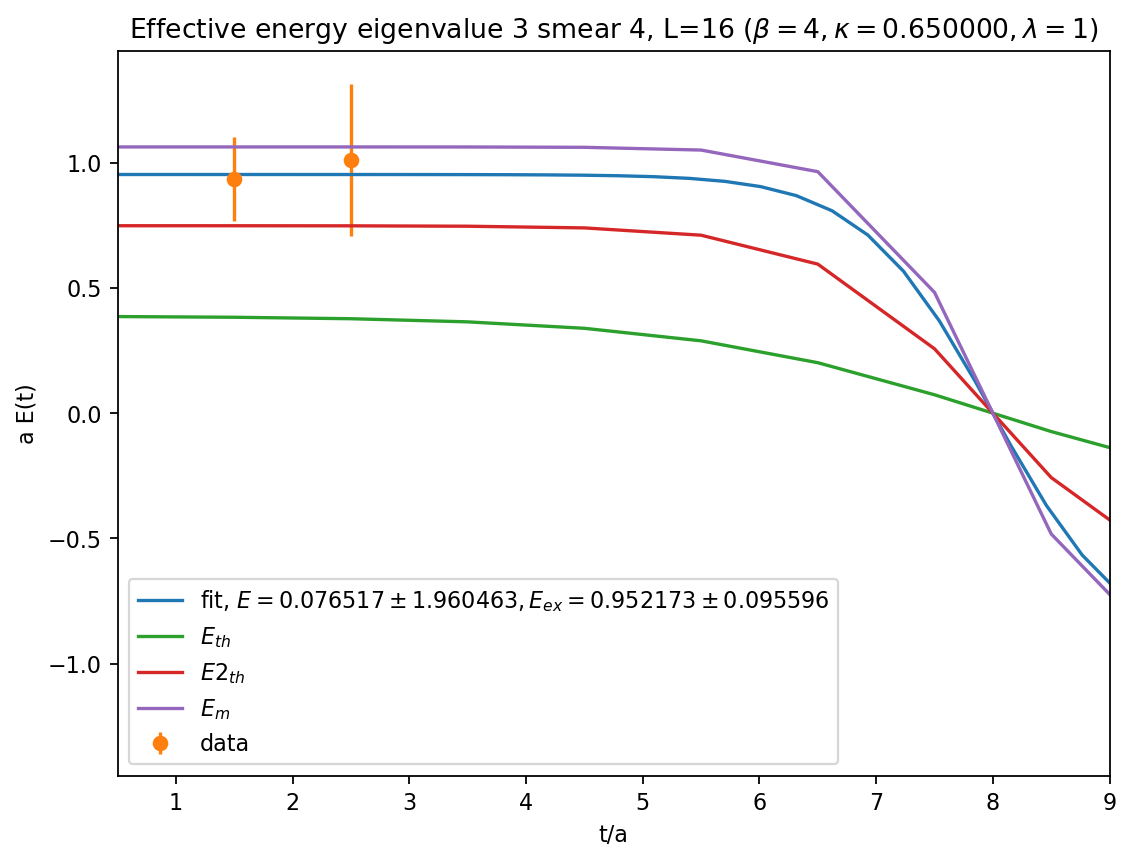

In [22]:
k_l=[0.55,0.65]
Nt_l= [8,16,24,32]
for Nt in [16]:
    for k in k_l:
        for sm in range(n_smear):
            var_analysis_plot4(k,sm)